In [1]:
# Hiding the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Used to display all the matplotlib graphs inside the notebook
%matplotlib inline 
import seaborn as sns

In [3]:
sns.set() # Setting the default seaborn style for all the plots

## 1) Reading the data 

In [4]:
data = pd.read_csv('Part- 1,2&3 - Signal.csv') # Storing the given data into a data frame called as "data"

# Exploratory Data Analysis

## 2)  Number of records, structure of the file, number of attributes

In [5]:
data.shape # The data has got 195 rows and 24 columns

(1599, 12)

In [6]:
data.head() # Checking the head of the data frame

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [7]:
# Checking for duplicates and removing the duplicates

print('The shape before removing the duplicates from the data set is :',data.shape)
data = data.drop_duplicates()
print('The shape after removing the duplicates from the data set is :',data.shape)

The shape before removing the duplicates from the data set is : (1599, 12)
The shape after removing the duplicates from the data set is : (1359, 12)


In [8]:
data.info() # Checking for the data type of each of the variables and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [9]:
data.nunique() # Getting a count of number of unique values in each column so as to identify the continuous and discrete variables

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

## 3) The five point summary of the continuous variables

In [10]:
data.describe().T 

count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                      75%        max  
Parameter 1       9.20000   15.90000  
Parameter 2       0.64000    1.58000  
Parameter 3       0.43000    1.00000  
Parameter 4       2.60000   15.50000  
Parameter 5       0.09100    0.61100  
Parameter 6      21.00000   72.00000  
Parameter 7      63.00000  289.00000  
Parameter 8       0.99782    1.00369  
Parameter 9       3.40000    4.01000  
Parameter 10      0.73000    2.00000  
Parameter 11     11.10000   14.90000  
Signal_Strength   6.00000    8.00000

In [11]:
corr = data.corr() # Finding the correlation between the variables

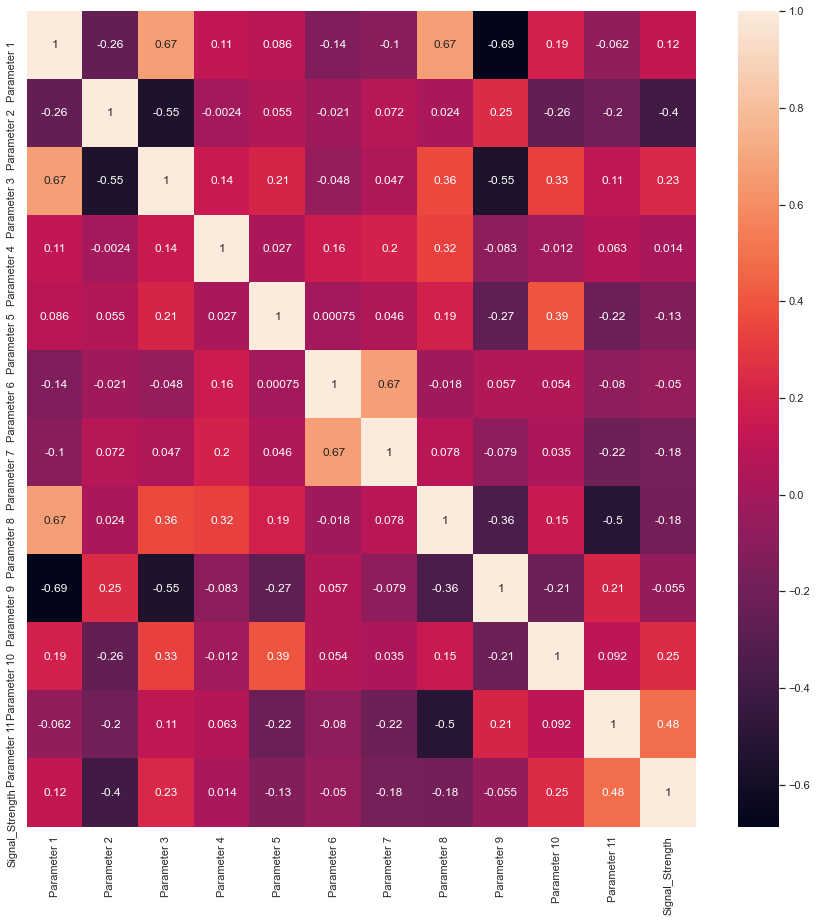

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True,ax=ax)

## 4) Observing the distribution of the target variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002554F235EB0>]],
      dtype=object)

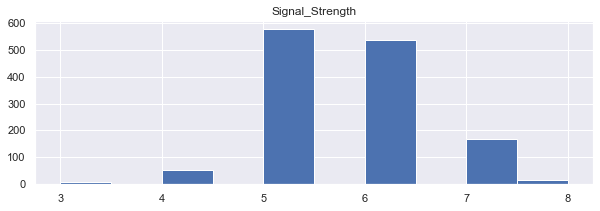

In [13]:
%matplotlib inline
data.hist(['Signal_Strength'], figsize=[10,3])

In [14]:
grouped_data = data.groupby('Signal_Strength').size()
print(grouped_data)

Signal_Strength
3     10
4     53
5    577
6    535
7    167
8     17
dtype: int64


### Clearly, we can see that signals 5 and 6 are dominating

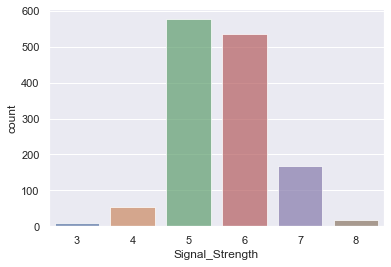

In [15]:
sns.countplot(x="Signal_Strength",data=data,alpha=0.7)

In [16]:
from scipy import stats
print('The skewness of signal strength is :',stats.skew(data['Signal_Strength']))

The skewness of signal strength is : 0.19219415286935035


### - We can see that the data is almost normally distributed with slight skewness on the RHS.

## 5) Distributions of the predictors (continuous)

In [17]:
X = data.drop('Signal_Strength',axis=1)

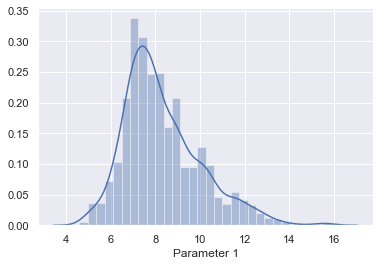

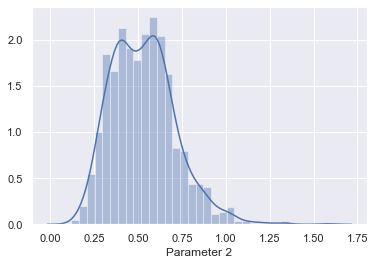

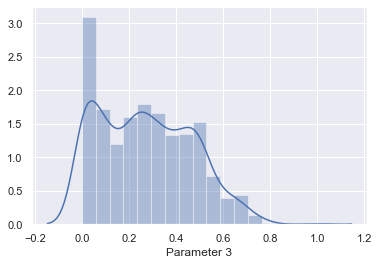

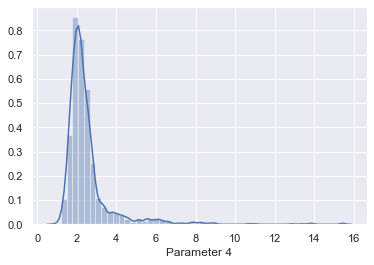

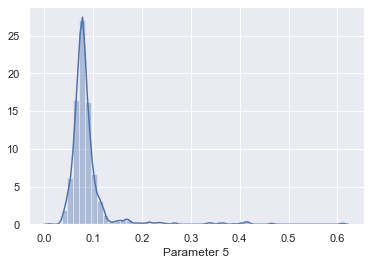

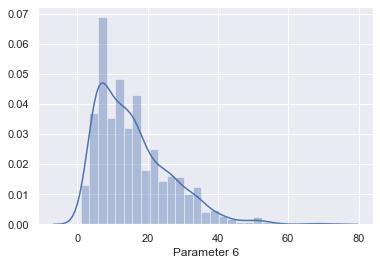

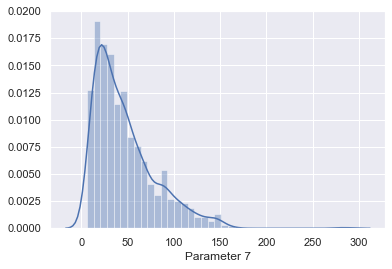

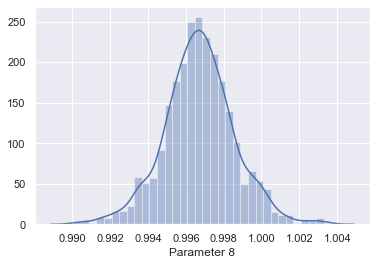

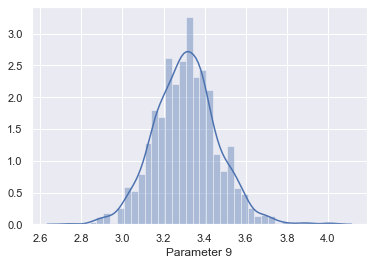

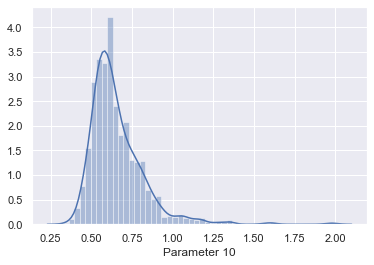

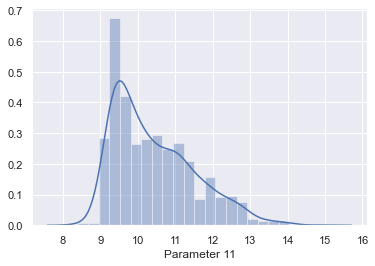

In [18]:
c_cols = X.columns.to_list()
for column in c_cols :
    plt.close()
    sns.distplot(data[column])
    plt.show()

### 1) All the parameters are skewed towards the right hand side.
### 2) Parameters 2 and 3 have bimodal and trimodal tendencies.
### 3) Parameters 4 and 5 are extremely skewed towards the right and might not play good roles as predictors.
### 4) Parameters 8 and 9 are normally skewed with very slight right side skewness.

In [19]:
# Checking for the skewness is the predictors

from scipy import stats
skews = []
for i in c_cols:
    skew = stats.skew(data[i])
    skews.append(skew)
for i in range(len(skews)) :
    print('The skewness of ',c_cols[i],'is: ',skews[i])

The skewness of  Parameter 1 is:  0.9400023708308168
The skewness of  Parameter 2 is:  0.7284737558284394
The skewness of  Parameter 3 is:  0.31238026482516323
The skewness of  Parameter 4 is:  4.543131827144295
The skewness of  Parameter 5 is:  5.496412046041327
The skewness of  Parameter 6 is:  1.2252252433705406
The skewness of  Parameter 7 is:  1.538667370663026
The skewness of  Parameter 8 is:  0.04472841688833082
The skewness of  Parameter 9 is:  0.2317760903753284
The skewness of  Parameter 10 is:  2.403847613657584
The skewness of  Parameter 11 is:  0.8588918260413719


## 6) Using univariate & bivariate analysis to check the individual attributes for
## their basic statistics
## - Relationship between the target variable and each of the continuous variables(predictors)

### ------------------------------------------OUTLIER TREATMENT------------------------------------------

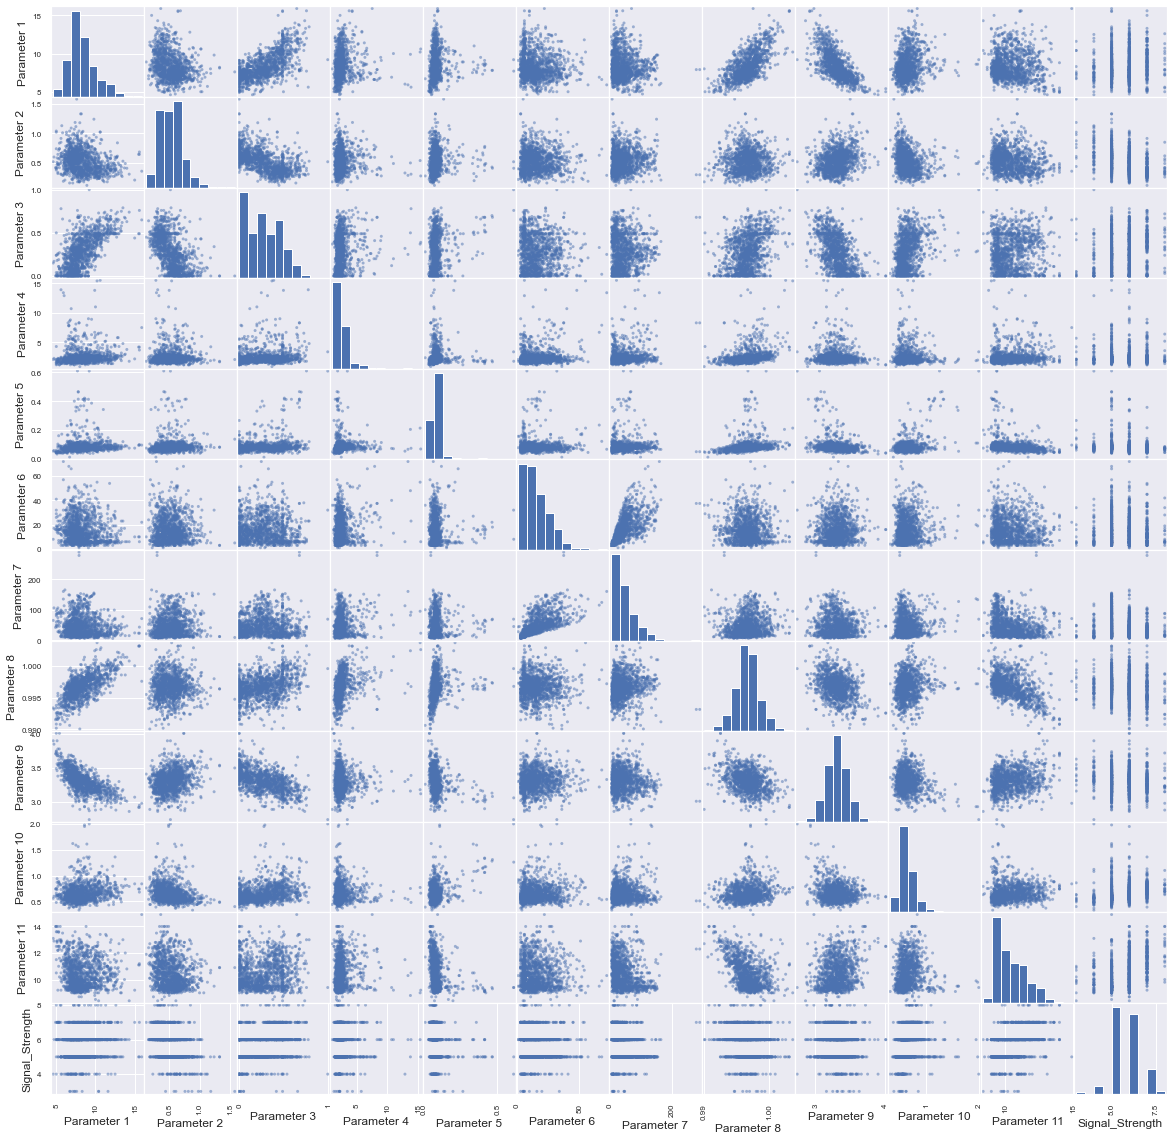

In [20]:
scatter_plot=pd.plotting.scatter_matrix(data, figsize=(20,20))

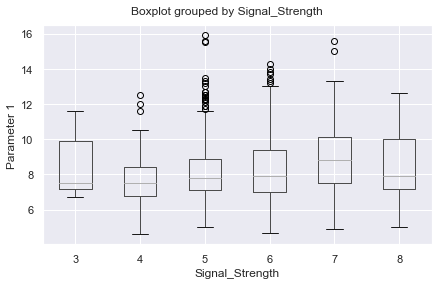

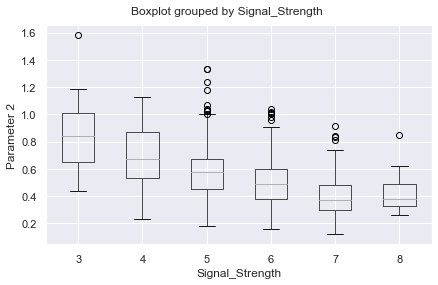

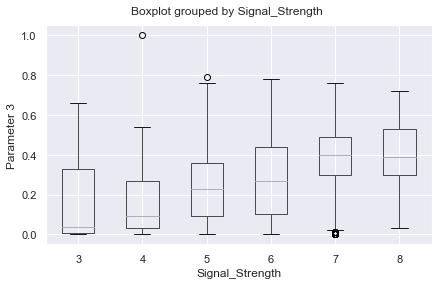

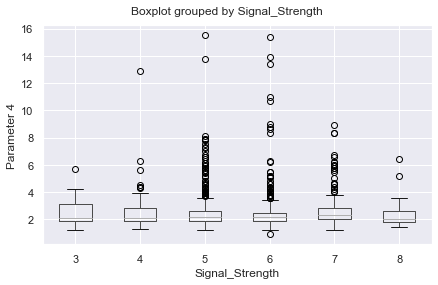

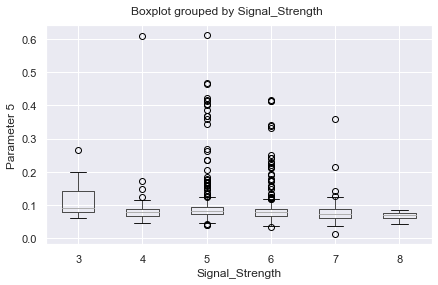

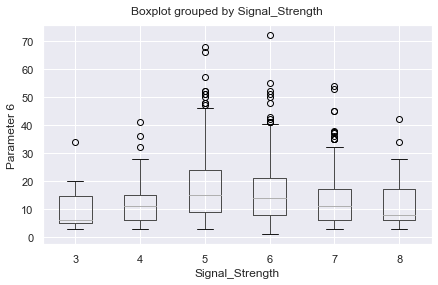

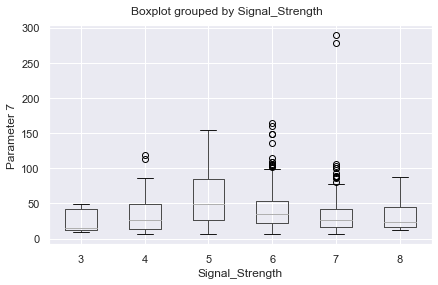

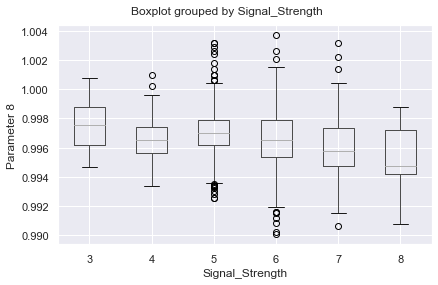

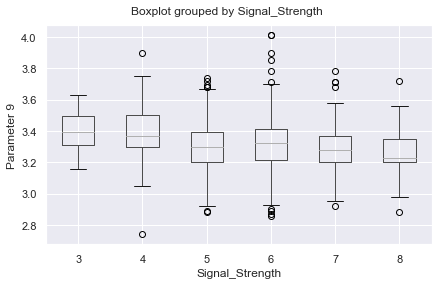

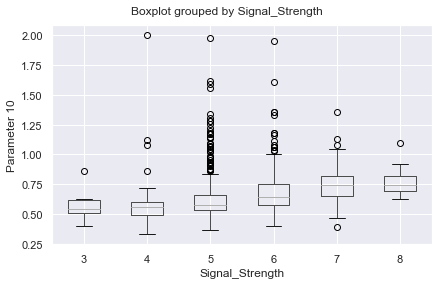

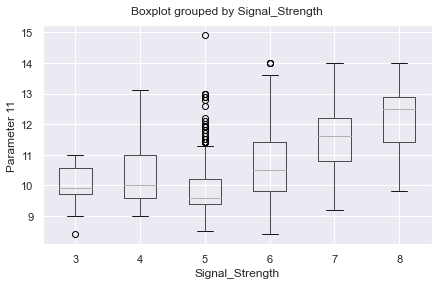

In [21]:
# Using boxplots to find out the outliers (Bivariate Analysis)

for i in c_cols:    
    data.boxplot(i,by='Signal_Strength')
    plt.tight_layout()
    plt.title('',y=1.08)
    plt.xlabel('Signal_Strength')
    plt.ylabel(i)

### -I have replaced only the extreme points among the outliers with a logical value (the max value of that variable for that particular class(3/4/5/6/7/8))

#### Outlier treatment for 'Parameter 1'

In [22]:
value1 = data[data['Signal_Strength']==4]['Parameter 1'].max()
value1

12.5

In [23]:
value2 = data[(data['Parameter 1']<value1) & (data['Signal_Strength']==4)]['Parameter 1'].max() 

In [24]:
value2

12.0

In [25]:
value3 = data[(data['Parameter 1']<value2) & (data['Signal_Strength']==4)]['Parameter 1'].max() 

In [26]:
value3

11.6

In [27]:
value = data[(data['Parameter 1']<value3) & (data['Signal_Strength']==4)]['Parameter 1'].max() 

In [28]:
value

10.5

In [29]:
data['Parameter 1'][(data['Signal_Strength']==4) & (data['Parameter 1']>=value3)]=value # Replacing the outlier with the logical value

In [30]:
value1 = data[data['Signal_Strength']==5]['Parameter 1'].max()
value1

15.9

In [31]:
value2 = data[(data['Parameter 1']<value1) & (data['Signal_Strength']==5)]['Parameter 1'].max() 
value2

15.6

In [32]:
value3 = data[(data['Parameter 1']<value2) & (data['Signal_Strength']==5)]['Parameter 1'].max() 
value3

15.5

In [33]:
value4 = data[(data['Parameter 1']<value3) & (data['Signal_Strength']==5)]['Parameter 1'].max() 
value4

13.5

In [34]:
data['Parameter 1'][(data['Signal_Strength']==5) & (data['Parameter 1']>=value3)]=value4 # Replacing the outlier with the logical value

In [35]:
value1 = data[data['Signal_Strength']==7]['Parameter 1'].max()
value1

15.6

In [36]:
value2 = data[(data['Parameter 1']<value1) & (data['Signal_Strength']==7)]['Parameter 1'].max() 
value2

15.0

In [37]:
value = data[(data['Parameter 1']<value2) & (data['Signal_Strength']==7)]['Parameter 1'].max() 
value

13.3

In [38]:
data['Parameter 1'][(data['Signal_Strength']==7) & (data['Parameter 1']>=value2)]=value # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 2'

In [39]:
value1 = data[data['Signal_Strength']==3]['Parameter 2'].max() 
value1

1.58

In [40]:
value=1.33

In [41]:
data['Parameter 2'][(data['Signal_Strength']==3) & (data['Parameter 2']>=value1)]=value # Replacing the outlier with the logical value

In [42]:
value1 = data[(data['Signal_Strength']==5) & (data['Parameter 2']<1.1)]['Parameter 2'].max() 
value1

1.07

In [43]:
data['Parameter 2'][(data['Signal_Strength']==5) & (data['Parameter 2']>value1)]=value1 # Replacing the outlier with the logical value

In [44]:
value1 = data[(data['Signal_Strength']==7) & (data['Parameter 2']<0.8)]['Parameter 2'].max() 
value1

0.735

In [45]:
data['Parameter 2'][(data['Signal_Strength']==7) & (data['Parameter 2']>value1)]=value1 # Replacing the outlier with the logical value

In [46]:
value1 = data[(data['Signal_Strength']==8) & (data['Parameter 2']<0.8)]['Parameter 2'].max() 
value1

0.62

In [47]:
data['Parameter 2'][(data['Signal_Strength']==8) & (data['Parameter 2']>value1)]=value1 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 3'

In [48]:
value1 = data[(data['Signal_Strength']==4) & (data['Parameter 3']<0.8)]['Parameter 3'].max() 
value1

0.54

In [49]:
data['Parameter 3'][(data['Signal_Strength']==4) & (data['Parameter 3']>value1)]=value1 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 4'

In [50]:
value1 = data[data['Parameter 4']<5]['Parameter 4'].max() 
value1

4.8

In [51]:
data['Parameter 4'][(data['Parameter 4']>value1)]=value1 # Replacing the outlier with the logical value

In [52]:
value2 = data[data['Parameter 4']<4]['Parameter 4'].max() 
value2

3.9

In [53]:
data['Parameter 4'][(data['Parameter 4']>value2)]=value2 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 5'

In [54]:
value1 = data[data['Parameter 5']<0.25]['Parameter 5'].max() 
value1

0.243

In [55]:
data['Parameter 5'][(data['Parameter 5']>value1)]=value1 # Replacing the outlier with the logical value

In [56]:
value2 = data[data['Parameter 5']<=0.2]['Parameter 5'].max() 
value2

0.2

In [57]:
data['Parameter 5'][(data['Parameter 5']>value2)]=value2 # Replacing the outlier with the logical value

In [58]:
data['Parameter 5'][(data['Signal_Strength']==4) & (data['Parameter 5']>0.11)]=0.11 # Replacing the outlier with the logical value

In [59]:
data['Parameter 5'][(data['Signal_Strength']==5) & (data['Parameter 5']>0.13)]=0.13 # Replacing the outlier with the logical value

In [60]:
data['Parameter 5'][(data['Signal_Strength']==6) & (data['Parameter 5']>0.13)]=0.13 # Replacing the outlier with the logical value

In [61]:
data['Parameter 5'][(data['Signal_Strength']==7) & (data['Parameter 5']>0.13)]=0.13 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 11'

In [62]:
data['Parameter 11'][(data['Signal_Strength']==5) & (data['Parameter 11']>12)]=12 # Replacing the outlier with the logical value

In [63]:
data['Parameter 11'][(data['Signal_Strength']==6) & (data['Parameter 11']>13.2)]=13.2 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 10'

In [64]:
data['Parameter 10'][(data['Signal_Strength']==3) & (data['Parameter 10']>0.75)]=0.75 # Replacing the outlier with the logical value

In [65]:
data['Parameter 10'][(data['Signal_Strength']==8) & (data['Parameter 10']>0.85)]=0.85 # Replacing the outlier with the logical value

In [66]:
data['Parameter 10'][(data['Signal_Strength']==5) & (data['Parameter 10']>1.1)]=1.1 # Replacing the outlier with the logical value

In [67]:
data['Parameter 10'][(data['Signal_Strength']==6) & (data['Parameter 10']>1.1)]=1.1 # Replacing the outlier with the logical value

In [68]:
data['Parameter 10'][(data['Signal_Strength']==7) & (data['Parameter 10']>1.1)]=1.1 # Replacing the outlier with the logical value

In [69]:
data['Parameter 10'][(data['Signal_Strength']==4) & (data['Parameter 10']>0.73)]=0.73 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 9'

In [70]:
data['Parameter 9'][(data['Parameter 9']>3.8)]=3.75 # Replacing the outlier with the logical value

In [71]:
data['Parameter 9'][(data['Signal_Strength']==7) & (data['Parameter 9']>3.6)]=3.58 # Replacing the outlier with the logical value

In [72]:
data['Parameter 9'][(data['Signal_Strength']==8) & (data['Parameter 9']>3.6)]=3.58 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 8'

In [73]:
data['Parameter 8'][(data['Parameter 8']>1.002)]=1.001 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 6'

In [74]:
data['Parameter 6'][(data['Parameter 6']>50)]=44 # Replacing the outlier with the logical value

In [75]:
data['Parameter 6'][(data['Signal_Strength']==3) & (data['Parameter 6']>20)]=20 # Replacing the outlier with the logical value

In [76]:
data['Parameter 6'][(data['Signal_Strength']==4) & (data['Parameter 6']>27)]=27 # Replacing the outlier with the logical value

In [77]:
data['Parameter 6'][(data['Signal_Strength']==7) & (data['Parameter 6']>32)]=32 # Replacing the outlier with the logical value

In [78]:
data['Parameter 6'][(data['Signal_Strength']==8) & (data['Parameter 6']>30)]=30 # Replacing the outlier with the logical value

In [79]:
data['Parameter 6'][(data['Signal_Strength']==6) & (data['Parameter 6']>44)]=44 # Replacing the outlier with the logical value

#### Outlier treatment for 'Parameter 7'

In [80]:
data['Parameter 7'][(data['Signal_Strength']==7) & (data['Parameter 7']>108)]=108 # Replacing the outlier with the logical value

In [81]:
data['Parameter 7'][(data['Signal_Strength']==4) & (data['Parameter 7']>85)]=85 # Replacing the outlier with the logical value

In [82]:
data['Parameter 7'][(data['Signal_Strength']==6) & (data['Parameter 7']>115)]=115 # Replacing the outlier with the logical value

## Plotting the boxplots after outlier treatment

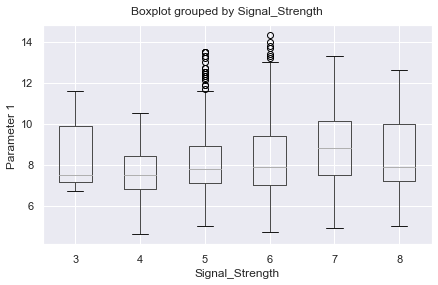

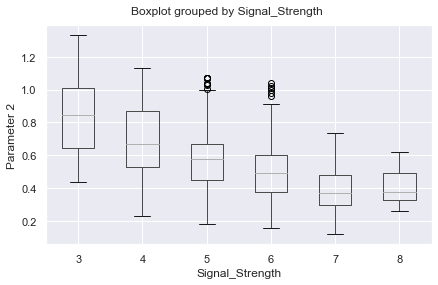

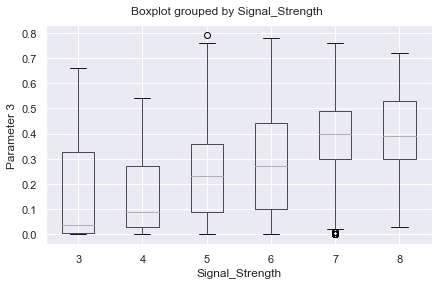

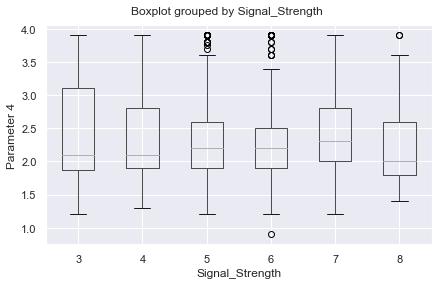

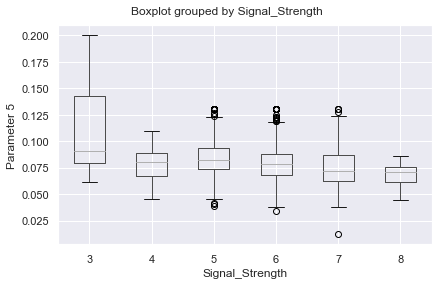

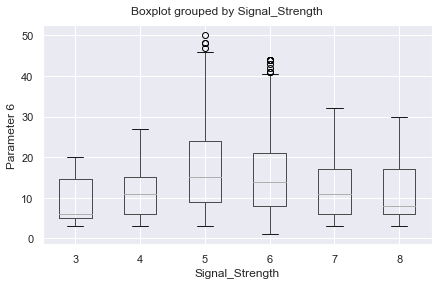

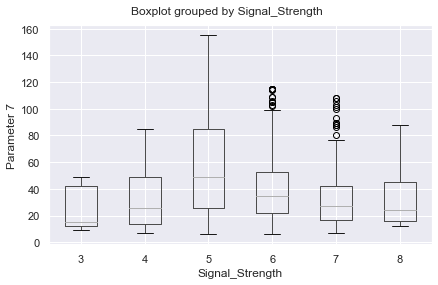

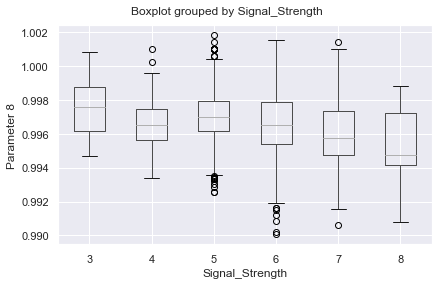

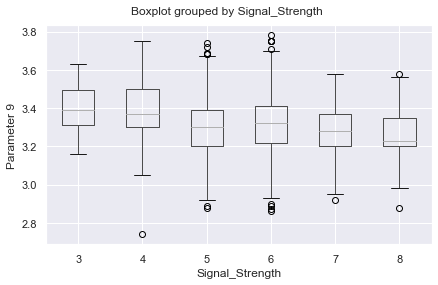

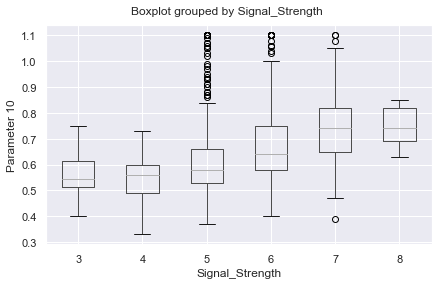

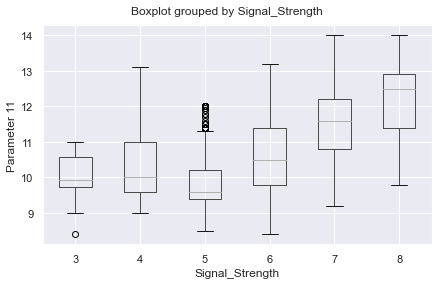

In [83]:
for i in c_cols:    
    data.boxplot(i,by='Signal_Strength')
    plt.tight_layout()
    plt.title('',y=1.08)
    plt.xlabel('Signal_Strength')
    plt.ylabel(i)

### -The outliers are still present but there are no extreme points as such.

## 7) Feature Selection using statistical tests

## ANOVA test (Categorical vs Continuous)

H0 : There is NO relation between the given variables (p > 0.05)

H1 : There is a relation between the given variables (p <= 0.05)


In [84]:
from scipy.stats import f_oneway
anova = []
for i in c_cols :
    l = data.groupby('Signal_Strength')[i].apply(list)
    res = f_oneway(*l)
    anova.append(i +':'+str(res[1]))
for i in anova:
    print(i)

Parameter 1:4.165941069157666e-05
Parameter 2:1.6549587279525718e-52
Parameter 3:2.4657384244442764e-16
Parameter 4:0.11636524222594663
Parameter 5:5.177291851880672e-17
Parameter 6:1.910064119941657e-06
Parameter 7:1.3146222025910915e-27
Parameter 8:9.716220326684017e-13
Parameter 9:0.00036803258973076733
Parameter 10:1.0269164884598126e-30
Parameter 11:1.0231005377751742e-99


###  -By looking at the p-values for each of the variables, all the variables have importance except 'Parameter 4'. So, I am dropping 'Parameter 4'.

In [85]:
data.drop('Parameter 4',axis=1,inplace=True)

## 8) Checking for null values in each of the columns

In [86]:
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

### -There are no null values present in the data set

## 9) Saving the dataframe as a pickle file so that the data can be loaded quickly and used in the models

In [87]:
data.to_pickle('Signal_data.pickle')

In [88]:
signal_data = pd.read_pickle('signal_data.pickle')
signal_data.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 5  Parameter 6  \
0          7.4         0.70         0.00        0.076         11.0   
1          7.8         0.88         0.00        0.098         25.0   
2          7.8         0.76         0.04        0.092         15.0   
3         11.2         0.28         0.56        0.075         17.0   
5          7.4         0.66         0.00        0.075         13.0   

   Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  \
0         34.0       0.9978         3.51          0.56           9.4   
1         67.0       0.9968         3.20          0.68           9.8   
2         54.0       0.9970         3.26          0.65           9.8   
3         60.0       0.9980         3.16          0.58           9.8   
5         40.0       0.9978         3.51          0.56           9.4   

   Signal_Strength  
0                5  
1                5  
2                5  
3                6  
5                5

## -The data has been processed and can be used in the models. 

# --------------------------------------------------------------------------------------------------------------

# Deep Learning

## PART I - Neural Network Regressor

In [89]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Signal_Strength']
Predictors=signal_data.drop('Signal_Strength',axis=1).columns.to_list()

X=signal_data[Predictors].values
y=signal_data[TargetVariable].values


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(951, 10)
(951, 1)
(408, 10)
(408, 1)


In [91]:
# Standardized predictors
X[0:3]

array([[-0.5282849 ,  0.95873037, -1.39770453, -0.29045961, -0.47582463,
        -0.38984665,  0.6032595 ,  1.33014879, -0.63785313, -0.9656283 ],
       [-0.29335716,  1.96318301, -1.39770453,  0.81495808,  0.95412947,
         0.64876402,  0.05697589, -0.71719469,  0.19451535, -0.58799575],
       [-0.29335716,  1.29354792, -1.19215529,  0.51348053, -0.06726632,
         0.23961436,  0.16623261, -0.32093466, -0.01357677, -0.58799575]])

In [92]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[7.400e+00, 7.000e-01, 0.000e+00, 7.600e-02, 1.100e+01, 3.400e+01,
        9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 9.800e-02, 2.500e+01, 6.700e+01,
        9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 9.200e-02, 1.500e+01, 5.400e+01,
        9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00]])

## Regression using Deep Learning- Artificial Neural Networks(ANN)

In [93]:
from keras.models import Sequential
from keras.layers import Dense

## Finding best set of parameters using Manual Grid Search

In [94]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30, 50]
    epoch_list  =   [5, 10, 50, 100, 150, 200, 250]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=10, input_dim=10, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = 10, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [95]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 80.3795078291736
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 75.84368292162515
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 77.22674336938744
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 79.1142567424172
5 Parameters: batch_size: 5 - epochs: 150 Accuracy: 74.94779909594563
6 Parameters: batch_size: 5 - epochs: 200 Accuracy: 78.25833604967892
7 Parameters: batch_size: 5 - epochs: 250 Accuracy: 76.71700482155359
8 Parameters: batch_size: 10 - epochs: 5 Accuracy: 75.37368752567149
9 Parameters: batch_size: 10 - epochs: 10 Accuracy: 75.82408288752521
10 Parameters: batch_size: 10 - epochs: 50 Accuracy: 79.17942065697406
11 Parameters: batch_size: 10 - epochs: 100 Accuracy: 78.25354008435208
12 Parameters: batch_size: 10 - epochs: 150 Accuracy: 79.59173084127046
13 Parameters: batch_size: 10 - epochs: 200 Accuracy: 75.6206851639124
14 Parameters: batch_size: 10 - epochs: 250 Accuracy: 75.11847054445207
15 Parameters: batc

In [96]:
ResultsData[ResultsData['Accuracy']==ResultsData['Accuracy'].max()]

TrialNumber Parameters    Accuracy
0          46     50-100  110.799781

### Plotting the parameter search results


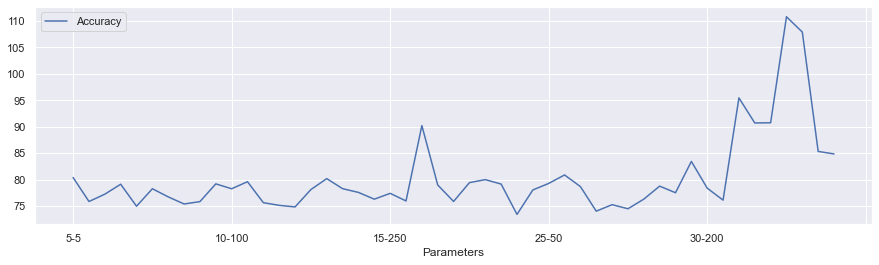

In [97]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

### Generating the model using best hyperparameters

In [98]:
# create ANN model_reg
model_reg = Sequential()
# Defining the first layer of the model_reg
model_reg.add(Dense(units=10, input_dim=10, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model_reg
model_reg.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_reg.add(Dense(1, kernel_initializer='normal'))

# Compiling the model_reg
model_reg.compile(loss='mean_squared_error', optimizer='adam' )

In [99]:
# Fitting the ANN to the Training set
model_reg.fit(X_train, y_train ,batch_size = 5, epochs = 100, verbose=0)

### Generating the predictions on Testing Data


In [100]:
# Predictions on testing data
Predictions=model_reg.predict(X_test)

# Scaling the predicted Price data back to original scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Signal_Strength']=y_test_orig
TestingData['Predicted_Signal_Strength']=Predictions
TestingData.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 5  Parameter 6  \
0          7.7        0.620         0.04        0.084         25.0   
1          8.2        0.635         0.10        0.073         25.0   
2          8.4        0.370         0.43        0.063         12.0   
3          9.9        0.490         0.58        0.094          9.0   
4          6.3        1.020         0.00        0.083         17.0   

   Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  \
0         45.0      0.99780         3.34          0.53           9.5   
1         60.0      0.99638         3.29          0.75          10.9   
2         19.0      0.99550         3.17          0.81          11.2   
3         43.0      1.00040         3.29          0.58           9.0   
4         24.0      0.99437         3.59          0.55          11.2   

   Signal_Strength  Predicted_Signal_Strength  
0              5.0                   5.071412  
1              6.0                   5.622146  
2              7.0                   6.787184  
3              5.0                   4.859726  
4              4.0                   4.964338

### Calculating the Accuracy on Testing Data

In [101]:
# Mean Absolute Percentage Error
APE=100* (abs(TestingData['Signal_Strength']-TestingData['Predicted_Signal_Strength'])/TestingData['Signal_Strength'])
TestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE),'%')
TestingData.head()

The Accuracy of ANN model is: 90.98354128854615 %


Parameter 1  Parameter 2  Parameter 3  Parameter 5  Parameter 6  \
0          7.7        0.620         0.04        0.084         25.0   
1          8.2        0.635         0.10        0.073         25.0   
2          8.4        0.370         0.43        0.063         12.0   
3          9.9        0.490         0.58        0.094          9.0   
4          6.3        1.020         0.00        0.083         17.0   

   Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  \
0         45.0      0.99780         3.34          0.53           9.5   
1         60.0      0.99638         3.29          0.75          10.9   
2         19.0      0.99550         3.17          0.81          11.2   
3         43.0      1.00040         3.29          0.58           9.0   
4         24.0      0.99437         3.59          0.55          11.2   

   Signal_Strength  Predicted_Signal_Strength        APE  
0              5.0                   5.071412   1.428232  
1              6.0                   5.622146   6.297572  
2              7.0                   6.787184   3.040225  
3              5.0                   4.859726   2.805471  
4              4.0                   4.964338  24.108458

## Sklearn GridSearchCV 

In [102]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [103]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


Parameter_Trials={'batch_size':[5,10,20,50,60],
                      'epochs':[10,20,50,100,150],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }


RegModel=KerasRegressor(make_regression_ann, verbose=0)

In [104]:
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [105]:
# Creating the Grid search space
grid_search=GridSearchCV(estimator=RegModel, param_grid=Parameter_Trials, scoring=custom_Scoring, cv=5)

In [106]:
# Measuring how much time it took to find the best params using grid search
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/10
152/152 [==============================] - 0s 873us/step - loss: 0.9983
Epoch 2/10
152/152 [==============================] - 0s 905us/step - loss: 0.7926 0s - loss: 0.830
Epoch 3/10
152/152 [==============================] - 0s 919us/step - loss: 0.6503
Epoch 4/10
152/152 [==============================] - 0s 905us/step - loss: 0.6372
Epoch 5/10
152/152 [==============================] - 0s 879us/step - loss: 0.6312
Epoch 6/10
152/152 [==============================] - 0s 912us/step - loss: 0.6253
Epoch 7/10
152/152 [==============================] - 0s 925us/step - loss: 0.6234
Epoch 8/10
152/152 [==============================] - 0s 1ms/step - loss: 0.6198
Epoch 9/10
152/152 [==============================] - 0s 873us/step - loss: 0.6177
Epoch 10/10
152/152 [==============================] - 0s 925us/step - loss: 0.6129
###################################################################### Accuracy: 66.30594376503711
Epoch 1/10
153/153 [==============================] - 0

Epoch 1/20
153/153 [==============================] - 0s 902us/step - loss: 0.9616
Epoch 2/20
153/153 [==============================] - 0s 873us/step - loss: 0.7792
Epoch 3/20
153/153 [==============================] - 0s 847us/step - loss: 0.6353
Epoch 4/20
153/153 [==============================] - 0s 854us/step - loss: 0.6088
Epoch 5/20
153/153 [==============================] - 0s 841us/step - loss: 0.6017
Epoch 6/20
153/153 [==============================] - 0s 880us/step - loss: 0.5922
Epoch 7/20
153/153 [==============================] - 0s 887us/step - loss: 0.5852
Epoch 8/20
153/153 [==============================] - 0s 841us/step - loss: 0.5857
Epoch 9/20
153/153 [==============================] - 0s 851us/step - loss: 0.5777
Epoch 10/20
153/153 [==============================] - 0s 808us/step - loss: 0.5748
Epoch 11/20
153/153 [==============================] - 0s 828us/step - loss: 0.5724
Epoch 12/20
153/153 [==============================] - 0s 815us/step - loss: 0.5721
E

152/152 [==============================] - 0s 755us/step - loss: 0.5475
Epoch 36/50
152/152 [==============================] - 0s 820us/step - loss: 0.5476
Epoch 37/50
152/152 [==============================] - 0s 755us/step - loss: 0.5448
Epoch 38/50
152/152 [==============================] - 0s 761us/step - loss: 0.5456
Epoch 39/50
152/152 [==============================] - 0s 722us/step - loss: 0.5434
Epoch 40/50
152/152 [==============================] - 0s 768us/step - loss: 0.5441
Epoch 41/50
152/152 [==============================] - 0s 748us/step - loss: 0.5430
Epoch 42/50
152/152 [==============================] - 0s 761us/step - loss: 0.5412
Epoch 43/50
152/152 [==============================] - 0s 807us/step - loss: 0.5408
Epoch 44/50
152/152 [==============================] - 0s 774us/step - loss: 0.5402
Epoch 45/50
152/152 [==============================] - 0s 781us/step - loss: 0.5407
Epoch 46/50
152/152 [==============================] - 0s 748us/step - loss: 0.5392
Epoc

153/153 [==============================] - 0s 828us/step - loss: 0.5494
Epoch 31/50
153/153 [==============================] - 0s 860us/step - loss: 0.5476
Epoch 32/50
153/153 [==============================] - 0s 815us/step - loss: 0.5479
Epoch 33/50
153/153 [==============================] - 0s 834us/step - loss: 0.5474
Epoch 34/50
153/153 [==============================] - 0s 808us/step - loss: 0.5482
Epoch 35/50
153/153 [==============================] - 0s 828us/step - loss: 0.5435
Epoch 36/50
153/153 [==============================] - 0s 841us/step - loss: 0.5445
Epoch 37/50
153/153 [==============================] - 0s 854us/step - loss: 0.5431
Epoch 38/50
153/153 [==============================] - 0s 821us/step - loss: 0.5437
Epoch 39/50
153/153 [==============================] - 0s 828us/step - loss: 0.5431
Epoch 40/50
153/153 [==============================] - 0s 776us/step - loss: 0.5414
Epoch 41/50
153/153 [==============================] - 0s 815us/step - loss: 0.5417
Epoc

153/153 [==============================] - 0s 854us/step - loss: 0.5681
Epoch 26/50
153/153 [==============================] - 0s 808us/step - loss: 0.5692
Epoch 27/50
153/153 [==============================] - 0s 854us/step - loss: 0.5692
Epoch 28/50
153/153 [==============================] - 0s 802us/step - loss: 0.5677
Epoch 29/50
153/153 [==============================] - 0s 841us/step - loss: 0.5703
Epoch 30/50
153/153 [==============================] - 0s 854us/step - loss: 0.5659
Epoch 31/50
153/153 [==============================] - 0s 815us/step - loss: 0.5647
Epoch 32/50
153/153 [==============================] - 0s 860us/step - loss: 0.5656
Epoch 33/50
153/153 [==============================] - 0s 880us/step - loss: 0.5648
Epoch 34/50
153/153 [==============================] - 0s 802us/step - loss: 0.5625
Epoch 35/50
153/153 [==============================] - 0s 769us/step - loss: 0.5628
Epoch 36/50
153/153 [==============================] - 0s 808us/step - loss: 0.5622
Epoc

152/152 [==============================] - 0s 774us/step - loss: 0.5142
Epoch 71/100
152/152 [==============================] - 0s 800us/step - loss: 0.5131
Epoch 72/100
152/152 [==============================] - 0s 774us/step - loss: 0.5122
Epoch 73/100
152/152 [==============================] - 0s 807us/step - loss: 0.5107
Epoch 74/100
152/152 [==============================] - 0s 768us/step - loss: 0.5121
Epoch 75/100
152/152 [==============================] - 0s 814us/step - loss: 0.5091
Epoch 76/100
152/152 [==============================] - 0s 768us/step - loss: 0.5073
Epoch 77/100
152/152 [==============================] - 0s 741us/step - loss: 0.5078
Epoch 78/100
152/152 [==============================] - 0s 1ms/step - loss: 0.5081
Epoch 79/100
152/152 [==============================] - 0s 761us/step - loss: 0.5080
Epoch 80/100
152/152 [==============================] - 0s 860us/step - loss: 0.5059
Epoch 81/100
152/152 [==============================] - 0s 768us/step - loss: 0.

153/153 [==============================] - 0s 808us/step - loss: 0.5415
Epoch 66/100
153/153 [==============================] - 0s 828us/step - loss: 0.5444
Epoch 67/100
153/153 [==============================] - 0s 776us/step - loss: 0.5391
Epoch 68/100
153/153 [==============================] - 0s 821us/step - loss: 0.5400
Epoch 69/100
153/153 [==============================] - 0s 828us/step - loss: 0.5390
Epoch 70/100
153/153 [==============================] - 0s 841us/step - loss: 0.5399
Epoch 71/100
153/153 [==============================] - 0s 821us/step - loss: 0.5377
Epoch 72/100
153/153 [==============================] - 0s 815us/step - loss: 0.5395
Epoch 73/100
153/153 [==============================] - 0s 776us/step - loss: 0.5362
Epoch 74/100
153/153 [==============================] - 0s 769us/step - loss: 0.5378
Epoch 75/100
153/153 [==============================] - 0s 828us/step - loss: 0.5357
Epoch 76/100
153/153 [==============================] - 0s 789us/step - loss: 

153/153 [==============================] - 0s 2ms/step - loss: 0.5371
Epoch 61/100
153/153 [==============================] - 0s 2ms/step - loss: 0.5376
Epoch 62/100
153/153 [==============================] - 0s 2ms/step - loss: 0.5354
Epoch 63/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5347
Epoch 64/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5338
Epoch 65/100
153/153 [==============================] - 0s 913us/step - loss: 0.5335
Epoch 66/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5334
Epoch 67/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5328
Epoch 68/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5315
Epoch 69/100
153/153 [==============================] - 0s 906us/step - loss: 0.5308
Epoch 70/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5302
Epoch 71/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5331
Epoch 72/100


153/153 [==============================] - 0s 860us/step - loss: 0.5595
Epoch 57/100
153/153 [==============================] - 0s 860us/step - loss: 0.5623
Epoch 58/100
153/153 [==============================] - 0s 854us/step - loss: 0.5590
Epoch 59/100
153/153 [==============================] - 0s 860us/step - loss: 0.5577
Epoch 60/100
153/153 [==============================] - 0s 847us/step - loss: 0.5557
Epoch 61/100
153/153 [==============================] - 0s 821us/step - loss: 0.5562
Epoch 62/100
153/153 [==============================] - 0s 854us/step - loss: 0.5537
Epoch 63/100
153/153 [==============================] - 0s 952us/step - loss: 0.5540
Epoch 64/100
153/153 [==============================] - 0s 971us/step - loss: 0.5521
Epoch 65/100
153/153 [==============================] - 0s 847us/step - loss: 0.5526
Epoch 66/100
153/153 [==============================] - 0s 860us/step - loss: 0.5505
Epoch 67/100
153/153 [==============================] - 0s 880us/step - loss: 

153/153 [==============================] - 0s 1ms/step - loss: 0.5524
Epoch 52/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5521
Epoch 53/100
153/153 [==============================] - 0s 984us/step - loss: 0.5512
Epoch 54/100
153/153 [==============================] - 0s 926us/step - loss: 0.5505
Epoch 55/100
153/153 [==============================] - 0s 900us/step - loss: 0.5493
Epoch 56/100
153/153 [==============================] - 0s 860us/step - loss: 0.5495
Epoch 57/100
153/153 [==============================] - 0s 867us/step - loss: 0.5494
Epoch 58/100
153/153 [==============================] - 0s 847us/step - loss: 0.5493
Epoch 59/100
153/153 [==============================] - 0s 887us/step - loss: 0.5474
Epoch 60/100
153/153 [==============================] - 0s 984us/step - loss: 0.5477
Epoch 61/100
153/153 [==============================] - 0s 828us/step - loss: 0.5481
Epoch 62/100
153/153 [==============================] - 0s 821us/step - loss: 0.54

152/152 [==============================] - 0s 748us/step - loss: 0.5487
Epoch 47/150
152/152 [==============================] - 0s 833us/step - loss: 0.5469
Epoch 48/150
152/152 [==============================] - 0s 774us/step - loss: 0.5466
Epoch 49/150
152/152 [==============================] - 0s 735us/step - loss: 0.5462
Epoch 50/150
152/152 [==============================] - 0s 866us/step - loss: 0.5485
Epoch 51/150
152/152 [==============================] - 0s 879us/step - loss: 0.5473
Epoch 52/150
152/152 [==============================] - 0s 853us/step - loss: 0.5455
Epoch 53/150
152/152 [==============================] - 0s 846us/step - loss: 0.5439
Epoch 54/150
152/152 [==============================] - 0s 820us/step - loss: 0.5420
Epoch 55/150
152/152 [==============================] - 0s 932us/step - loss: 0.5451
Epoch 56/150
152/152 [==============================] - 0s 840us/step - loss: 0.5453
Epoch 57/150
152/152 [==============================] - 0s 820us/step - loss: 

152/152 [==============================] - 0s 899us/step - loss: 0.5000
Epoch 143/150
152/152 [==============================] - 0s 853us/step - loss: 0.5044
Epoch 144/150
152/152 [==============================] - 0s 846us/step - loss: 0.5040
Epoch 145/150
152/152 [==============================] - 0s 873us/step - loss: 0.5022
Epoch 146/150
152/152 [==============================] - 0s 860us/step - loss: 0.4991
Epoch 147/150
152/152 [==============================] - 0s 912us/step - loss: 0.5004
Epoch 148/150
152/152 [==============================] - 0s 905us/step - loss: 0.4999
Epoch 149/150
152/152 [==============================] - 0s 919us/step - loss: 0.4998
Epoch 150/150
152/152 [==============================] - 0s 951us/step - loss: 0.4974
###################################################################### Accuracy: 71.11455151761103
Epoch 1/150
153/153 [==============================] - 0s 916us/step - loss: 0.9524
Epoch 2/150
153/153 [==============================] - 0s

153/153 [==============================] - 0s 880us/step - loss: 0.5453
Epoch 88/150
153/153 [==============================] - 0s 900us/step - loss: 0.5415
Epoch 89/150
153/153 [==============================] - 0s 893us/step - loss: 0.5438
Epoch 90/150
153/153 [==============================] - 0s 912us/step - loss: 0.5414
Epoch 91/150
153/153 [==============================] - 0s 958us/step - loss: 0.5418
Epoch 92/150
153/153 [==============================] - 0s 913us/step - loss: 0.5420
Epoch 93/150
153/153 [==============================] - 0s 887us/step - loss: 0.5414
Epoch 94/150
153/153 [==============================] - 0s 958us/step - loss: 0.5423
Epoch 95/150
153/153 [==============================] - 0s 893us/step - loss: 0.5400
Epoch 96/150
153/153 [==============================] - 0s 984us/step - loss: 0.5408
Epoch 97/150
153/153 [==============================] - 0s 965us/step - loss: 0.5404
Epoch 98/150
153/153 [==============================] - 0s 945us/step - loss: 

153/153 [==============================] - 0s 841us/step - loss: 0.5537
Epoch 32/150
153/153 [==============================] - 0s 854us/step - loss: 0.5529
Epoch 33/150
153/153 [==============================] - 0s 867us/step - loss: 0.5515
Epoch 34/150
153/153 [==============================] - 0s 887us/step - loss: 0.5517 0s - loss: 0.532
Epoch 35/150
153/153 [==============================] - 0s 997us/step - loss: 0.5502
Epoch 36/150
153/153 [==============================] - 0s 873us/step - loss: 0.5497
Epoch 37/150
153/153 [==============================] - 0s 873us/step - loss: 0.5506
Epoch 38/150
153/153 [==============================] - 0s 932us/step - loss: 0.5484
Epoch 39/150
153/153 [==============================] - 0s 847us/step - loss: 0.5479
Epoch 40/150
153/153 [==============================] - 0s 828us/step - loss: 0.5502
Epoch 41/150
153/153 [==============================] - 0s 847us/step - loss: 0.5463
Epoch 42/150
153/153 [==============================] - 0s 88

153/153 [==============================] - 0s 991us/step - loss: 0.5054
Epoch 128/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5057
Epoch 129/150
153/153 [==============================] - 0s 997us/step - loss: 0.5023
Epoch 130/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5051
Epoch 131/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5019
Epoch 132/150
153/153 [==============================] - 0s 945us/step - loss: 0.5029
Epoch 133/150
153/153 [==============================] - 0s 1ms/step - loss: 0.4989
Epoch 134/150
153/153 [==============================] - 0s 958us/step - loss: 0.4971
Epoch 135/150
153/153 [==============================] - 0s 984us/step - loss: 0.4974
Epoch 136/150
153/153 [==============================] - 0s 932us/step - loss: 0.4963
Epoch 137/150
153/153 [==============================] - 0s 971us/step - loss: 0.4943
Epoch 138/150
153/153 [==============================] - 0s 1ms/step - loss:

153/153 [==============================] - 0s 887us/step - loss: 0.5498
Epoch 73/150
153/153 [==============================] - 0s 958us/step - loss: 0.5536
Epoch 74/150
153/153 [==============================] - 0s 952us/step - loss: 0.5564
Epoch 75/150
153/153 [==============================] - 0s 991us/step - loss: 0.5512
Epoch 76/150
153/153 [==============================] - 0s 965us/step - loss: 0.5493
Epoch 77/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5512
Epoch 78/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5537
Epoch 79/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5500
Epoch 80/150
153/153 [==============================] - 0s 958us/step - loss: 0.5485
Epoch 81/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5499
Epoch 82/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5460
Epoch 83/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5459
Epoch

153/153 [==============================] - 0s 932us/step - loss: 0.5714
Epoch 18/150
153/153 [==============================] - 0s 932us/step - loss: 0.5730
Epoch 19/150
153/153 [==============================] - 0s 926us/step - loss: 0.5718
Epoch 20/150
153/153 [==============================] - 0s 867us/step - loss: 0.5693
Epoch 21/150
153/153 [==============================] - 0s 971us/step - loss: 0.5698
Epoch 22/150
153/153 [==============================] - 0s 893us/step - loss: 0.5659
Epoch 23/150
153/153 [==============================] - 0s 965us/step - loss: 0.5648
Epoch 24/150
153/153 [==============================] - 0s 958us/step - loss: 0.5653
Epoch 25/150
153/153 [==============================] - 0s 991us/step - loss: 0.5626
Epoch 26/150
153/153 [==============================] - 0s 939us/step - loss: 0.5640
Epoch 27/150
153/153 [==============================] - 0s 958us/step - loss: 0.5603
Epoch 28/150
153/153 [==============================] - 0s 952us/step - loss: 

153/153 [==============================] - 0s 906us/step - loss: 0.5308
Epoch 114/150
153/153 [==============================] - 0s 978us/step - loss: 0.5273
Epoch 115/150
153/153 [==============================] - 0s 828us/step - loss: 0.5299
Epoch 116/150
153/153 [==============================] - 0s 867us/step - loss: 0.5285
Epoch 117/150
153/153 [==============================] - 0s 841us/step - loss: 0.5304
Epoch 118/150
153/153 [==============================] - 0s 926us/step - loss: 0.5271
Epoch 119/150
153/153 [==============================] - 0s 913us/step - loss: 0.5285
Epoch 120/150
153/153 [==============================] - 0s 1ms/step - loss: 0.5265
Epoch 121/150
153/153 [==============================] - 0s 932us/step - loss: 0.5248
Epoch 122/150
153/153 [==============================] - 0s 893us/step - loss: 0.5285
Epoch 123/150
153/153 [==============================] - 0s 880us/step - loss: 0.5264
Epoch 124/150
153/153 [==============================] - 0s 873us/step

76/76 [==============================] - 0s 881us/step - loss: 1.0164
Epoch 2/20
76/76 [==============================] - 0s 787us/step - loss: 0.9648
Epoch 3/20
76/76 [==============================] - 0s 748us/step - loss: 0.7514
Epoch 4/20
76/76 [==============================] - 0s 761us/step - loss: 0.6494
Epoch 5/20
76/76 [==============================] - 0s 696us/step - loss: 0.6250
Epoch 6/20
76/76 [==============================] - 0s 748us/step - loss: 0.6172
Epoch 7/20
76/76 [==============================] - 0s 543us/step - loss: 0.6088
Epoch 8/20
76/76 [==============================] - 0s 617us/step - loss: 0.6021
Epoch 9/20
76/76 [==============================] - 0s 949us/step - loss: 0.5962
Epoch 10/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5909
Epoch 11/20
76/76 [==============================] - 0s 932us/step - loss: 0.5882
Epoch 12/20
76/76 [==============================] - 0s 919us/step - loss: 0.5857
Epoch 13/20
76/76 [===================

Epoch 17/20
77/77 [==============================] - 0s 958us/step - loss: 0.5915
Epoch 18/20
77/77 [==============================] - 0s 842us/step - loss: 0.5887
Epoch 19/20
77/77 [==============================] - 0s 971us/step - loss: 0.5868
Epoch 20/20
77/77 [==============================] - 0s 868us/step - loss: 0.5843
###################################################################### Accuracy: 72.27737147435909
Epoch 1/50
76/76 [==============================] - 0s 853us/step - loss: 1.0168
Epoch 2/50
76/76 [==============================] - 0s 840us/step - loss: 0.9542
Epoch 3/50
76/76 [==============================] - 0s 997us/step - loss: 0.7461
Epoch 4/50
76/76 [==============================] - 0s 892us/step - loss: 0.6487
Epoch 5/50
76/76 [==============================] - 0s 1ms/step - loss: 0.6308
Epoch 6/50
76/76 [==============================] - 0s 853us/step - loss: 0.6224
Epoch 7/50
76/76 [==============================] - 0s 905us/step - loss: 0.6154
Epoch 8/

77/77 [==============================] - 0s 946us/step - loss: 0.5535
Epoch 45/50
77/77 [==============================] - 0s 959us/step - loss: 0.5508
Epoch 46/50
77/77 [==============================] - 0s 984us/step - loss: 0.5509
Epoch 47/50
77/77 [==============================] - 0s 920us/step - loss: 0.5495
Epoch 48/50
77/77 [==============================] - 0s 1ms/step - loss: 0.5508
Epoch 49/50
77/77 [==============================] - 0s 946us/step - loss: 0.5499
Epoch 50/50
77/77 [==============================] - 0s 920us/step - loss: 0.5497
###################################################################### Accuracy: 67.44573847289605
Epoch 1/50
77/77 [==============================] - 0s 1ms/step - loss: 0.9683
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 0.8894
Epoch 3/50
77/77 [==============================] - 0s 958us/step - loss: 0.7211
Epoch 4/50
77/77 [==============================] - 0s 946us/step - loss: 0.6396
Epoch 5/50
77/77 [===

Epoch 42/50
77/77 [==============================] - 0s 933us/step - loss: 0.5783
Epoch 43/50
77/77 [==============================] - 0s 958us/step - loss: 0.5765
Epoch 44/50
77/77 [==============================] - 0s 933us/step - loss: 0.5772
Epoch 45/50
77/77 [==============================] - 0s 920us/step - loss: 0.5757
Epoch 46/50
77/77 [==============================] - 0s 933us/step - loss: 0.5752
Epoch 47/50
77/77 [==============================] - 0s 971us/step - loss: 0.5732
Epoch 48/50
77/77 [==============================] - 0s 946us/step - loss: 0.5732
Epoch 49/50
77/77 [==============================] - 0s 946us/step - loss: 0.5726
Epoch 50/50
77/77 [==============================] - 0s 971us/step - loss: 0.5719
###################################################################### Accuracy: 72.26567685819886
Epoch 1/50
77/77 [==============================] - 0s 853us/step - loss: 0.9966
Epoch 2/50
77/77 [==============================] - 0s 868us/step - loss: 0.9167
E

76/76 [==============================] - 0s 892us/step - loss: 0.5534
Epoch 40/100
76/76 [==============================] - 0s 866us/step - loss: 0.5527
Epoch 41/100
76/76 [==============================] - 0s 866us/step - loss: 0.5543
Epoch 42/100
76/76 [==============================] - 0s 840us/step - loss: 0.5517
Epoch 43/100
76/76 [==============================] - 0s 866us/step - loss: 0.5520
Epoch 44/100
76/76 [==============================] - 0s 879us/step - loss: 0.5500
Epoch 45/100
76/76 [==============================] - 0s 840us/step - loss: 0.5497
Epoch 46/100
76/76 [==============================] - 0s 853us/step - loss: 0.5491
Epoch 47/100
76/76 [==============================] - 0s 814us/step - loss: 0.5476
Epoch 48/100
76/76 [==============================] - 0s 840us/step - loss: 0.5487
Epoch 49/100
76/76 [==============================] - 0s 801us/step - loss: 0.5481
Epoch 50/100
76/76 [==============================] - 0s 827us/step - loss: 0.5464
Epoch 51/100
76/7

77/77 [==============================] - 0s 868us/step - loss: 0.5622
Epoch 37/100
77/77 [==============================] - 0s 829us/step - loss: 0.5629
Epoch 38/100
77/77 [==============================] - 0s 920us/step - loss: 0.5611
Epoch 39/100
77/77 [==============================] - 0s 1ms/step - loss: 0.5611
Epoch 40/100
77/77 [==============================] - 0s 907us/step - loss: 0.5616
Epoch 41/100
77/77 [==============================] - 0s 933us/step - loss: 0.5603
Epoch 42/100
77/77 [==============================] - 0s 855us/step - loss: 0.5603
Epoch 43/100
77/77 [==============================] - 0s 829us/step - loss: 0.5603
Epoch 44/100
77/77 [==============================] - 0s 855us/step - loss: 0.5590
Epoch 45/100
77/77 [==============================] - 0s 855us/step - loss: 0.5585
Epoch 46/100
77/77 [==============================] - 0s 842us/step - loss: 0.5552
Epoch 47/100
77/77 [==============================] - 0s 868us/step - loss: 0.5558
Epoch 48/100
77/77 

77/77 [==============================] - 0s 894us/step - loss: 0.5606
Epoch 34/100
77/77 [==============================] - 0s 933us/step - loss: 0.5591
Epoch 35/100
77/77 [==============================] - 0s 971us/step - loss: 0.5567
Epoch 36/100
77/77 [==============================] - 0s 894us/step - loss: 0.5585
Epoch 37/100
77/77 [==============================] - 0s 933us/step - loss: 0.5569
Epoch 38/100
77/77 [==============================] - 0s 933us/step - loss: 0.5564
Epoch 39/100
77/77 [==============================] - 0s 997us/step - loss: 0.5537
Epoch 40/100
77/77 [==============================] - 0s 920us/step - loss: 0.5543
Epoch 41/100
77/77 [==============================] - 0s 907us/step - loss: 0.5540
Epoch 42/100
77/77 [==============================] - 0s 933us/step - loss: 0.5532
Epoch 43/100
77/77 [==============================] - 0s 958us/step - loss: 0.5513
Epoch 44/100
77/77 [==============================] - 0s 997us/step - loss: 0.5498
Epoch 45/100
77/7

77/77 [==============================] - 0s 958us/step - loss: 0.6002
Epoch 32/100
77/77 [==============================] - 0s 907us/step - loss: 0.5994
Epoch 33/100
77/77 [==============================] - 0s 946us/step - loss: 0.5968
Epoch 34/100
77/77 [==============================] - 0s 855us/step - loss: 0.5949
Epoch 35/100
77/77 [==============================] - 0s 907us/step - loss: 0.5944
Epoch 36/100
77/77 [==============================] - 0s 842us/step - loss: 0.5932
Epoch 37/100
77/77 [==============================] - 0s 868us/step - loss: 0.5955
Epoch 38/100
77/77 [==============================] - 0s 920us/step - loss: 0.5922
Epoch 39/100
77/77 [==============================] - 0s 946us/step - loss: 0.5932
Epoch 40/100
77/77 [==============================] - 0s 933us/step - loss: 0.5908
Epoch 41/100
77/77 [==============================] - 0s 946us/step - loss: 0.5915
Epoch 42/100
77/77 [==============================] - 0s 894us/step - loss: 0.5930
Epoch 43/100
77/7

77/77 [==============================] - 0s 907us/step - loss: 0.5762
Epoch 29/100
77/77 [==============================] - 0s 881us/step - loss: 0.5768
Epoch 30/100
77/77 [==============================] - 0s 855us/step - loss: 0.5755
Epoch 31/100
77/77 [==============================] - 0s 842us/step - loss: 0.5766
Epoch 32/100
77/77 [==============================] - 0s 842us/step - loss: 0.5771
Epoch 33/100
77/77 [==============================] - 0s 855us/step - loss: 0.5743
Epoch 34/100
77/77 [==============================] - 0s 868us/step - loss: 0.5722
Epoch 35/100
77/77 [==============================] - 0s 842us/step - loss: 0.5745
Epoch 36/100
77/77 [==============================] - 0s 855us/step - loss: 0.5705
Epoch 37/100
77/77 [==============================] - 0s 803us/step - loss: 0.5702
Epoch 38/100
77/77 [==============================] - 0s 842us/step - loss: 0.5707
Epoch 39/100
77/77 [==============================] - 0s 842us/step - loss: 0.5693
Epoch 40/100
77/7

76/76 [==============================] - 0s 905us/step - loss: 0.5746
Epoch 26/150
76/76 [==============================] - 0s 919us/step - loss: 0.5736
Epoch 27/150
76/76 [==============================] - 0s 866us/step - loss: 0.5751
Epoch 28/150
76/76 [==============================] - 0s 919us/step - loss: 0.5713
Epoch 29/150
76/76 [==============================] - 0s 919us/step - loss: 0.5692
Epoch 30/150
76/76 [==============================] - 0s 971us/step - loss: 0.5702
Epoch 31/150
76/76 [==============================] - 0s 932us/step - loss: 0.5685
Epoch 32/150
76/76 [==============================] - 0s 866us/step - loss: 0.5671
Epoch 33/150
76/76 [==============================] - 0s 853us/step - loss: 0.5662
Epoch 34/150
76/76 [==============================] - 0s 919us/step - loss: 0.5662
Epoch 35/150
76/76 [==============================] - 0s 840us/step - loss: 0.5659
Epoch 36/150
76/76 [==============================] - 0s 853us/step - loss: 0.5656
Epoch 37/150
76/7

76/76 [==============================] - 0s 892us/step - loss: 0.5189
Epoch 124/150
76/76 [==============================] - 0s 945us/step - loss: 0.5193
Epoch 125/150
76/76 [==============================] - 0s 879us/step - loss: 0.5193
Epoch 126/150
76/76 [==============================] - 0s 905us/step - loss: 0.5194
Epoch 127/150
76/76 [==============================] - 0s 879us/step - loss: 0.5184
Epoch 128/150
76/76 [==============================] - 0s 853us/step - loss: 0.5195
Epoch 129/150
76/76 [==============================] - 0s 853us/step - loss: 0.5179
Epoch 130/150
76/76 [==============================] - 0s 827us/step - loss: 0.5209
Epoch 131/150
76/76 [==============================] - 0s 853us/step - loss: 0.5182
Epoch 132/150
76/76 [==============================] - 0s 905us/step - loss: 0.5161
Epoch 133/150
76/76 [==============================] - 0s 932us/step - loss: 0.5166
Epoch 134/150
76/76 [==============================] - 0s 814us/step - loss: 0.5185
Epoch 

77/77 [==============================] - 0s 894us/step - loss: 0.5542
Epoch 71/150
77/77 [==============================] - 0s 868us/step - loss: 0.5518
Epoch 72/150
77/77 [==============================] - 0s 894us/step - loss: 0.5543
Epoch 73/150
77/77 [==============================] - 0s 881us/step - loss: 0.5520
Epoch 74/150
77/77 [==============================] - 0s 894us/step - loss: 0.5518
Epoch 75/150
77/77 [==============================] - 0s 842us/step - loss: 0.5524
Epoch 76/150
77/77 [==============================] - 0s 842us/step - loss: 0.5508
Epoch 77/150
77/77 [==============================] - 0s 868us/step - loss: 0.5518
Epoch 78/150
77/77 [==============================] - 0s 816us/step - loss: 0.5503
Epoch 79/150
77/77 [==============================] - 0s 829us/step - loss: 0.5507
Epoch 80/150
77/77 [==============================] - 0s 946us/step - loss: 0.5502
Epoch 81/150
77/77 [==============================] - 0s 842us/step - loss: 0.5497
Epoch 82/150
77/7

77/77 [==============================] - 0s 855us/step - loss: 0.5703
Epoch 18/150
77/77 [==============================] - 0s 855us/step - loss: 0.5691
Epoch 19/150
77/77 [==============================] - 0s 855us/step - loss: 0.5669
Epoch 20/150
77/77 [==============================] - 0s 829us/step - loss: 0.5661
Epoch 21/150
77/77 [==============================] - 0s 829us/step - loss: 0.5645
Epoch 22/150
77/77 [==============================] - 0s 803us/step - loss: 0.5621
Epoch 23/150
77/77 [==============================] - 0s 881us/step - loss: 0.5603
Epoch 24/150
77/77 [==============================] - 0s 894us/step - loss: 0.5616
Epoch 25/150
77/77 [==============================] - 0s 816us/step - loss: 0.5610
Epoch 26/150
77/77 [==============================] - 0s 829us/step - loss: 0.5581
Epoch 27/150
77/77 [==============================] - 0s 868us/step - loss: 0.5564
Epoch 28/150
77/77 [==============================] - 0s 829us/step - loss: 0.5559
Epoch 29/150
77/7

77/77 [==============================] - 0s 945us/step - loss: 0.5144
Epoch 116/150
77/77 [==============================] - 0s 920us/step - loss: 0.5175
Epoch 117/150
77/77 [==============================] - 0s 971us/step - loss: 0.5138
Epoch 118/150
77/77 [==============================] - 0s 984us/step - loss: 0.5157
Epoch 119/150
77/77 [==============================] - 0s 958us/step - loss: 0.5148
Epoch 120/150
77/77 [==============================] - 0s 946us/step - loss: 0.5151
Epoch 121/150
77/77 [==============================] - 0s 842us/step - loss: 0.5152
Epoch 122/150
77/77 [==============================] - 0s 933us/step - loss: 0.5145
Epoch 123/150
77/77 [==============================] - 0s 855us/step - loss: 0.5133
Epoch 124/150
77/77 [==============================] - 0s 881us/step - loss: 0.5132
Epoch 125/150
77/77 [==============================] - 0s 855us/step - loss: 0.5123
Epoch 126/150
77/77 [==============================] - 0s 829us/step - loss: 0.5124
Epoch 

77/77 [==============================] - 0s 881us/step - loss: 0.5679
Epoch 63/150
77/77 [==============================] - 0s 881us/step - loss: 0.5659
Epoch 64/150
77/77 [==============================] - 0s 842us/step - loss: 0.5670
Epoch 65/150
77/77 [==============================] - 0s 868us/step - loss: 0.5671
Epoch 66/150
77/77 [==============================] - 0s 907us/step - loss: 0.5660
Epoch 67/150
77/77 [==============================] - 0s 855us/step - loss: 0.5683
Epoch 68/150
77/77 [==============================] - 0s 933us/step - loss: 0.5630
Epoch 69/150
77/77 [==============================] - 0s 868us/step - loss: 0.5637
Epoch 70/150
77/77 [==============================] - 0s 842us/step - loss: 0.5643
Epoch 71/150
77/77 [==============================] - 0s 855us/step - loss: 0.5630
Epoch 72/150
77/77 [==============================] - 0s 881us/step - loss: 0.5627
Epoch 73/150
77/77 [==============================] - 0s 842us/step - loss: 0.5599
Epoch 74/150
77/7

77/77 [==============================] - 0s 971us/step - loss: 0.6166
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6162
Epoch 11/150
77/77 [==============================] - 0s 829us/step - loss: 0.6136
Epoch 12/150
77/77 [==============================] - 0s 971us/step - loss: 0.6101
Epoch 13/150
77/77 [==============================] - 0s 920us/step - loss: 0.6062
Epoch 14/150
77/77 [==============================] - 0s 894us/step - loss: 0.6036
Epoch 15/150
77/77 [==============================] - 0s 894us/step - loss: 0.6008
Epoch 16/150
77/77 [==============================] - 0s 997us/step - loss: 0.5982
Epoch 17/150
77/77 [==============================] - 0s 958us/step - loss: 0.5964
Epoch 18/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5946
Epoch 19/150
77/77 [==============================] - 0s 739us/step - loss: 0.5935
Epoch 20/150
77/77 [==============================] - 0s 872us/step - loss: 0.5913
Epoch 21/150
77/77 [=

Epoch 108/150
77/77 [==============================] - 0s 868us/step - loss: 0.5329
Epoch 109/150
77/77 [==============================] - 0s 842us/step - loss: 0.5326
Epoch 110/150
77/77 [==============================] - 0s 907us/step - loss: 0.5318
Epoch 111/150
77/77 [==============================] - 0s 907us/step - loss: 0.5312
Epoch 112/150
77/77 [==============================] - 0s 881us/step - loss: 0.5316
Epoch 113/150
77/77 [==============================] - 0s 842us/step - loss: 0.5311
Epoch 114/150
77/77 [==============================] - 0s 855us/step - loss: 0.5289
Epoch 115/150
77/77 [==============================] - 0s 868us/step - loss: 0.5324
Epoch 116/150
77/77 [==============================] - 0s 894us/step - loss: 0.5300
Epoch 117/150
77/77 [==============================] - 0s 855us/step - loss: 0.5296
Epoch 118/150
77/77 [==============================] - 0s 868us/step - loss: 0.5297
Epoch 119/150
77/77 [==============================] - 0s 881us/step - loss:

###################################################################### Accuracy: 75.60680497793138
Epoch 1/20
38/38 [==============================] - 0s 1ms/step - loss: 1.0189
Epoch 2/20
38/38 [==============================] - 0s 850us/step - loss: 1.0135
Epoch 3/20
38/38 [==============================] - 0s 840us/step - loss: 0.9807
Epoch 4/20
38/38 [==============================] - 0s 892us/step - loss: 0.8978
Epoch 5/20
38/38 [==============================] - 0s 814us/step - loss: 0.8125
Epoch 6/20
38/38 [==============================] - 0s 814us/step - loss: 0.7416
Epoch 7/20
38/38 [==============================] - 0s 814us/step - loss: 0.6862
Epoch 8/20
38/38 [==============================] - 0s 814us/step - loss: 0.6491
Epoch 9/20
38/38 [==============================] - 0s 840us/step - loss: 0.6322
Epoch 10/20
38/38 [==============================] - 0s 866us/step - loss: 0.6225
Epoch 11/20
38/38 [==============================] - 0s 814us/step - loss: 0.6152
Epoch 12/2

39/39 [==============================] - 0s 793us/step - loss: 0.6203
Epoch 16/20
39/39 [==============================] - 0s 844us/step - loss: 0.6181
Epoch 17/20
39/39 [==============================] - 0s 895us/step - loss: 0.6162
Epoch 18/20
39/39 [==============================] - 0s 844us/step - loss: 0.6129
Epoch 19/20
39/39 [==============================] - 0s 946us/step - loss: 0.6106
Epoch 20/20
39/39 [==============================] - 0s 921us/step - loss: 0.6072
###################################################################### Accuracy: 73.99244253610084
Epoch 1/50
38/38 [==============================] - 0s 917us/step - loss: 1.0182
Epoch 2/50
38/38 [==============================] - 0s 893us/step - loss: 1.0057
Epoch 3/50
38/38 [==============================] - 0s 877us/step - loss: 0.9436
Epoch 4/50
38/38 [==============================] - 0s 892us/step - loss: 0.8180
Epoch 5/50
38/38 [==============================] - 0s 840us/step - loss: 0.7226
Epoch 6/50
38/38

39/39 [==============================] - 0s 921us/step - loss: 0.5672
Epoch 43/50
39/39 [==============================] - 0s 921us/step - loss: 0.5660
Epoch 44/50
39/39 [==============================] - 0s 844us/step - loss: 0.5660
Epoch 45/50
39/39 [==============================] - 0s 844us/step - loss: 0.5652
Epoch 46/50
39/39 [==============================] - 0s 895us/step - loss: 0.5658
Epoch 47/50
39/39 [==============================] - 0s 946us/step - loss: 0.5643
Epoch 48/50
39/39 [==============================] - 0s 844us/step - loss: 0.5646
Epoch 49/50
39/39 [==============================] - 0s 946us/step - loss: 0.5637
Epoch 50/50
39/39 [==============================] - 0s 946us/step - loss: 0.5650
###################################################################### Accuracy: 73.30504064299207
Epoch 1/50
39/39 [==============================] - 0s 1ms/step - loss: 0.9707
Epoch 2/50
39/39 [==============================] - 0s 895us/step - loss: 0.9476
Epoch 3/50
39/3

Epoch 40/50
39/39 [==============================] - 0s 869us/step - loss: 0.5979
Epoch 41/50
39/39 [==============================] - 0s 818us/step - loss: 0.5983
Epoch 42/50
39/39 [==============================] - 0s 946us/step - loss: 0.5991
Epoch 43/50
39/39 [==============================] - 0s 869us/step - loss: 0.5963
Epoch 44/50
39/39 [==============================] - 0s 895us/step - loss: 0.5963
Epoch 45/50
39/39 [==============================] - 0s 972us/step - loss: 0.5959
Epoch 46/50
39/39 [==============================] - 0s 818us/step - loss: 0.5940
Epoch 47/50
39/39 [==============================] - 0s 895us/step - loss: 0.5951
Epoch 48/50
39/39 [==============================] - 0s 818us/step - loss: 0.5927
Epoch 49/50
39/39 [==============================] - 0s 818us/step - loss: 0.5919
Epoch 50/50
39/39 [==============================] - 0s 895us/step - loss: 0.5933
###################################################################### Accuracy: 72.9310655996997


38/38 [==============================] - 0s 814us/step - loss: 0.5581
Epoch 38/100
38/38 [==============================] - 0s 814us/step - loss: 0.5567
Epoch 39/100
38/38 [==============================] - 0s 787us/step - loss: 0.5570
Epoch 40/100
38/38 [==============================] - 0s 814us/step - loss: 0.5565
Epoch 41/100
38/38 [==============================] - 0s 866us/step - loss: 0.5546
Epoch 42/100
38/38 [==============================] - 0s 866us/step - loss: 0.5555
Epoch 43/100
38/38 [==============================] - 0s 866us/step - loss: 0.5542
Epoch 44/100
38/38 [==============================] - 0s 814us/step - loss: 0.5533
Epoch 45/100
38/38 [==============================] - 0s 787us/step - loss: 0.5528
Epoch 46/100
38/38 [==============================] - 0s 866us/step - loss: 0.5518
Epoch 47/100
38/38 [==============================] - 0s 814us/step - loss: 0.5515
Epoch 48/100
38/38 [==============================] - 0s 866us/step - loss: 0.5499
Epoch 49/100
38/3

39/39 [==============================] - 0s 844us/step - loss: 0.5719
Epoch 35/100
39/39 [==============================] - 0s 869us/step - loss: 0.5709
Epoch 36/100
39/39 [==============================] - 0s 921us/step - loss: 0.5691
Epoch 37/100
39/39 [==============================] - 0s 921us/step - loss: 0.5696
Epoch 38/100
39/39 [==============================] - 0s 869us/step - loss: 0.5689
Epoch 39/100
39/39 [==============================] - 0s 895us/step - loss: 0.5675
Epoch 40/100
39/39 [==============================] - 0s 921us/step - loss: 0.5683
Epoch 41/100
39/39 [==============================] - 0s 895us/step - loss: 0.5705
Epoch 42/100
39/39 [==============================] - 0s 895us/step - loss: 0.5656
Epoch 43/100
39/39 [==============================] - 0s 921us/step - loss: 0.5649
Epoch 44/100
39/39 [==============================] - 0s 844us/step - loss: 0.5652
Epoch 45/100
39/39 [==============================] - 0s 844us/step - loss: 0.5644
Epoch 46/100
39/3

39/39 [==============================] - 0s 818us/step - loss: 0.5810
Epoch 32/100
39/39 [==============================] - 0s 793us/step - loss: 0.5814
Epoch 33/100
39/39 [==============================] - 0s 921us/step - loss: 0.5781
Epoch 34/100
39/39 [==============================] - 0s 946us/step - loss: 0.5764
Epoch 35/100
39/39 [==============================] - 0s 946us/step - loss: 0.5746
Epoch 36/100
39/39 [==============================] - 0s 895us/step - loss: 0.5744
Epoch 37/100
39/39 [==============================] - 0s 972us/step - loss: 0.5738
Epoch 38/100
39/39 [==============================] - 0s 1ms/step - loss: 0.5725
Epoch 39/100
39/39 [==============================] - 0s 869us/step - loss: 0.5712
Epoch 40/100
39/39 [==============================] - 0s 818us/step - loss: 0.5715
Epoch 41/100
39/39 [==============================] - 0s 844us/step - loss: 0.5687
Epoch 42/100
39/39 [==============================] - 0s 895us/step - loss: 0.5669
Epoch 43/100
39/39 

39/39 [==============================] - 0s 921us/step - loss: 0.6062
Epoch 29/100
39/39 [==============================] - 0s 844us/step - loss: 0.6053
Epoch 30/100
39/39 [==============================] - 0s 793us/step - loss: 0.6039
Epoch 31/100
39/39 [==============================] - 0s 895us/step - loss: 0.6061
Epoch 32/100
39/39 [==============================] - 0s 869us/step - loss: 0.6019
Epoch 33/100
39/39 [==============================] - 0s 895us/step - loss: 0.6008
Epoch 34/100
39/39 [==============================] - 0s 972us/step - loss: 0.5987
Epoch 35/100
39/39 [==============================] - 0s 869us/step - loss: 0.5983
Epoch 36/100
39/39 [==============================] - 0s 869us/step - loss: 0.5989
Epoch 37/100
39/39 [==============================] - 0s 2ms/step - loss: 0.5969
Epoch 38/100
39/39 [==============================] - 0s 1ms/step - loss: 0.5982
Epoch 39/100
39/39 [==============================] - 0s 946us/step - loss: 0.5950
Epoch 40/100
39/39 [=

39/39 [==============================] - 0s 921us/step - loss: 0.5916
Epoch 26/100
39/39 [==============================] - 0s 921us/step - loss: 0.5908
Epoch 27/100
39/39 [==============================] - 0s 869us/step - loss: 0.5890
Epoch 28/100
39/39 [==============================] - 0s 844us/step - loss: 0.5881
Epoch 29/100
39/39 [==============================] - 0s 895us/step - loss: 0.5867
Epoch 30/100
39/39 [==============================] - 0s 844us/step - loss: 0.5859
Epoch 31/100
39/39 [==============================] - 0s 869us/step - loss: 0.5853
Epoch 32/100
39/39 [==============================] - 0s 818us/step - loss: 0.5829
Epoch 33/100
39/39 [==============================] - 0s 946us/step - loss: 0.5813
Epoch 34/100
39/39 [==============================] - 0s 844us/step - loss: 0.5798
Epoch 35/100
39/39 [==============================] - 0s 869us/step - loss: 0.5784
Epoch 36/100
39/39 [==============================] - 0s 869us/step - loss: 0.5785
Epoch 37/100
39/3

38/38 [==============================] - 0s 919us/step - loss: 0.6018
Epoch 23/150
38/38 [==============================] - 0s 866us/step - loss: 0.5987
Epoch 24/150
38/38 [==============================] - 0s 814us/step - loss: 0.5971
Epoch 25/150
38/38 [==============================] - 0s 840us/step - loss: 0.5958
Epoch 26/150
38/38 [==============================] - 0s 814us/step - loss: 0.5925
Epoch 27/150
38/38 [==============================] - 0s 787us/step - loss: 0.5904
Epoch 28/150
38/38 [==============================] - 0s 840us/step - loss: 0.5886
Epoch 29/150
38/38 [==============================] - 0s 840us/step - loss: 0.5874
Epoch 30/150
38/38 [==============================] - 0s 840us/step - loss: 0.5849
Epoch 31/150
38/38 [==============================] - 0s 866us/step - loss: 0.5823
Epoch 32/150
38/38 [==============================] - 0s 814us/step - loss: 0.5812
Epoch 33/150
38/38 [==============================] - 0s 814us/step - loss: 0.5799
Epoch 34/150
38/3

38/38 [==============================] - 0s 866us/step - loss: 0.5235
Epoch 121/150
38/38 [==============================] - 0s 840us/step - loss: 0.5238
Epoch 122/150
38/38 [==============================] - 0s 761us/step - loss: 0.5216
Epoch 123/150
38/38 [==============================] - 0s 866us/step - loss: 0.5209
Epoch 124/150
38/38 [==============================] - 0s 866us/step - loss: 0.5214
Epoch 125/150
38/38 [==============================] - 0s 787us/step - loss: 0.5212
Epoch 126/150
38/38 [==============================] - 0s 814us/step - loss: 0.5210
Epoch 127/150
38/38 [==============================] - 0s 866us/step - loss: 0.5209
Epoch 128/150
38/38 [==============================] - 0s 919us/step - loss: 0.5198
Epoch 129/150
38/38 [==============================] - 0s 735us/step - loss: 0.5187
Epoch 130/150
38/38 [==============================] - 0s 840us/step - loss: 0.5195
Epoch 131/150
38/38 [==============================] - 0s 892us/step - loss: 0.5181
Epoch 

39/39 [==============================] - 0s 844us/step - loss: 0.5635
Epoch 68/150
39/39 [==============================] - 0s 818us/step - loss: 0.5636
Epoch 69/150
39/39 [==============================] - 0s 895us/step - loss: 0.5626
Epoch 70/150
39/39 [==============================] - 0s 844us/step - loss: 0.5629
Epoch 71/150
39/39 [==============================] - 0s 869us/step - loss: 0.5639
Epoch 72/150
39/39 [==============================] - 0s 895us/step - loss: 0.5627
Epoch 73/150
39/39 [==============================] - 0s 869us/step - loss: 0.5638
Epoch 74/150
39/39 [==============================] - 0s 869us/step - loss: 0.5681
Epoch 75/150
39/39 [==============================] - 0s 869us/step - loss: 0.5718
Epoch 76/150
39/39 [==============================] - 0s 870us/step - loss: 0.5644
Epoch 77/150
39/39 [==============================] - 0s 844us/step - loss: 0.5615
Epoch 78/150
39/39 [==============================] - 0s 895us/step - loss: 0.5615
Epoch 79/150
39/3

39/39 [==============================] - 0s 844us/step - loss: 0.6054
Epoch 15/150
39/39 [==============================] - 0s 895us/step - loss: 0.6039
Epoch 16/150
39/39 [==============================] - 0s 767us/step - loss: 0.6025
Epoch 17/150
39/39 [==============================] - 0s 895us/step - loss: 0.6002
Epoch 18/150
39/39 [==============================] - 0s 870us/step - loss: 0.5987
Epoch 19/150
39/39 [==============================] - 0s 818us/step - loss: 0.5980
Epoch 20/150
39/39 [==============================] - 0s 921us/step - loss: 0.5929
Epoch 21/150
39/39 [==============================] - 0s 818us/step - loss: 0.5916
Epoch 22/150
39/39 [==============================] - 0s 895us/step - loss: 0.5913
Epoch 23/150
39/39 [==============================] - 0s 818us/step - loss: 0.5885
Epoch 24/150
39/39 [==============================] - 0s 869us/step - loss: 0.5870
Epoch 25/150
39/39 [==============================] - 0s 921us/step - loss: 0.5862
Epoch 26/150
39/3

39/39 [==============================] - 0s 818us/step - loss: 0.5365
Epoch 113/150
39/39 [==============================] - 0s 844us/step - loss: 0.5357
Epoch 114/150
39/39 [==============================] - 0s 869us/step - loss: 0.5353
Epoch 115/150
39/39 [==============================] - 0s 895us/step - loss: 0.5368
Epoch 116/150
39/39 [==============================] - 0s 895us/step - loss: 0.5364
Epoch 117/150
39/39 [==============================] - 0s 895us/step - loss: 0.5353
Epoch 118/150
39/39 [==============================] - 0s 869us/step - loss: 0.5344
Epoch 119/150
39/39 [==============================] - 0s 1ms/step - loss: 0.5341
Epoch 120/150
39/39 [==============================] - 0s 895us/step - loss: 0.5341
Epoch 121/150
39/39 [==============================] - 0s 972us/step - loss: 0.5346
Epoch 122/150
39/39 [==============================] - 0s 921us/step - loss: 0.5338
Epoch 123/150
39/39 [==============================] - 0s 870us/step - loss: 0.5361
Epoch 12

39/39 [==============================] - 0s 818us/step - loss: 0.5680
Epoch 60/150
39/39 [==============================] - 0s 869us/step - loss: 0.5674
Epoch 61/150
39/39 [==============================] - 0s 818us/step - loss: 0.5666
Epoch 62/150
39/39 [==============================] - 0s 844us/step - loss: 0.5657
Epoch 63/150
39/39 [==============================] - 0s 869us/step - loss: 0.5669
Epoch 64/150
39/39 [==============================] - 0s 895us/step - loss: 0.5651
Epoch 65/150
39/39 [==============================] - 0s 869us/step - loss: 0.5692
Epoch 66/150
39/39 [==============================] - 0s 921us/step - loss: 0.5637
Epoch 67/150
39/39 [==============================] - 0s 895us/step - loss: 0.5622
Epoch 68/150
39/39 [==============================] - 0s 844us/step - loss: 0.5615
Epoch 69/150
39/39 [==============================] - 0s 844us/step - loss: 0.5609
Epoch 70/150
39/39 [==============================] - 0s 895us/step - loss: 0.5609
Epoch 71/150
39/3

39/39 [==============================] - 0s 844us/step - loss: 0.6967
Epoch 7/150
39/39 [==============================] - 0s 767us/step - loss: 0.6577
Epoch 8/150
39/39 [==============================] - 0s 818us/step - loss: 0.6427
Epoch 9/150
39/39 [==============================] - 0s 895us/step - loss: 0.6333
Epoch 10/150
39/39 [==============================] - 0s 869us/step - loss: 0.6284
Epoch 11/150
39/39 [==============================] - 0s 869us/step - loss: 0.6250
Epoch 12/150
39/39 [==============================] - 0s 844us/step - loss: 0.6246
Epoch 13/150
39/39 [==============================] - 0s 819us/step - loss: 0.6180
Epoch 14/150
39/39 [==============================] - 0s 895us/step - loss: 0.6144
Epoch 15/150
39/39 [==============================] - 0s 895us/step - loss: 0.6115
Epoch 16/150
39/39 [==============================] - 0s 869us/step - loss: 0.6092
Epoch 17/150
39/39 [==============================] - 0s 921us/step - loss: 0.6079
Epoch 18/150
39/39 [

39/39 [==============================] - 0s 844us/step - loss: 0.5490
Epoch 105/150
39/39 [==============================] - 0s 844us/step - loss: 0.5476
Epoch 106/150
39/39 [==============================] - 0s 895us/step - loss: 0.5508
Epoch 107/150
39/39 [==============================] - 0s 921us/step - loss: 0.5482
Epoch 108/150
39/39 [==============================] - 0s 818us/step - loss: 0.5463
Epoch 109/150
39/39 [==============================] - 0s 895us/step - loss: 0.5473
Epoch 110/150
39/39 [==============================] - 0s 946us/step - loss: 0.5456
Epoch 111/150
39/39 [==============================] - 0s 869us/step - loss: 0.5451
Epoch 112/150
39/39 [==============================] - 0s 895us/step - loss: 0.5467
Epoch 113/150
39/39 [==============================] - 0s 844us/step - loss: 0.5446
Epoch 114/150
39/39 [==============================] - 0s 921us/step - loss: 0.5446
Epoch 115/150
39/39 [==============================] - 0s 869us/step - loss: 0.5447
Epoch 

16/16 [==============================] - 0s 873us/step - loss: 0.8384
Epoch 8/10
16/16 [==============================] - 0s 997us/step - loss: 0.7814
Epoch 9/10
16/16 [==============================] - 0s 935us/step - loss: 0.7264
Epoch 10/10
16/16 [==============================] - 0s 810us/step - loss: 0.6852
###################################################################### Accuracy: 84.44139051359883
Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 1.0185
Epoch 2/20
16/16 [==============================] - 0s 997us/step - loss: 1.0156
Epoch 3/20
16/16 [==============================] - 0s 935us/step - loss: 1.0088
Epoch 4/20
16/16 [==============================] - 0s 935us/step - loss: 0.9935
Epoch 5/20
16/16 [==============================] - 0s 935us/step - loss: 0.9644
Epoch 6/20
16/16 [==============================] - 0s 935us/step - loss: 0.9187
Epoch 7/20
16/16 [==============================] - 0s 935us/step - loss: 0.8599
Epoch 8/20
16/16 [====

16/16 [==============================] - 0s 935us/step - loss: 0.6811
Epoch 12/20
16/16 [==============================] - 0s 997us/step - loss: 0.6602
Epoch 13/20
16/16 [==============================] - 0s 935us/step - loss: 0.6448
Epoch 14/20
16/16 [==============================] - 0s 997us/step - loss: 0.6369
Epoch 15/20
16/16 [==============================] - 0s 998us/step - loss: 0.6336
Epoch 16/20
16/16 [==============================] - 0s 997us/step - loss: 0.6285
Epoch 17/20
16/16 [==============================] - 0s 873us/step - loss: 0.6260
Epoch 18/20
16/16 [==============================] - 0s 935us/step - loss: 0.6229
Epoch 19/20
16/16 [==============================] - 0s 935us/step - loss: 0.6190
Epoch 20/20
16/16 [==============================] - 0s 997us/step - loss: 0.6163
###################################################################### Accuracy: 73.25855480758476
Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 1.0186
Epoch 2/50
16/

Epoch 39/50
16/16 [==============================] - 0s 997us/step - loss: 0.5800
Epoch 40/50
16/16 [==============================] - 0s 997us/step - loss: 0.5788
Epoch 41/50
16/16 [==============================] - 0s 935us/step - loss: 0.5790
Epoch 42/50
16/16 [==============================] - 0s 997us/step - loss: 0.5767
Epoch 43/50
16/16 [==============================] - 0s 873us/step - loss: 0.5757
Epoch 44/50
16/16 [==============================] - 0s 935us/step - loss: 0.5750
Epoch 45/50
16/16 [==============================] - 0s 873us/step - loss: 0.5752
Epoch 46/50
16/16 [==============================] - 0s 935us/step - loss: 0.5737
Epoch 47/50
16/16 [==============================] - 0s 935us/step - loss: 0.5730
Epoch 48/50
16/16 [==============================] - 0s 997us/step - loss: 0.5721
Epoch 49/50
16/16 [==============================] - 0s 997us/step - loss: 0.5727
Epoch 50/50
16/16 [==============================] - 0s 997us/step - loss: 0.5717
################

Epoch 37/50
16/16 [==============================] - 0s 873us/step - loss: 0.6160
Epoch 38/50
16/16 [==============================] - 0s 873us/step - loss: 0.6149
Epoch 39/50
16/16 [==============================] - 0s 997us/step - loss: 0.6134
Epoch 40/50
16/16 [==============================] - 0s 873us/step - loss: 0.6122
Epoch 41/50
16/16 [==============================] - 0s 873us/step - loss: 0.6119
Epoch 42/50
16/16 [==============================] - 0s 997us/step - loss: 0.6107
Epoch 43/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6104
Epoch 44/50
16/16 [==============================] - 0s 873us/step - loss: 0.6083
Epoch 45/50
16/16 [==============================] - 0s 935us/step - loss: 0.6083
Epoch 46/50
16/16 [==============================] - 0s 873us/step - loss: 0.6064
Epoch 47/50
16/16 [==============================] - 0s 935us/step - loss: 0.6075
Epoch 48/50
16/16 [==============================] - 0s 873us/step - loss: 0.6059
Epoch 49/50
16/16 

16/16 [==============================] - 0s 935us/step - loss: 0.5908
Epoch 35/100
16/16 [==============================] - 0s 873us/step - loss: 0.5904
Epoch 36/100
16/16 [==============================] - 0s 935us/step - loss: 0.5873
Epoch 37/100
16/16 [==============================] - 0s 873us/step - loss: 0.5852
Epoch 38/100
16/16 [==============================] - 0s 935us/step - loss: 0.5841
Epoch 39/100
16/16 [==============================] - 0s 873us/step - loss: 0.5821
Epoch 40/100
16/16 [==============================] - 0s 873us/step - loss: 0.5803
Epoch 41/100
16/16 [==============================] - 0s 997us/step - loss: 0.5790
Epoch 42/100
16/16 [==============================] - 0s 935us/step - loss: 0.5779
Epoch 43/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5765
Epoch 44/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5755
Epoch 45/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5736
Epoch 46/100
16/16 [===

Epoch 32/100
16/16 [==============================] - 0s 935us/step - loss: 0.6026
Epoch 33/100
16/16 [==============================] - 0s 935us/step - loss: 0.6001
Epoch 34/100
16/16 [==============================] - 0s 935us/step - loss: 0.5988
Epoch 35/100
16/16 [==============================] - 0s 935us/step - loss: 0.5978
Epoch 36/100
16/16 [==============================] - 0s 997us/step - loss: 0.5961
Epoch 37/100
16/16 [==============================] - 0s 935us/step - loss: 0.5939
Epoch 38/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5936
Epoch 39/100
16/16 [==============================] - 0s 935us/step - loss: 0.5932
Epoch 40/100
16/16 [==============================] - 0s 997us/step - loss: 0.5906
Epoch 41/100
16/16 [==============================] - 0s 997us/step - loss: 0.5900
Epoch 42/100
16/16 [==============================] - 0s 997us/step - loss: 0.5886
Epoch 43/100
16/16 [==============================] - 0s 935us/step - loss: 0.5887
Epoch 

16/16 [==============================] - 0s 935us/step - loss: 0.5884
Epoch 30/100
16/16 [==============================] - 0s 873us/step - loss: 0.5868
Epoch 31/100
16/16 [==============================] - 0s 873us/step - loss: 0.5856
Epoch 32/100
16/16 [==============================] - 0s 997us/step - loss: 0.5842
Epoch 33/100
16/16 [==============================] - 0s 935us/step - loss: 0.5826
Epoch 34/100
16/16 [==============================] - 0s 873us/step - loss: 0.5807
Epoch 35/100
16/16 [==============================] - 0s 935us/step - loss: 0.5798
Epoch 36/100
16/16 [==============================] - 0s 935us/step - loss: 0.5777
Epoch 37/100
16/16 [==============================] - 0s 935us/step - loss: 0.5757
Epoch 38/100
16/16 [==============================] - 0s 935us/step - loss: 0.5748
Epoch 39/100
16/16 [==============================] - 0s 935us/step - loss: 0.5742
Epoch 40/100
16/16 [==============================] - 0s 935us/step - loss: 0.5726
Epoch 41/100
16/1

16/16 [==============================] - 0s 935us/step - loss: 0.6190
Epoch 27/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6169
Epoch 28/100
16/16 [==============================] - 0s 873us/step - loss: 0.6161
Epoch 29/100
16/16 [==============================] - 0s 997us/step - loss: 0.6147
Epoch 30/100
16/16 [==============================] - 0s 873us/step - loss: 0.6127
Epoch 31/100
16/16 [==============================] - 0s 997us/step - loss: 0.6119
Epoch 32/100
16/16 [==============================] - 0s 997us/step - loss: 0.6103
Epoch 33/100
16/16 [==============================] - 0s 935us/step - loss: 0.6084
Epoch 34/100
16/16 [==============================] - 0s 935us/step - loss: 0.6077
Epoch 35/100
16/16 [==============================] - 0s 997us/step - loss: 0.6074
Epoch 36/100
16/16 [==============================] - 0s 997us/step - loss: 0.6061
Epoch 37/100
16/16 [==============================] - 0s 873us/step - loss: 0.6045
Epoch 38/100
16/16 

16/16 [==============================] - 0s 997us/step - loss: 0.6102
Epoch 24/100
16/16 [==============================] - 0s 935us/step - loss: 0.6084
Epoch 25/100
16/16 [==============================] - 0s 873us/step - loss: 0.6065
Epoch 26/100
16/16 [==============================] - 0s 997us/step - loss: 0.6047
Epoch 27/100
16/16 [==============================] - 0s 873us/step - loss: 0.6035
Epoch 28/100
16/16 [==============================] - 0s 997us/step - loss: 0.6009
Epoch 29/100
16/16 [==============================] - 0s 935us/step - loss: 0.5992
Epoch 30/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5980
Epoch 31/100
16/16 [==============================] - 0s 873us/step - loss: 0.5969
Epoch 32/100
16/16 [==============================] - 0s 873us/step - loss: 0.5952
Epoch 33/100
16/16 [==============================] - 0s 997us/step - loss: 0.5926
Epoch 34/100
16/16 [==============================] - 0s 997us/step - loss: 0.5919
Epoch 35/100
16/16 

16/16 [==============================] - 0s 1ms/step - loss: 0.6212
Epoch 22/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6196
Epoch 23/150
16/16 [==============================] - 0s 873us/step - loss: 0.6177
Epoch 24/150
16/16 [==============================] - 0s 935us/step - loss: 0.6156
Epoch 25/150
16/16 [==============================] - 0s 935us/step - loss: 0.6139
Epoch 26/150
16/16 [==============================] - 0s 997us/step - loss: 0.6119
Epoch 27/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6107
Epoch 28/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6091
Epoch 29/150
16/16 [==============================] - 0s 935us/step - loss: 0.6065
Epoch 30/150
16/16 [==============================] - 0s 935us/step - loss: 0.6053
Epoch 31/150
16/16 [==============================] - 0s 935us/step - loss: 0.6041
Epoch 32/150
16/16 [==============================] - 0s 997us/step - loss: 0.6017
Epoch 33/150
16/16 [=====

Epoch 120/150
16/16 [==============================] - 0s 935us/step - loss: 0.5385
Epoch 121/150
16/16 [==============================] - 0s 935us/step - loss: 0.5371
Epoch 122/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5370
Epoch 123/150
16/16 [==============================] - 0s 997us/step - loss: 0.5368
Epoch 124/150
16/16 [==============================] - 0s 873us/step - loss: 0.5359
Epoch 125/150
16/16 [==============================] - 0s 935us/step - loss: 0.5358
Epoch 126/150
16/16 [==============================] - 0s 935us/step - loss: 0.5357
Epoch 127/150
16/16 [==============================] - 0s 935us/step - loss: 0.5356
Epoch 128/150
16/16 [==============================] - 0s 873us/step - loss: 0.5347
Epoch 129/150
16/16 [==============================] - 0s 997us/step - loss: 0.5355
Epoch 130/150
16/16 [==============================] - 0s 935us/step - loss: 0.5349
Epoch 131/150
16/16 [==============================] - 0s 997us/step - loss: 0

16/16 [==============================] - 0s 935us/step - loss: 0.5701
Epoch 68/150
16/16 [==============================] - 0s 997us/step - loss: 0.5698
Epoch 69/150
16/16 [==============================] - 0s 935us/step - loss: 0.5684
Epoch 70/150
16/16 [==============================] - 0s 935us/step - loss: 0.5689
Epoch 71/150
16/16 [==============================] - 0s 873us/step - loss: 0.5679
Epoch 72/150
16/16 [==============================] - 0s 997us/step - loss: 0.5690
Epoch 73/150
16/16 [==============================] - 0s 935us/step - loss: 0.5672
Epoch 74/150
16/16 [==============================] - 0s 997us/step - loss: 0.5679
Epoch 75/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5680
Epoch 76/150
16/16 [==============================] - 0s 997us/step - loss: 0.5670
Epoch 77/150
16/16 [==============================] - 0s 997us/step - loss: 0.5664
Epoch 78/150
16/16 [==============================] - 0s 935us/step - loss: 0.5663
Epoch 79/150
16/16 

16/16 [==============================] - 0s 976us/step - loss: 0.6305
Epoch 15/150
16/16 [==============================] - 0s 976us/step - loss: 0.6260
Epoch 16/150
16/16 [==============================] - 0s 976us/step - loss: 0.6238
Epoch 17/150
16/16 [==============================] - 0s 0s/step - loss: 0.6215
Epoch 18/150
16/16 [==============================] - 0s 0s/step - loss: 0.6191
Epoch 19/150
16/16 [==============================] - 0s 0s/step - loss: 0.6173
Epoch 20/150
16/16 [==============================] - 0s 0s/step - loss: 0.6158
Epoch 21/150
16/16 [==============================] - 0s 976us/step - loss: 0.6131
Epoch 22/150
16/16 [==============================] - 0s 976us/step - loss: 0.6110
Epoch 23/150
16/16 [==============================] - 0s 976us/step - loss: 0.6095
Epoch 24/150
16/16 [==============================] - 0s 976us/step - loss: 0.6071
Epoch 25/150
16/16 [==============================] - 0s 976us/step - loss: 0.6052
Epoch 26/150
16/16 [=========

16/16 [==============================] - 0s 997us/step - loss: 0.5481
Epoch 114/150
16/16 [==============================] - 0s 935us/step - loss: 0.5473
Epoch 115/150
16/16 [==============================] - 0s 935us/step - loss: 0.5470
Epoch 116/150
16/16 [==============================] - 0s 873us/step - loss: 0.5466
Epoch 117/150
16/16 [==============================] - 0s 997us/step - loss: 0.5465
Epoch 118/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5452
Epoch 119/150
16/16 [==============================] - 0s 873us/step - loss: 0.5446
Epoch 120/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5448
Epoch 121/150
16/16 [==============================] - 0s 997us/step - loss: 0.5442
Epoch 122/150
16/16 [==============================] - 0s 935us/step - loss: 0.5451
Epoch 123/150
16/16 [==============================] - 0s 935us/step - loss: 0.5430
Epoch 124/150
16/16 [==============================] - 0s 873us/step - loss: 0.5431
Epoch 125/

16/16 [==============================] - 0s 935us/step - loss: 0.5967
Epoch 61/150
16/16 [==============================] - 0s 873us/step - loss: 0.5965
Epoch 62/150
16/16 [==============================] - 0s 935us/step - loss: 0.5960
Epoch 63/150
16/16 [==============================] - 0s 935us/step - loss: 0.5960
Epoch 64/150
16/16 [==============================] - 0s 873us/step - loss: 0.5952
Epoch 65/150
16/16 [==============================] - 0s 997us/step - loss: 0.5955
Epoch 66/150
16/16 [==============================] - 0s 873us/step - loss: 0.5949
Epoch 67/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5943
Epoch 68/150
16/16 [==============================] - 0s 873us/step - loss: 0.5946
Epoch 69/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5959
Epoch 70/150
16/16 [==============================] - 0s 935us/step - loss: 0.5929
Epoch 71/150
16/16 [==============================] - 0s 997us/step - loss: 0.5940
Epoch 72/150
16/16 [=

16/16 [==============================] - 0s 935us/step - loss: 0.9024
Epoch 8/150
16/16 [==============================] - 0s 997us/step - loss: 0.8619
Epoch 9/150
16/16 [==============================] - 0s 935us/step - loss: 0.8202
Epoch 10/150
16/16 [==============================] - 0s 873us/step - loss: 0.7892
Epoch 11/150
16/16 [==============================] - 0s 873us/step - loss: 0.7669
Epoch 12/150
16/16 [==============================] - 0s 997us/step - loss: 0.7491
Epoch 13/150
16/16 [==============================] - 0s 935us/step - loss: 0.7368
Epoch 14/150
16/16 [==============================] - 0s 935us/step - loss: 0.7252
Epoch 15/150
16/16 [==============================] - 0s 1ms/step - loss: 0.7166
Epoch 16/150
16/16 [==============================] - 0s 997us/step - loss: 0.7077
Epoch 17/150
16/16 [==============================] - 0s 997us/step - loss: 0.7004
Epoch 18/150
16/16 [==============================] - 0s 935us/step - loss: 0.6931
Epoch 19/150
16/16 [=

16/16 [==============================] - 0s 935us/step - loss: 0.5790
Epoch 107/150
16/16 [==============================] - 0s 935us/step - loss: 0.5777
Epoch 108/150
16/16 [==============================] - 0s 873us/step - loss: 0.5772
Epoch 109/150
16/16 [==============================] - 0s 935us/step - loss: 0.5776
Epoch 110/150
16/16 [==============================] - 0s 873us/step - loss: 0.5762
Epoch 111/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5765
Epoch 112/150
16/16 [==============================] - 0s 935us/step - loss: 0.5761
Epoch 113/150
16/16 [==============================] - 0s 997us/step - loss: 0.5754
Epoch 114/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5757
Epoch 115/150
16/16 [==============================] - 0s 997us/step - loss: 0.5752
Epoch 116/150
16/16 [==============================] - 0s 997us/step - loss: 0.5747
Epoch 117/150
16/16 [==============================] - 0s 997us/step - loss: 0.5743
Epoch 118/

13/13 [==============================] - 0s 1ms/step - loss: 0.8090
Epoch 10/10
13/13 [==============================] - 0s 997us/step - loss: 0.7640
###################################################################### Accuracy: 103.76883016528481
Epoch 1/20
13/13 [==============================] - 0s 1ms/step - loss: 1.0177
Epoch 2/20
13/13 [==============================] - 0s 998us/step - loss: 1.0147
Epoch 3/20
13/13 [==============================] - 0s 920us/step - loss: 1.0096
Epoch 4/20
13/13 [==============================] - 0s 921us/step - loss: 0.9999
Epoch 5/20
13/13 [==============================] - 0s 921us/step - loss: 0.9841
Epoch 6/20
13/13 [==============================] - 0s 921us/step - loss: 0.9587
Epoch 7/20
13/13 [==============================] - 0s 921us/step - loss: 0.9219
Epoch 8/20
13/13 [==============================] - 0s 997us/step - loss: 0.8743
Epoch 9/20
13/13 [==============================] - 0s 997us/step - loss: 0.8210
Epoch 10/20
13/13 [====

13/13 [==============================] - 0s 997us/step - loss: 0.7936
Epoch 15/20
13/13 [==============================] - 0s 921us/step - loss: 0.7840
Epoch 16/20
13/13 [==============================] - 0s 1ms/step - loss: 0.7736
Epoch 17/20
13/13 [==============================] - 0s 844us/step - loss: 0.7617
Epoch 18/20
13/13 [==============================] - 0s 997us/step - loss: 0.7476
Epoch 19/20
13/13 [==============================] - 0s 997us/step - loss: 0.7320
Epoch 20/20
13/13 [==============================] - 0s 997us/step - loss: 0.7174
###################################################################### Accuracy: 73.12006893014612
Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 1.0182
Epoch 2/50
13/13 [==============================] - 0s 997us/step - loss: 1.0162
Epoch 3/50
13/13 [==============================] - 0s 867us/step - loss: 1.0127
Epoch 4/50
13/13 [==============================] - 0s 997us/step - loss: 1.0051
Epoch 5/50
13/13 [=

13/13 [==============================] - 0s 997us/step - loss: 0.5826
Epoch 43/50
13/13 [==============================] - 0s 998us/step - loss: 0.5816
Epoch 44/50
13/13 [==============================] - 0s 997us/step - loss: 0.5815
Epoch 45/50
13/13 [==============================] - 0s 921us/step - loss: 0.5800
Epoch 46/50
13/13 [==============================] - 0s 921us/step - loss: 0.5785
Epoch 47/50
13/13 [==============================] - 0s 997us/step - loss: 0.5778
Epoch 48/50
13/13 [==============================] - 0s 921us/step - loss: 0.5775
Epoch 49/50
13/13 [==============================] - 0s 921us/step - loss: 0.5762
Epoch 50/50
13/13 [==============================] - 0s 920us/step - loss: 0.5762
###################################################################### Accuracy: 71.91260617207294
Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.9760
Epoch 2/50
13/13 [==============================] - 0s 997us/step - loss: 0.9739
Epoch 3/50
13/1

13/13 [==============================] - 0s 844us/step - loss: 0.6116
Epoch 41/50
13/13 [==============================] - 0s 997us/step - loss: 0.6100
Epoch 42/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6103
Epoch 43/50
13/13 [==============================] - 0s 997us/step - loss: 0.6079
Epoch 44/50
13/13 [==============================] - 0s 921us/step - loss: 0.6073
Epoch 45/50
13/13 [==============================] - 0s 997us/step - loss: 0.6057
Epoch 46/50
13/13 [==============================] - 0s 997us/step - loss: 0.6047
Epoch 47/50
13/13 [==============================] - 0s 997us/step - loss: 0.6041
Epoch 48/50
13/13 [==============================] - 0s 921us/step - loss: 0.6025
Epoch 49/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6023
Epoch 50/50
13/13 [==============================] - 0s 921us/step - loss: 0.6007
###################################################################### Accuracy: 73.37948659228782
Epoch 1/50
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.6734
Epoch 38/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6690
Epoch 39/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6649
Epoch 40/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6614
Epoch 41/100
13/13 [==============================] - ETA: 0s - loss: 0.722 - 0s 1ms/step - loss: 0.6580
Epoch 42/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6542
Epoch 43/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6510
Epoch 44/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6476
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6459
Epoch 46/100
13/13 [==============================] - 0s 997us/step - loss: 0.6424
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6390
Epoch 48/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6361
Epoch 49/100
13

13/13 [==============================] - 0s 1ms/step - loss: 0.6059
Epoch 36/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6049
Epoch 37/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6034
Epoch 38/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6021
Epoch 39/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6008
Epoch 40/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5996
Epoch 41/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5978
Epoch 42/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5967
Epoch 43/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5964
Epoch 44/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5944
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5948
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5921
Epoch 47/100
13/13 [=====================

13/13 [==============================] - 0s 844us/step - loss: 0.5898
Epoch 34/100
13/13 [==============================] - 0s 844us/step - loss: 0.5889
Epoch 35/100
13/13 [==============================] - 0s 844us/step - loss: 0.5882
Epoch 36/100
13/13 [==============================] - 0s 921us/step - loss: 0.5866
Epoch 37/100
13/13 [==============================] - 0s 921us/step - loss: 0.5847
Epoch 38/100
13/13 [==============================] - 0s 997us/step - loss: 0.5837
Epoch 39/100
13/13 [==============================] - 0s 921us/step - loss: 0.5825
Epoch 40/100
13/13 [==============================] - 0s 844us/step - loss: 0.5813
Epoch 41/100
13/13 [==============================] - 0s 767us/step - loss: 0.5800
Epoch 42/100
13/13 [==============================] - 0s 844us/step - loss: 0.5788
Epoch 43/100
13/13 [==============================] - 0s 844us/step - loss: 0.5780
Epoch 44/100
13/13 [==============================] - 0s 921us/step - loss: 0.5775
Epoch 45/100
13/1

13/13 [==============================] - 0s 921us/step - loss: 0.6374
Epoch 31/100
13/13 [==============================] - 0s 921us/step - loss: 0.6369
Epoch 32/100
13/13 [==============================] - 0s 844us/step - loss: 0.6361
Epoch 33/100
13/13 [==============================] - 0s 921us/step - loss: 0.6363
Epoch 34/100
13/13 [==============================] - 0s 921us/step - loss: 0.6351
Epoch 35/100
13/13 [==============================] - 0s 921us/step - loss: 0.6346
Epoch 36/100
13/13 [==============================] - 0s 921us/step - loss: 0.6345
Epoch 37/100
13/13 [==============================] - 0s 844us/step - loss: 0.6339
Epoch 38/100
13/13 [==============================] - 0s 767us/step - loss: 0.6335
Epoch 39/100
13/13 [==============================] - 0s 844us/step - loss: 0.6334
Epoch 40/100
13/13 [==============================] - 0s 844us/step - loss: 0.6331
Epoch 41/100
13/13 [==============================] - 0s 844us/step - loss: 0.6322
Epoch 42/100
13/1

13/13 [==============================] - 0s 844us/step - loss: 0.7140
Epoch 28/100
13/13 [==============================] - 0s 844us/step - loss: 0.7097
Epoch 29/100
13/13 [==============================] - 0s 844us/step - loss: 0.7060
Epoch 30/100
13/13 [==============================] - 0s 921us/step - loss: 0.7018
Epoch 31/100
13/13 [==============================] - 0s 844us/step - loss: 0.6985
Epoch 32/100
13/13 [==============================] - 0s 921us/step - loss: 0.6946
Epoch 33/100
13/13 [==============================] - 0s 921us/step - loss: 0.6907
Epoch 34/100
13/13 [==============================] - 0s 921us/step - loss: 0.6871
Epoch 35/100
13/13 [==============================] - 0s 920us/step - loss: 0.6841
Epoch 36/100
13/13 [==============================] - 0s 997us/step - loss: 0.6799
Epoch 37/100
13/13 [==============================] - 0s 844us/step - loss: 0.6768
Epoch 38/100
13/13 [==============================] - 0s 843us/step - loss: 0.6741
Epoch 39/100
13/1

13/13 [==============================] - 0s 921us/step - loss: 0.6121
Epoch 25/150
13/13 [==============================] - 0s 921us/step - loss: 0.6105
Epoch 26/150
13/13 [==============================] - 0s 997us/step - loss: 0.6088
Epoch 27/150
13/13 [==============================] - 0s 921us/step - loss: 0.6069
Epoch 28/150
13/13 [==============================] - 0s 997us/step - loss: 0.6053
Epoch 29/150
13/13 [==============================] - 0s 921us/step - loss: 0.6044
Epoch 30/150
13/13 [==============================] - 0s 844us/step - loss: 0.6025
Epoch 31/150
13/13 [==============================] - 0s 844us/step - loss: 0.6012
Epoch 32/150
13/13 [==============================] - 0s 844us/step - loss: 0.6002
Epoch 33/150
13/13 [==============================] - 0s 844us/step - loss: 0.5991
Epoch 34/150
13/13 [==============================] - 0s 921us/step - loss: 0.5975
Epoch 35/150
13/13 [==============================] - 0s 920us/step - loss: 0.5963
Epoch 36/150
13/1

13/13 [==============================] - 0s 844us/step - loss: 0.5491
Epoch 123/150
13/13 [==============================] - 0s 844us/step - loss: 0.5490
Epoch 124/150
13/13 [==============================] - 0s 921us/step - loss: 0.5480
Epoch 125/150
13/13 [==============================] - 0s 844us/step - loss: 0.5483
Epoch 126/150
13/13 [==============================] - ETA: 0s - loss: 0.397 - 0s 767us/step - loss: 0.5478
Epoch 127/150
13/13 [==============================] - 0s 844us/step - loss: 0.5478
Epoch 128/150
13/13 [==============================] - 0s 921us/step - loss: 0.5479
Epoch 129/150
13/13 [==============================] - 0s 844us/step - loss: 0.5478
Epoch 130/150
13/13 [==============================] - 0s 844us/step - loss: 0.5467
Epoch 131/150
13/13 [==============================] - 0s 921us/step - loss: 0.5464
Epoch 132/150
13/13 [==============================] - 0s 921us/step - loss: 0.5464
Epoch 133/150
13/13 [==============================] - 0s 920us/st

13/13 [==============================] - 0s 2ms/step - loss: 0.5679
Epoch 70/150
13/13 [==============================] - 0s 844us/step - loss: 0.5676
Epoch 71/150
13/13 [==============================] - 0s 997us/step - loss: 0.5669
Epoch 72/150
13/13 [==============================] - 0s 997us/step - loss: 0.5667
Epoch 73/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5667
Epoch 74/150
13/13 [==============================] - 0s 997us/step - loss: 0.5660
Epoch 75/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5668
Epoch 76/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5659
Epoch 77/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5654
Epoch 78/150
13/13 [==============================] - 0s 997us/step - loss: 0.5654
Epoch 79/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5654
Epoch 80/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5651
Epoch 81/150
13/13 [===========

Epoch 17/150
13/13 [==============================] - 0s 997us/step - loss: 0.6359
Epoch 18/150
13/13 [==============================] - 0s 997us/step - loss: 0.6316
Epoch 19/150
13/13 [==============================] - 0s 997us/step - loss: 0.6280
Epoch 20/150
13/13 [==============================] - 0s 921us/step - loss: 0.6253
Epoch 21/150
13/13 [==============================] - 0s 997us/step - loss: 0.6242
Epoch 22/150
13/13 [==============================] - 0s 997us/step - loss: 0.6217
Epoch 23/150
13/13 [==============================] - 0s 997us/step - loss: 0.6206
Epoch 24/150
13/13 [==============================] - 0s 921us/step - loss: 0.6191
Epoch 25/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6180
Epoch 26/150
13/13 [==============================] - 0s 997us/step - loss: 0.6168
Epoch 27/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6155
Epoch 28/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6148
Epoch 29/1

13/13 [==============================] - 0s 921us/step - loss: 0.5687
Epoch 117/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5686
Epoch 118/150
13/13 [==============================] - 0s 997us/step - loss: 0.5686
Epoch 119/150
13/13 [==============================] - 0s 921us/step - loss: 0.5674
Epoch 120/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5674
Epoch 121/150
13/13 [==============================] - 0s 997us/step - loss: 0.5668
Epoch 122/150
13/13 [==============================] - 0s 921us/step - loss: 0.5664
Epoch 123/150
13/13 [==============================] - 0s 921us/step - loss: 0.5662
Epoch 124/150
13/13 [==============================] - 0s 997us/step - loss: 0.5659
Epoch 125/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5659
Epoch 126/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5653
Epoch 127/150
13/13 [==============================] - 0s 997us/step - loss: 0.5650
Epoch 128/150


13/13 [==============================] - 0s 921us/step - loss: 0.5927
Epoch 65/150
13/13 [==============================] - 0s 997us/step - loss: 0.5928
Epoch 66/150
13/13 [==============================] - 0s 921us/step - loss: 0.5919
Epoch 67/150
13/13 [==============================] - 0s 997us/step - loss: 0.5927
Epoch 68/150
13/13 [==============================] - 0s 997us/step - loss: 0.5910
Epoch 69/150
13/13 [==============================] - 0s 997us/step - loss: 0.5910
Epoch 70/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5905
Epoch 71/150
13/13 [==============================] - 0s 921us/step - loss: 0.5898
Epoch 72/150
13/13 [==============================] - 0s 997us/step - loss: 0.5899
Epoch 73/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5893
Epoch 74/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5891
Epoch 75/150
13/13 [==============================] - 0s 921us/step - loss: 0.5885
Epoch 76/150
13/13 [===

13/13 [==============================] - 0s 997us/step - loss: 0.8033
Epoch 12/150
13/13 [==============================] - 0s 997us/step - loss: 0.7578
Epoch 13/150
13/13 [==============================] - 0s 1ms/step - loss: 0.7182
Epoch 14/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 15/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6646
Epoch 16/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6509
Epoch 17/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6415
Epoch 18/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6363
Epoch 19/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6323
Epoch 20/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6292
Epoch 21/150
13/13 [==============================] - 0s 997us/step - loss: 0.6270
Epoch 22/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6248
Epoch 23/150
13/13 [===============

13/13 [==============================] - 0s 1ms/step - loss: 0.5377
Epoch 112/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5384
Epoch 113/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5379
Epoch 114/150
13/13 [==============================] - 0s 921us/step - loss: 0.5365
Epoch 115/150
13/13 [==============================] - 0s 921us/step - loss: 0.5368
Epoch 116/150
13/13 [==============================] - 0s 997us/step - loss: 0.5360
Epoch 117/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5352
Epoch 118/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5356
Epoch 119/150
13/13 [==============================] - 0s 997us/step - loss: 0.5346
Epoch 120/150
13/13 [==============================] - 0s 997us/step - loss: 0.5340
Epoch 121/150
13/13 [==============================] - 0s 997us/step - loss: 0.5338
Epoch 122/150
13/13 [==============================] - 0s 997us/step - loss: 0.5332
Epoch 123/150
13

152/152 [==============================] - 0s 755us/step - loss: 0.7212
Epoch 4/20
152/152 [==============================] - 0s 728us/step - loss: 0.6527
Epoch 5/20
152/152 [==============================] - 0s 709us/step - loss: 0.6348
Epoch 6/20
152/152 [==============================] - 0s 748us/step - loss: 0.6262
Epoch 7/20
152/152 [==============================] - 0s 741us/step - loss: 0.6185
Epoch 8/20
152/152 [==============================] - 0s 715us/step - loss: 0.6107
Epoch 9/20
152/152 [==============================] - 0s 682us/step - loss: 0.6069
Epoch 10/20
152/152 [==============================] - 0s 748us/step - loss: 0.6039
Epoch 11/20
152/152 [==============================] - 0s 755us/step - loss: 0.5989
Epoch 12/20
152/152 [==============================] - 0s 748us/step - loss: 0.5947
Epoch 13/20
152/152 [==============================] - 0s 728us/step - loss: 0.5934
Epoch 14/20
152/152 [==============================] - 0s 761us/step - loss: 0.5904
Epoch 15/2

153/153 [==============================] - 0s 756us/step - loss: 0.6097
Epoch 14/20
153/153 [==============================] - 0s 730us/step - loss: 0.6081
Epoch 15/20
153/153 [==============================] - 0s 763us/step - loss: 0.6029
Epoch 16/20
153/153 [==============================] - 0s 763us/step - loss: 0.5999
Epoch 17/20
153/153 [==============================] - 0s 802us/step - loss: 0.5981
Epoch 18/20
153/153 [==============================] - 0s 769us/step - loss: 0.5948
Epoch 19/20
153/153 [==============================] - 0s 769us/step - loss: 0.5929
Epoch 20/20
153/153 [==============================] - 0s 763us/step - loss: 0.5903
###################################################################### Accuracy: 71.71014889147312
Epoch 1/50
152/152 [==============================] - 0s 785us/step - loss: 1.0107
Epoch 2/50
152/152 [==============================] - 0s 720us/step - loss: 0.9223
Epoch 3/50
152/152 [==============================] - 0s 735us/step - loss:

153/153 [==============================] - 0s 743us/step - loss: 0.5670
Epoch 39/50
153/153 [==============================] - 0s 769us/step - loss: 0.5656
Epoch 40/50
153/153 [==============================] - 0s 789us/step - loss: 0.5635
Epoch 41/50
153/153 [==============================] - 0s 750us/step - loss: 0.5658
Epoch 42/50
153/153 [==============================] - 0s 763us/step - loss: 0.5644
Epoch 43/50
153/153 [==============================] - 0s 795us/step - loss: 0.5646
Epoch 44/50
153/153 [==============================] - 0s 789us/step - loss: 0.5632
Epoch 45/50
153/153 [==============================] - 0s 802us/step - loss: 0.5607
Epoch 46/50
153/153 [==============================] - 0s 789us/step - loss: 0.5617
Epoch 47/50
153/153 [==============================] - 0s 769us/step - loss: 0.5608
Epoch 48/50
153/153 [==============================] - 0s 782us/step - loss: 0.5583
Epoch 49/50
153/153 [==============================] - 0s 776us/step - loss: 0.5600
Epoc

153/153 [==============================] - 0s 795us/step - loss: 0.5853
Epoch 34/50
153/153 [==============================] - 0s 763us/step - loss: 0.5851
Epoch 35/50
153/153 [==============================] - 0s 750us/step - loss: 0.5850
Epoch 36/50
153/153 [==============================] - 0s 776us/step - loss: 0.5841
Epoch 37/50
153/153 [==============================] - 0s 789us/step - loss: 0.5824
Epoch 38/50
153/153 [==============================] - 0s 756us/step - loss: 0.5816
Epoch 39/50
153/153 [==============================] - 0s 776us/step - loss: 0.5808
Epoch 40/50
153/153 [==============================] - 0s 756us/step - loss: 0.5811
Epoch 41/50
153/153 [==============================] - 0s 776us/step - loss: 0.5797
Epoch 42/50
153/153 [==============================] - 0s 789us/step - loss: 0.5777
Epoch 43/50
153/153 [==============================] - 0s 965us/step - loss: 0.5793
Epoch 44/50
153/153 [==============================] - 0s 919us/step - loss: 0.5785
Epoc

152/152 [==============================] - 0s 709us/step - loss: 0.5630
Epoch 29/100
152/152 [==============================] - 0s 702us/step - loss: 0.5605
Epoch 30/100
152/152 [==============================] - 0s 689us/step - loss: 0.5593
Epoch 31/100
152/152 [==============================] - 0s 715us/step - loss: 0.5589
Epoch 32/100
152/152 [==============================] - 0s 715us/step - loss: 0.5585
Epoch 33/100
152/152 [==============================] - 0s 748us/step - loss: 0.5569
Epoch 34/100
152/152 [==============================] - 0s 676us/step - loss: 0.5571
Epoch 35/100
152/152 [==============================] - 0s 650us/step - loss: 0.5580
Epoch 36/100
152/152 [==============================] - 0s 656us/step - loss: 0.5562
Epoch 37/100
152/152 [==============================] - 0s 728us/step - loss: 0.5538
Epoch 38/100
152/152 [==============================] - 0s 722us/step - loss: 0.5545
Epoch 39/100
152/152 [==============================] - 0s 728us/step - loss: 

153/153 [==============================] - 0s 945us/step - loss: 0.5907
Epoch 24/100
153/153 [==============================] - 0s 880us/step - loss: 0.5874
Epoch 25/100
153/153 [==============================] - 0s 893us/step - loss: 0.5876
Epoch 26/100
153/153 [==============================] - 0s 906us/step - loss: 0.5847
Epoch 27/100
153/153 [==============================] - 0s 893us/step - loss: 0.5851
Epoch 28/100
153/153 [==============================] - 0s 900us/step - loss: 0.5815
Epoch 29/100
153/153 [==============================] - 0s 860us/step - loss: 0.5806
Epoch 30/100
153/153 [==============================] - 0s 867us/step - loss: 0.5786
Epoch 31/100
153/153 [==============================] - 0s 808us/step - loss: 0.5759
Epoch 32/100
153/153 [==============================] - 0s 893us/step - loss: 0.5786
Epoch 33/100
153/153 [==============================] - 0s 913us/step - loss: 0.5774
Epoch 34/100
153/153 [==============================] - ETA: 0s - loss: 0.567 

153/153 [==============================] - 0s 873us/step - loss: 0.6028
Epoch 19/100
153/153 [==============================] - 0s 873us/step - loss: 0.5992
Epoch 20/100
153/153 [==============================] - 0s 919us/step - loss: 0.5949
Epoch 21/100
153/153 [==============================] - 0s 919us/step - loss: 0.5901
Epoch 22/100
153/153 [==============================] - 0s 847us/step - loss: 0.5892
Epoch 23/100
153/153 [==============================] - 0s 874us/step - loss: 0.5850
Epoch 24/100
153/153 [==============================] - 0s 880us/step - loss: 0.5846
Epoch 25/100
153/153 [==============================] - 0s 847us/step - loss: 0.5803
Epoch 26/100
153/153 [==============================] - 0s 847us/step - loss: 0.5789
Epoch 27/100
153/153 [==============================] - 0s 815us/step - loss: 0.5794
Epoch 28/100
153/153 [==============================] - 0s 841us/step - loss: 0.5779
Epoch 29/100
153/153 [==============================] - 0s 860us/step - loss: 

153/153 [==============================] - 0s 756us/step - loss: 0.6580
Epoch 13/100
153/153 [==============================] - 0s 802us/step - loss: 0.6555
Epoch 14/100
153/153 [==============================] - 0s 789us/step - loss: 0.6509
Epoch 15/100
153/153 [==============================] - 0s 776us/step - loss: 0.6448
Epoch 16/100
153/153 [==============================] - 0s 795us/step - loss: 0.6423
Epoch 17/100
153/153 [==============================] - 0s 769us/step - loss: 0.6389
Epoch 18/100
153/153 [==============================] - 0s 789us/step - loss: 0.6332
Epoch 19/100
153/153 [==============================] - 0s 776us/step - loss: 0.6335
Epoch 20/100
153/153 [==============================] - 0s 769us/step - loss: 0.6284
Epoch 21/100
153/153 [==============================] - 0s 795us/step - loss: 0.6283
Epoch 22/100
153/153 [==============================] - 0s 802us/step - loss: 0.6258
Epoch 23/100
153/153 [==============================] - 0s 776us/step - loss: 

153/153 [==============================] - 0s 776us/step - loss: 0.6375
Epoch 8/100
153/153 [==============================] - 0s 769us/step - loss: 0.6329
Epoch 9/100
153/153 [==============================] - 0s 769us/step - loss: 0.6279
Epoch 10/100
153/153 [==============================] - 0s 763us/step - loss: 0.6250
Epoch 11/100
153/153 [==============================] - 0s 776us/step - loss: 0.6216
Epoch 12/100
153/153 [==============================] - 0s 769us/step - loss: 0.6170
Epoch 13/100
153/153 [==============================] - 0s 763us/step - loss: 0.6130
Epoch 14/100
153/153 [==============================] - 0s 769us/step - loss: 0.6092
Epoch 15/100
153/153 [==============================] - 0s 795us/step - loss: 0.6055
Epoch 16/100
153/153 [==============================] - 0s 769us/step - loss: 0.6037
Epoch 17/100
153/153 [==============================] - 0s 750us/step - loss: 0.6013
Epoch 18/100
153/153 [==============================] - 0s 776us/step - loss: 0.

152/152 [==============================] - 0s 741us/step - loss: 0.8992
Epoch 3/150
152/152 [==============================] - 0s 709us/step - loss: 0.7442
Epoch 4/150
152/152 [==============================] - 0s 689us/step - loss: 0.6703
Epoch 5/150
152/152 [==============================] - 0s 728us/step - loss: 0.6461
Epoch 6/150
152/152 [==============================] - 0s 715us/step - loss: 0.6405
Epoch 7/150
152/152 [==============================] - 0s 656us/step - loss: 0.6355
Epoch 8/150
152/152 [==============================] - 0s 722us/step - loss: 0.6324
Epoch 9/150
152/152 [==============================] - 0s 696us/step - loss: 0.6258
Epoch 10/150
152/152 [==============================] - 0s 709us/step - loss: 0.6240
Epoch 11/150
152/152 [==============================] - 0s 715us/step - loss: 0.6196
Epoch 12/150
152/152 [==============================] - 0s 663us/step - loss: 0.6149
Epoch 13/150
152/152 [==============================] - 0s 715us/step - loss: 0.6095


152/152 [==============================] - 0s 748us/step - loss: 0.5212
Epoch 99/150
152/152 [==============================] - 0s 650us/step - loss: 0.5187
Epoch 100/150
152/152 [==============================] - 0s 709us/step - loss: 0.5182
Epoch 101/150
152/152 [==============================] - 0s 722us/step - loss: 0.5168
Epoch 102/150
152/152 [==============================] - 0s 689us/step - loss: 0.5181
Epoch 103/150
152/152 [==============================] - 0s 709us/step - loss: 0.5152
Epoch 104/150
152/152 [==============================] - 0s 663us/step - loss: 0.5153
Epoch 105/150
152/152 [==============================] - 0s 722us/step - loss: 0.5152
Epoch 106/150
152/152 [==============================] - 0s 702us/step - loss: 0.5129
Epoch 107/150
152/152 [==============================] - 0s 741us/step - loss: 0.5129
Epoch 108/150
152/152 [==============================] - 0s 735us/step - loss: 0.5127
Epoch 109/150
152/152 [==============================] - 0s 709us/ste

153/153 [==============================] - 0s 782us/step - loss: 0.5610
Epoch 43/150
153/153 [==============================] - 0s 789us/step - loss: 0.5608
Epoch 44/150
153/153 [==============================] - 0s 737us/step - loss: 0.5609
Epoch 45/150
153/153 [==============================] - 0s 763us/step - loss: 0.5603
Epoch 46/150
153/153 [==============================] - 0s 789us/step - loss: 0.5585
Epoch 47/150
153/153 [==============================] - 0s 769us/step - loss: 0.5577
Epoch 48/150
153/153 [==============================] - 0s 730us/step - loss: 0.5572
Epoch 49/150
153/153 [==============================] - 0s 795us/step - loss: 0.5559
Epoch 50/150
153/153 [==============================] - 0s 802us/step - loss: 0.5541
Epoch 51/150
153/153 [==============================] - 0s 750us/step - loss: 0.5530
Epoch 52/150
153/153 [==============================] - 0s 795us/step - loss: 0.5537
Epoch 53/150
153/153 [==============================] - 0s 782us/step - loss: 

153/153 [==============================] - 0s 763us/step - loss: 0.5140
Epoch 138/150
153/153 [==============================] - 0s 756us/step - loss: 0.5155
Epoch 139/150
153/153 [==============================] - 0s 737us/step - loss: 0.5129
Epoch 140/150
153/153 [==============================] - 0s 769us/step - loss: 0.5141
Epoch 141/150
153/153 [==============================] - 0s 743us/step - loss: 0.5138
Epoch 142/150
153/153 [==============================] - 0s 769us/step - loss: 0.5129
Epoch 143/150
153/153 [==============================] - 0s 763us/step - loss: 0.5115
Epoch 144/150
153/153 [==============================] - 0s 743us/step - loss: 0.5116
Epoch 145/150
153/153 [==============================] - 0s 737us/step - loss: 0.5106
Epoch 146/150
153/153 [==============================] - 0s 763us/step - loss: 0.5099
Epoch 147/150
153/153 [==============================] - 0s 756us/step - loss: 0.5134
Epoch 148/150
153/153 [==============================] - 0s 730us/st

153/153 [==============================] - 0s 763us/step - loss: 0.5328
Epoch 83/150
153/153 [==============================] - 0s 730us/step - loss: 0.5319
Epoch 84/150
153/153 [==============================] - 0s 769us/step - loss: 0.5341
Epoch 85/150
153/153 [==============================] - 0s 769us/step - loss: 0.5310
Epoch 86/150
153/153 [==============================] - 0s 763us/step - loss: 0.5327
Epoch 87/150
153/153 [==============================] - 0s 776us/step - loss: 0.5299
Epoch 88/150
153/153 [==============================] - 0s 750us/step - loss: 0.5299
Epoch 89/150
153/153 [==============================] - 0s 776us/step - loss: 0.5302
Epoch 90/150
153/153 [==============================] - 0s 763us/step - loss: 0.5317
Epoch 91/150
153/153 [==============================] - 0s 756us/step - loss: 0.5287
Epoch 92/150
153/153 [==============================] - 0s 737us/step - loss: 0.5276
Epoch 93/150
153/153 [==============================] - 0s 750us/step - loss: 

153/153 [==============================] - 0s 763us/step - loss: 0.5916
Epoch 27/150
153/153 [==============================] - 0s 730us/step - loss: 0.5913
Epoch 28/150
153/153 [==============================] - 0s 750us/step - loss: 0.5900
Epoch 29/150
153/153 [==============================] - 0s 717us/step - loss: 0.5862
Epoch 30/150
153/153 [==============================] - 0s 782us/step - loss: 0.5871
Epoch 31/150
153/153 [==============================] - 0s 802us/step - loss: 0.5857
Epoch 32/150
153/153 [==============================] - 0s 750us/step - loss: 0.5855
Epoch 33/150
153/153 [==============================] - 0s 743us/step - loss: 0.5842
Epoch 34/150
153/153 [==============================] - 0s 789us/step - loss: 0.5821
Epoch 35/150
153/153 [==============================] - 0s 763us/step - loss: 0.5805
Epoch 36/150
153/153 [==============================] - 0s 750us/step - loss: 0.5818
Epoch 37/150
153/153 [==============================] - 0s 815us/step - loss: 

153/153 [==============================] - 0s 743us/step - loss: 0.5511
Epoch 123/150
153/153 [==============================] - 0s 763us/step - loss: 0.5509
Epoch 124/150
153/153 [==============================] - 0s 763us/step - loss: 0.5504
Epoch 125/150
153/153 [==============================] - 0s 743us/step - loss: 0.5503
Epoch 126/150
153/153 [==============================] - 0s 763us/step - loss: 0.5507
Epoch 127/150
153/153 [==============================] - 0s 763us/step - loss: 0.5506
Epoch 128/150
153/153 [==============================] - 0s 789us/step - loss: 0.5512
Epoch 129/150
153/153 [==============================] - 0s 769us/step - loss: 0.5480
Epoch 130/150
153/153 [==============================] - 0s 802us/step - loss: 0.5506
Epoch 131/150
153/153 [==============================] - 0s 795us/step - loss: 0.5502
Epoch 132/150
153/153 [==============================] - 0s 769us/step - loss: 0.5485
Epoch 133/150
153/153 [==============================] - 0s 750us/st

153/153 [==============================] - 0s 782us/step - loss: 0.5513
Epoch 67/150
153/153 [==============================] - 0s 756us/step - loss: 0.5509
Epoch 68/150
153/153 [==============================] - 0s 789us/step - loss: 0.5519
Epoch 69/150
153/153 [==============================] - 0s 808us/step - loss: 0.5511
Epoch 70/150
153/153 [==============================] - 0s 743us/step - loss: 0.5487
Epoch 71/150
153/153 [==============================] - 0s 802us/step - loss: 0.5496
Epoch 72/150
153/153 [==============================] - 0s 795us/step - loss: 0.5484
Epoch 73/150
153/153 [==============================] - 0s 815us/step - loss: 0.5493
Epoch 74/150
153/153 [==============================] - 0s 802us/step - loss: 0.5492
Epoch 75/150
153/153 [==============================] - 0s 769us/step - loss: 0.5477
Epoch 76/150
153/153 [==============================] - 0s 763us/step - loss: 0.5489
Epoch 77/150
153/153 [==============================] - 0s 782us/step - loss: 

Epoch 1/10
77/77 [==============================] - 0s 816us/step - loss: 0.9799
Epoch 2/10
77/77 [==============================] - 0s 790us/step - loss: 0.9262
Epoch 3/10
77/77 [==============================] - 0s 829us/step - loss: 0.8107
Epoch 4/10
77/77 [==============================] - 0s 842us/step - loss: 0.7080
Epoch 5/10
77/77 [==============================] - 0s 829us/step - loss: 0.6607
Epoch 6/10
77/77 [==============================] - 0s 829us/step - loss: 0.6440
Epoch 7/10
77/77 [==============================] - 0s 816us/step - loss: 0.6373
Epoch 8/10
77/77 [==============================] - 0s 790us/step - loss: 0.6324
Epoch 9/10
77/77 [==============================] - 0s 816us/step - loss: 0.6287
Epoch 10/10
77/77 [==============================] - 0s 790us/step - loss: 0.6233
###################################################################### Accuracy: 73.23314897327005
Epoch 1/10
77/77 [==============================] - 0s 868us/step - loss: 0.9726
Epoch 2/1

77/77 [==============================] - 0s 764us/step - loss: 0.6005
Epoch 15/20
77/77 [==============================] - 0s 777us/step - loss: 0.5987
Epoch 16/20
77/77 [==============================] - 0s 803us/step - loss: 0.5974
Epoch 17/20
77/77 [==============================] - 0s 790us/step - loss: 0.5940
Epoch 18/20
77/77 [==============================] - 0s 751us/step - loss: 0.5927
Epoch 19/20
77/77 [==============================] - 0s 764us/step - loss: 0.5898
Epoch 20/20
77/77 [==============================] - 0s 790us/step - loss: 0.5888
###################################################################### Accuracy: 90.91845133191605
Epoch 1/20
77/77 [==============================] - 0s 880us/step - loss: 1.0064
Epoch 2/20
77/77 [==============================] - 0s 777us/step - loss: 0.9367
Epoch 3/20
77/77 [==============================] - 0s 816us/step - loss: 0.8114
Epoch 4/20
77/77 [==============================] - 0s 790us/step - loss: 0.7024
Epoch 5/20
77/7

76/76 [==============================] - 0s 814us/step - loss: 0.5960
###################################################################### Accuracy: 69.83642333010707
Epoch 1/50
77/77 [==============================] - 0s 859us/step - loss: 0.9766
Epoch 2/50
77/77 [==============================] - 0s 843us/step - loss: 0.9127
Epoch 3/50
77/77 [==============================] - 0s 816us/step - loss: 0.8035
Epoch 4/50
77/77 [==============================] - 0s 803us/step - loss: 0.7167
Epoch 5/50
77/77 [==============================] - 0s 790us/step - loss: 0.6708
Epoch 6/50
77/77 [==============================] - 0s 777us/step - loss: 0.6524
Epoch 7/50
77/77 [==============================] - 0s 777us/step - loss: 0.6433
Epoch 8/50
77/77 [==============================] - 0s 842us/step - loss: 0.6396
Epoch 9/50
77/77 [==============================] - 0s 816us/step - loss: 0.6348
Epoch 10/50
77/77 [==============================] - 0s 842us/step - loss: 0.6309
Epoch 11/50
77/77 [=

77/77 [==============================] - 0s 829us/step - loss: 0.5775
Epoch 48/50
77/77 [==============================] - 0s 764us/step - loss: 0.5770
Epoch 49/50
77/77 [==============================] - 0s 764us/step - loss: 0.5760
Epoch 50/50
77/77 [==============================] - 0s 803us/step - loss: 0.5747
###################################################################### Accuracy: 88.09320555157855
Epoch 1/50
77/77 [==============================] - 0s 816us/step - loss: 1.0110
Epoch 2/50
77/77 [==============================] - 0s 816us/step - loss: 0.9531
Epoch 3/50
77/77 [==============================] - 0s 868us/step - loss: 0.8369
Epoch 4/50
77/77 [==============================] - 0s 907us/step - loss: 0.7282
Epoch 5/50
77/77 [==============================] - 0s 816us/step - loss: 0.6722
Epoch 6/50
77/77 [==============================] - 0s 803us/step - loss: 0.6545
Epoch 7/50
77/77 [==============================] - 0s 829us/step - loss: 0.6488
Epoch 8/50
77/77 [

77/77 [==============================] - 0s 790us/step - loss: 0.5796
Epoch 45/50
77/77 [==============================] - 0s 816us/step - loss: 0.5767
Epoch 46/50
77/77 [==============================] - 0s 829us/step - loss: 0.5770
Epoch 47/50
77/77 [==============================] - 0s 803us/step - loss: 0.5763
Epoch 48/50
77/77 [==============================] - 0s 803us/step - loss: 0.5753
Epoch 49/50
77/77 [==============================] - 0s 790us/step - loss: 0.5741
Epoch 50/50
77/77 [==============================] - 0s 829us/step - loss: 0.5716
###################################################################### Accuracy: 69.01932730329612
Epoch 1/100
76/76 [==============================] - 0s 748us/step - loss: 1.0119
Epoch 2/100
76/76 [==============================] - 0s 787us/step - loss: 0.9593
Epoch 3/100
76/76 [==============================] - 0s 787us/step - loss: 0.8556
Epoch 4/100
76/76 [==============================] - 0s 709us/step - loss: 0.7579
Epoch 5/100

76/76 [==============================] - 0s 787us/step - loss: 0.5354
Epoch 92/100
76/76 [==============================] - 0s 735us/step - loss: 0.5355
Epoch 93/100
76/76 [==============================] - 0s 761us/step - loss: 0.5359
Epoch 94/100
76/76 [==============================] - 0s 774us/step - loss: 0.5344
Epoch 95/100
76/76 [==============================] - 0s 761us/step - loss: 0.5356
Epoch 96/100
76/76 [==============================] - 0s 774us/step - loss: 0.5348
Epoch 97/100
76/76 [==============================] - 0s 761us/step - loss: 0.5349
Epoch 98/100
76/76 [==============================] - 0s 774us/step - loss: 0.5333
Epoch 99/100
76/76 [==============================] - 0s 735us/step - loss: 0.5357
Epoch 100/100
76/76 [==============================] - 0s 748us/step - loss: 0.5331
###################################################################### Accuracy: 71.16648336050847
Epoch 1/100
77/77 [==============================] - 0s 868us/step - loss: 0.9760
E

77/77 [==============================] - 0s 816us/step - loss: 0.5592
Epoch 89/100
77/77 [==============================] - 0s 764us/step - loss: 0.5588
Epoch 90/100
77/77 [==============================] - 0s 816us/step - loss: 0.5572
Epoch 91/100
77/77 [==============================] - 0s 829us/step - loss: 0.5572
Epoch 92/100
77/77 [==============================] - 0s 790us/step - loss: 0.5565
Epoch 93/100
77/77 [==============================] - 0s 803us/step - loss: 0.5571
Epoch 94/100
77/77 [==============================] - 0s 816us/step - loss: 0.5567
Epoch 95/100
77/77 [==============================] - 0s 816us/step - loss: 0.5555
Epoch 96/100
77/77 [==============================] - 0s 868us/step - loss: 0.5563
Epoch 97/100
77/77 [==============================] - 0s 816us/step - loss: 0.5548
Epoch 98/100
77/77 [==============================] - 0s 790us/step - loss: 0.5563
Epoch 99/100
77/77 [==============================] - 0s 816us/step - loss: 0.5544
Epoch 100/100
77/

77/77 [==============================] - 0s 777us/step - loss: 0.5380
Epoch 81/100
77/77 [==============================] - 0s 790us/step - loss: 0.5350
Epoch 82/100
77/77 [==============================] - 0s 777us/step - loss: 0.5356
Epoch 83/100
77/77 [==============================] - 0s 816us/step - loss: 0.5362
Epoch 84/100
77/77 [==============================] - 0s 790us/step - loss: 0.5329
Epoch 85/100
77/77 [==============================] - 0s 790us/step - loss: 0.5357
Epoch 86/100
77/77 [==============================] - 0s 777us/step - loss: 0.5355
Epoch 87/100
77/77 [==============================] - 0s 829us/step - loss: 0.5343
Epoch 88/100
77/77 [==============================] - 0s 829us/step - loss: 0.5352
Epoch 89/100
77/77 [==============================] - 0s 816us/step - loss: 0.5329
Epoch 90/100
77/77 [==============================] - 0s 738us/step - loss: 0.5314
Epoch 91/100
77/77 [==============================] - 0s 790us/step - loss: 0.5353
Epoch 92/100
77/7

77/77 [==============================] - 0s 764us/step - loss: 0.5646
Epoch 78/100
77/77 [==============================] - 0s 751us/step - loss: 0.5655
Epoch 79/100
77/77 [==============================] - 0s 816us/step - loss: 0.5649
Epoch 80/100
77/77 [==============================] - 0s 816us/step - loss: 0.5647
Epoch 81/100
77/77 [==============================] - 0s 803us/step - loss: 0.5633
Epoch 82/100
77/77 [==============================] - 0s 803us/step - loss: 0.5638
Epoch 83/100
77/77 [==============================] - 0s 803us/step - loss: 0.5631
Epoch 84/100
77/77 [==============================] - 0s 764us/step - loss: 0.5640
Epoch 85/100
77/77 [==============================] - 0s 751us/step - loss: 0.5635
Epoch 86/100
77/77 [==============================] - 0s 790us/step - loss: 0.5619
Epoch 87/100
77/77 [==============================] - 0s 829us/step - loss: 0.5619
Epoch 88/100
77/77 [==============================] - 0s 829us/step - loss: 0.5623
Epoch 89/100
77/7

77/77 [==============================] - 0s 829us/step - loss: 0.5477
Epoch 75/100
77/77 [==============================] - 0s 816us/step - loss: 0.5490
Epoch 76/100
77/77 [==============================] - 0s 764us/step - loss: 0.5483
Epoch 77/100
77/77 [==============================] - 0s 764us/step - loss: 0.5492
Epoch 78/100
77/77 [==============================] - 0s 816us/step - loss: 0.5479
Epoch 79/100
77/77 [==============================] - 0s 777us/step - loss: 0.5475
Epoch 80/100
77/77 [==============================] - 0s 829us/step - loss: 0.5427
Epoch 81/100
77/77 [==============================] - 0s 829us/step - loss: 0.5464
Epoch 82/100
77/77 [==============================] - 0s 803us/step - loss: 0.5472
Epoch 83/100
77/77 [==============================] - 0s 803us/step - loss: 0.5456
Epoch 84/100
77/77 [==============================] - 0s 829us/step - loss: 0.5462
Epoch 85/100
77/77 [==============================] - 0s 790us/step - loss: 0.5447
Epoch 86/100
77/7

76/76 [==============================] - 0s 735us/step - loss: 0.5504
Epoch 72/150
76/76 [==============================] - 0s 761us/step - loss: 0.5513
Epoch 73/150
76/76 [==============================] - 0s 827us/step - loss: 0.5514
Epoch 74/150
76/76 [==============================] - 0s 761us/step - loss: 0.5505
Epoch 75/150
76/76 [==============================] - 0s 774us/step - loss: 0.5507
Epoch 76/150
76/76 [==============================] - 0s 787us/step - loss: 0.5510
Epoch 77/150
76/76 [==============================] - 0s 748us/step - loss: 0.5485
Epoch 78/150
76/76 [==============================] - 0s 761us/step - loss: 0.5500
Epoch 79/150
76/76 [==============================] - 0s 722us/step - loss: 0.5488
Epoch 80/150
76/76 [==============================] - 0s 787us/step - loss: 0.5497
Epoch 81/150
76/76 [==============================] - 0s 787us/step - loss: 0.5486
Epoch 82/150
76/76 [==============================] - 0s 800us/step - loss: 0.5486
Epoch 83/150
76/7

77/77 [==============================] - 0s 751us/step - loss: 0.6111
Epoch 19/150
77/77 [==============================] - 0s 790us/step - loss: 0.6084
Epoch 20/150
77/77 [==============================] - 0s 816us/step - loss: 0.6060
Epoch 21/150
77/77 [==============================] - 0s 816us/step - loss: 0.6040
Epoch 22/150
77/77 [==============================] - 0s 790us/step - loss: 0.6014
Epoch 23/150
77/77 [==============================] - 0s 829us/step - loss: 0.5993
Epoch 24/150
77/77 [==============================] - 0s 803us/step - loss: 0.5962
Epoch 25/150
77/77 [==============================] - 0s 803us/step - loss: 0.5943
Epoch 26/150
77/77 [==============================] - 0s 816us/step - loss: 0.5927
Epoch 27/150
77/77 [==============================] - 0s 777us/step - loss: 0.5899
Epoch 28/150
77/77 [==============================] - 0s 829us/step - loss: 0.5892
Epoch 29/150
77/77 [==============================] - 0s 829us/step - loss: 0.5863
Epoch 30/150
77/7

77/77 [==============================] - 0s 534us/step - loss: 0.5325
Epoch 117/150
77/77 [==============================] - 0s 812us/step - loss: 0.5340
Epoch 118/150
77/77 [==============================] - 0s 609us/step - loss: 0.5323
Epoch 119/150
77/77 [==============================] - 0s 811us/step - loss: 0.5311
Epoch 120/150
77/77 [==============================] - 0s 609us/step - loss: 0.5314
Epoch 121/150
77/77 [==============================] - 0s 811us/step - loss: 0.5301
Epoch 122/150
77/77 [==============================] - 0s 548us/step - loss: 0.5308
Epoch 123/150
77/77 [==============================] - 0s 609us/step - loss: 0.5299
Epoch 124/150
77/77 [==============================] - 0s 609us/step - loss: 0.5300
Epoch 125/150
77/77 [==============================] - 0s 609us/step - loss: 0.5302
Epoch 126/150
77/77 [==============================] - 0s 609us/step - loss: 0.5286
Epoch 127/150
77/77 [==============================] - 0s 812us/step - loss: 0.5292
Epoch 

77/77 [==============================] - 0s 790us/step - loss: 0.5439
Epoch 64/150
77/77 [==============================] - 0s 816us/step - loss: 0.5444
Epoch 65/150
77/77 [==============================] - 0s 829us/step - loss: 0.5441
Epoch 66/150
77/77 [==============================] - 0s 777us/step - loss: 0.5438
Epoch 67/150
77/77 [==============================] - 0s 790us/step - loss: 0.5426
Epoch 68/150
77/77 [==============================] - 0s 790us/step - loss: 0.5429
Epoch 69/150
77/77 [==============================] - 0s 790us/step - loss: 0.5417
Epoch 70/150
77/77 [==============================] - 0s 790us/step - loss: 0.5411
Epoch 71/150
77/77 [==============================] - 0s 790us/step - loss: 0.5419
Epoch 72/150
77/77 [==============================] - 0s 764us/step - loss: 0.5426
Epoch 73/150
77/77 [==============================] - 0s 777us/step - loss: 0.5400
Epoch 74/150
77/77 [==============================] - 0s 790us/step - loss: 0.5415
Epoch 75/150
77/7

77/77 [==============================] - 0s 764us/step - loss: 0.6425
Epoch 11/150
77/77 [==============================] - 0s 777us/step - loss: 0.6377
Epoch 12/150
77/77 [==============================] - 0s 777us/step - loss: 0.6346
Epoch 13/150
77/77 [==============================] - 0s 829us/step - loss: 0.6321
Epoch 14/150
77/77 [==============================] - 0s 803us/step - loss: 0.6310
Epoch 15/150
77/77 [==============================] - 0s 790us/step - loss: 0.6275
Epoch 16/150
77/77 [==============================] - 0s 777us/step - loss: 0.6252
Epoch 17/150
77/77 [==============================] - 0s 803us/step - loss: 0.6228
Epoch 18/150
77/77 [==============================] - 0s 790us/step - loss: 0.6207
Epoch 19/150
77/77 [==============================] - 0s 790us/step - loss: 0.6194
Epoch 20/150
77/77 [==============================] - 0s 777us/step - loss: 0.6179
Epoch 21/150
77/77 [==============================] - 0s 738us/step - loss: 0.6156
Epoch 22/150
77/7

77/77 [==============================] - 0s 738us/step - loss: 0.5578
Epoch 109/150
77/77 [==============================] - 0s 790us/step - loss: 0.5580
Epoch 110/150
77/77 [==============================] - 0s 777us/step - loss: 0.5563
Epoch 111/150
77/77 [==============================] - 0s 803us/step - loss: 0.5554
Epoch 112/150
77/77 [==============================] - 0s 738us/step - loss: 0.5561
Epoch 113/150
77/77 [==============================] - 0s 699us/step - loss: 0.5552
Epoch 114/150
77/77 [==============================] - 0s 777us/step - loss: 0.5547
Epoch 115/150
77/77 [==============================] - 0s 764us/step - loss: 0.5559
Epoch 116/150
77/77 [==============================] - 0s 751us/step - loss: 0.5543
Epoch 117/150
77/77 [==============================] - 0s 790us/step - loss: 0.5544
Epoch 118/150
77/77 [==============================] - 0s 816us/step - loss: 0.5537
Epoch 119/150
77/77 [==============================] - 0s 738us/step - loss: 0.5539
Epoch 

77/77 [==============================] - 0s 803us/step - loss: 0.5563
Epoch 56/150
77/77 [==============================] - 0s 777us/step - loss: 0.5554
Epoch 57/150
77/77 [==============================] - 0s 803us/step - loss: 0.5554
Epoch 58/150
77/77 [==============================] - 0s 764us/step - loss: 0.5534
Epoch 59/150
77/77 [==============================] - 0s 777us/step - loss: 0.5550
Epoch 60/150
77/77 [==============================] - 0s 816us/step - loss: 0.5535
Epoch 61/150
77/77 [==============================] - 0s 803us/step - loss: 0.5536
Epoch 62/150
77/77 [==============================] - 0s 816us/step - loss: 0.5522
Epoch 63/150
77/77 [==============================] - 0s 803us/step - loss: 0.5530
Epoch 64/150
77/77 [==============================] - 0s 842us/step - loss: 0.5515
Epoch 65/150
77/77 [==============================] - 0s 790us/step - loss: 0.5520
Epoch 66/150
77/77 [==============================] - 0s 803us/step - loss: 0.5504
Epoch 67/150
77/7

38/38 [==============================] - 0s 840us/step - loss: 0.9997
Epoch 3/10
38/38 [==============================] - 0s 787us/step - loss: 0.9641
Epoch 4/10
38/38 [==============================] - 0s 787us/step - loss: 0.9073
Epoch 5/10
38/38 [==============================] - 0s 814us/step - loss: 0.8344
Epoch 6/10
38/38 [==============================] - 0s 892us/step - loss: 0.7694
Epoch 7/10
38/38 [==============================] - 0s 840us/step - loss: 0.7184
Epoch 8/10
38/38 [==============================] - 0s 892us/step - loss: 0.6859
Epoch 9/10
38/38 [==============================] - 0s 840us/step - loss: 0.6626
Epoch 10/10
38/38 [==============================] - 0s 866us/step - loss: 0.6466
###################################################################### Accuracy: 73.45802598811434
Epoch 1/10
39/39 [==============================] - 0s 947us/step - loss: 0.9811
Epoch 2/10
39/39 [==============================] - 0s 844us/step - loss: 0.9581
Epoch 3/10
39/39 [==

39/39 [==============================] - 0s 767us/step - loss: 0.6393
Epoch 13/20
39/39 [==============================] - 0s 793us/step - loss: 0.6372
Epoch 14/20
39/39 [==============================] - 0s 767us/step - loss: 0.6349
Epoch 15/20
39/39 [==============================] - 0s 818us/step - loss: 0.6324
Epoch 16/20
39/39 [==============================] - 0s 818us/step - loss: 0.6298
Epoch 17/20
39/39 [==============================] - 0s 844us/step - loss: 0.6281
Epoch 18/20
39/39 [==============================] - 0s 767us/step - loss: 0.6251
Epoch 19/20
39/39 [==============================] - ETA: 0s - loss: 0.981 - 0s 742us/step - loss: 0.6230
Epoch 20/20
39/39 [==============================] - 0s 793us/step - loss: 0.6219
###################################################################### Accuracy: 75.22682022312858
Epoch 1/20
39/39 [==============================] - 0s 869us/step - loss: 0.9745
Epoch 2/20
39/39 [==============================] - 0s 818us/step - lo

38/38 [==============================] - 0s 761us/step - loss: 0.5866
Epoch 28/50
38/38 [==============================] - 0s 787us/step - loss: 0.5853
Epoch 29/50
38/38 [==============================] - 0s 761us/step - loss: 0.5851
Epoch 30/50
38/38 [==============================] - 0s 761us/step - loss: 0.5829
Epoch 31/50
38/38 [==============================] - 0s 735us/step - loss: 0.5820
Epoch 32/50
38/38 [==============================] - 0s 787us/step - loss: 0.5811
Epoch 33/50
38/38 [==============================] - 0s 761us/step - loss: 0.5804
Epoch 34/50
38/38 [==============================] - 0s 787us/step - loss: 0.5792
Epoch 35/50
38/38 [==============================] - 0s 761us/step - loss: 0.5790
Epoch 36/50
38/38 [==============================] - 0s 761us/step - loss: 0.5779
Epoch 37/50
38/38 [==============================] - 0s 761us/step - loss: 0.5764
Epoch 38/50
38/38 [==============================] - 0s 761us/step - loss: 0.5761
Epoch 39/50
38/38 [=========

39/39 [==============================] - 0s 793us/step - loss: 0.5809
Epoch 25/50
39/39 [==============================] - 0s 742us/step - loss: 0.5806
Epoch 26/50
39/39 [==============================] - 0s 767us/step - loss: 0.5785
Epoch 27/50
39/39 [==============================] - 0s 793us/step - loss: 0.5761
Epoch 28/50
39/39 [==============================] - 0s 793us/step - loss: 0.5753
Epoch 29/50
39/39 [==============================] - 0s 793us/step - loss: 0.5746
Epoch 30/50
39/39 [==============================] - 0s 767us/step - loss: 0.5730
Epoch 31/50
39/39 [==============================] - 0s 844us/step - loss: 0.5720
Epoch 32/50
39/39 [==============================] - 0s 844us/step - loss: 0.5696
Epoch 33/50
39/39 [==============================] - 0s 793us/step - loss: 0.5707
Epoch 34/50
39/39 [==============================] - 0s 793us/step - loss: 0.5691
Epoch 35/50
39/39 [==============================] - 0s 767us/step - loss: 0.5677
Epoch 36/50
39/39 [=========

Epoch 19/50
39/39 [==============================] - 0s 793us/step - loss: 0.6052
Epoch 20/50
39/39 [==============================] - 0s 818us/step - loss: 0.6036
Epoch 21/50
39/39 [==============================] - 0s 742us/step - loss: 0.6020
Epoch 22/50
39/39 [==============================] - 0s 793us/step - loss: 0.5996
Epoch 23/50
39/39 [==============================] - 0s 818us/step - loss: 0.5979
Epoch 24/50
39/39 [==============================] - 0s 793us/step - loss: 0.5966
Epoch 25/50
39/39 [==============================] - 0s 818us/step - loss: 0.5952
Epoch 26/50
39/39 [==============================] - 0s 818us/step - loss: 0.5930
Epoch 27/50
39/39 [==============================] - 0s 818us/step - loss: 0.5914
Epoch 28/50
39/39 [==============================] - 0s 793us/step - loss: 0.5901
Epoch 29/50
39/39 [==============================] - 0s 818us/step - loss: 0.5873
Epoch 30/50
39/39 [==============================] - 0s 793us/step - loss: 0.5882
Epoch 31/50
39/3

38/38 [==============================] - 0s 761us/step - loss: 0.5539
Epoch 68/100
38/38 [==============================] - 0s 709us/step - loss: 0.5538
Epoch 69/100
38/38 [==============================] - 0s 761us/step - loss: 0.5535
Epoch 70/100
38/38 [==============================] - 0s 761us/step - loss: 0.5521
Epoch 71/100
38/38 [==============================] - 0s 787us/step - loss: 0.5517
Epoch 72/100
38/38 [==============================] - 0s 761us/step - loss: 0.5512
Epoch 73/100
38/38 [==============================] - 0s 761us/step - loss: 0.5508
Epoch 74/100
38/38 [==============================] - 0s 761us/step - loss: 0.5508
Epoch 75/100
38/38 [==============================] - 0s 787us/step - loss: 0.5496
Epoch 76/100
38/38 [==============================] - 0s 761us/step - loss: 0.5493
Epoch 77/100
38/38 [==============================] - 0s 787us/step - loss: 0.5486
Epoch 78/100
38/38 [==============================] - 0s 814us/step - loss: 0.5481
Epoch 79/100
38/3

39/39 [==============================] - 0s 793us/step - loss: 0.5660
Epoch 60/100
39/39 [==============================] - 0s 793us/step - loss: 0.5676
Epoch 61/100
39/39 [==============================] - 0s 767us/step - loss: 0.5662
Epoch 62/100
39/39 [==============================] - 0s 818us/step - loss: 0.5664
Epoch 63/100
39/39 [==============================] - 0s 818us/step - loss: 0.5644
Epoch 64/100
39/39 [==============================] - 0s 793us/step - loss: 0.5657
Epoch 65/100
39/39 [==============================] - 0s 793us/step - loss: 0.5651
Epoch 66/100
39/39 [==============================] - 0s 818us/step - loss: 0.5635
Epoch 67/100
39/39 [==============================] - 0s 793us/step - loss: 0.5642
Epoch 68/100
39/39 [==============================] - 0s 818us/step - loss: 0.5638
Epoch 69/100
39/39 [==============================] - 0s 818us/step - loss: 0.5625
Epoch 70/100
39/39 [==============================] - 0s 793us/step - loss: 0.5615
Epoch 71/100
39/3

39/39 [==============================] - 0s 793us/step - loss: 0.5583
Epoch 54/100
39/39 [==============================] - 0s 793us/step - loss: 0.5570
Epoch 55/100
39/39 [==============================] - 0s 793us/step - loss: 0.5564
Epoch 56/100
39/39 [==============================] - 0s 793us/step - loss: 0.5566
Epoch 57/100
39/39 [==============================] - 0s 767us/step - loss: 0.5553
Epoch 58/100
39/39 [==============================] - 0s 793us/step - loss: 0.5561
Epoch 59/100
39/39 [==============================] - 0s 767us/step - loss: 0.5554
Epoch 60/100
39/39 [==============================] - 0s 742us/step - loss: 0.5551
Epoch 61/100
39/39 [==============================] - 0s 818us/step - loss: 0.5552
Epoch 62/100
39/39 [==============================] - 0s 818us/step - loss: 0.5543
Epoch 63/100
39/39 [==============================] - 0s 844us/step - loss: 0.5535
Epoch 64/100
39/39 [==============================] - 0s 819us/step - loss: 0.5532
Epoch 65/100
39/3

39/39 [==============================] - 0s 793us/step - loss: 0.5982
Epoch 51/100
39/39 [==============================] - 0s 793us/step - loss: 0.5980
Epoch 52/100
39/39 [==============================] - 0s 767us/step - loss: 0.5969
Epoch 53/100
39/39 [==============================] - 0s 818us/step - loss: 0.5963
Epoch 54/100
39/39 [==============================] - 0s 793us/step - loss: 0.5957
Epoch 55/100
39/39 [==============================] - 0s 793us/step - loss: 0.5961
Epoch 56/100
39/39 [==============================] - 0s 767us/step - loss: 0.5948
Epoch 57/100
39/39 [==============================] - 0s 793us/step - loss: 0.5947
Epoch 58/100
39/39 [==============================] - 0s 742us/step - loss: 0.5934
Epoch 59/100
39/39 [==============================] - 0s 818us/step - loss: 0.5945
Epoch 60/100
39/39 [==============================] - 0s 767us/step - loss: 0.5922
Epoch 61/100
39/39 [==============================] - 0s 818us/step - loss: 0.5930
Epoch 62/100
39/3

39/39 [==============================] - 0s 818us/step - loss: 0.5774
Epoch 48/100
39/39 [==============================] - 0s 793us/step - loss: 0.5758
Epoch 49/100
39/39 [==============================] - 0s 742us/step - loss: 0.5748
Epoch 50/100
39/39 [==============================] - 0s 716us/step - loss: 0.5744
Epoch 51/100
39/39 [==============================] - 0s 818us/step - loss: 0.5741
Epoch 52/100
39/39 [==============================] - 0s 818us/step - loss: 0.5740
Epoch 53/100
39/39 [==============================] - 0s 818us/step - loss: 0.5732
Epoch 54/100
39/39 [==============================] - 0s 818us/step - loss: 0.5728
Epoch 55/100
39/39 [==============================] - 0s 793us/step - loss: 0.5725
Epoch 56/100
39/39 [==============================] - 0s 793us/step - loss: 0.5717
Epoch 57/100
39/39 [==============================] - 0s 793us/step - loss: 0.5713
Epoch 58/100
39/39 [==============================] - 0s 793us/step - loss: 0.5714
Epoch 59/100
39/3

38/38 [==============================] - 0s 735us/step - loss: 0.5568
Epoch 45/150
38/38 [==============================] - 0s 761us/step - loss: 0.5571
Epoch 46/150
38/38 [==============================] - 0s 761us/step - loss: 0.5546
Epoch 47/150
38/38 [==============================] - 0s 735us/step - loss: 0.5546
Epoch 48/150
38/38 [==============================] - 0s 761us/step - loss: 0.5535
Epoch 49/150
38/38 [==============================] - 0s 735us/step - loss: 0.5532
Epoch 50/150
38/38 [==============================] - 0s 787us/step - loss: 0.5518
Epoch 51/150
38/38 [==============================] - 0s 761us/step - loss: 0.5513
Epoch 52/150
38/38 [==============================] - 0s 735us/step - loss: 0.5506
Epoch 53/150
38/38 [==============================] - 0s 761us/step - loss: 0.5487
Epoch 54/150
38/38 [==============================] - 0s 761us/step - loss: 0.5472
Epoch 55/150
38/38 [==============================] - 0s 787us/step - loss: 0.5478
Epoch 56/150
38/3

38/38 [==============================] - 0s 735us/step - loss: 0.5228
Epoch 143/150
38/38 [==============================] - 0s 735us/step - loss: 0.5234
Epoch 144/150
38/38 [==============================] - 0s 735us/step - loss: 0.5223
Epoch 145/150
38/38 [==============================] - 0s 761us/step - loss: 0.5227
Epoch 146/150
38/38 [==============================] - 0s 761us/step - loss: 0.5216
Epoch 147/150
38/38 [==============================] - 0s 761us/step - loss: 0.5202
Epoch 148/150
38/38 [==============================] - 0s 761us/step - loss: 0.5202
Epoch 149/150
38/38 [==============================] - 0s 787us/step - loss: 0.5215
Epoch 150/150
38/38 [==============================] - 0s 814us/step - loss: 0.5199
###################################################################### Accuracy: 69.01935398785852
Epoch 1/150
39/39 [==============================] - 0s 895us/step - loss: 0.9841
Epoch 2/150
39/39 [==============================] - 0s 793us/step - loss: 0.

39/39 [==============================] - 0s 793us/step - loss: 0.5647
Epoch 90/150
39/39 [==============================] - 0s 767us/step - loss: 0.5647
Epoch 91/150
39/39 [==============================] - 0s 767us/step - loss: 0.5641
Epoch 92/150
39/39 [==============================] - 0s 793us/step - loss: 0.5639
Epoch 93/150
39/39 [==============================] - 0s 793us/step - loss: 0.5641
Epoch 94/150
39/39 [==============================] - 0s 818us/step - loss: 0.5636
Epoch 95/150
39/39 [==============================] - 0s 844us/step - loss: 0.5616
Epoch 96/150
39/39 [==============================] - 0s 818us/step - loss: 0.5632
Epoch 97/150
39/39 [==============================] - 0s 844us/step - loss: 0.5617
Epoch 98/150
39/39 [==============================] - 0s 793us/step - loss: 0.5616
Epoch 99/150
39/39 [==============================] - 0s 767us/step - loss: 0.5615
Epoch 100/150
39/39 [==============================] - 0s 742us/step - loss: 0.5620
Epoch 101/150
39

39/39 [==============================] - 0s 767us/step - loss: 0.5750
Epoch 37/150
39/39 [==============================] - 0s 793us/step - loss: 0.5744
Epoch 38/150
39/39 [==============================] - 0s 818us/step - loss: 0.5728
Epoch 39/150
39/39 [==============================] - 0s 844us/step - loss: 0.5716
Epoch 40/150
39/39 [==============================] - 0s 818us/step - loss: 0.5698
Epoch 41/150
39/39 [==============================] - 0s 767us/step - loss: 0.5682
Epoch 42/150
39/39 [==============================] - 0s 742us/step - loss: 0.5690
Epoch 43/150
39/39 [==============================] - 0s 767us/step - loss: 0.5673
Epoch 44/150
39/39 [==============================] - 0s 818us/step - loss: 0.5665
Epoch 45/150
39/39 [==============================] - 0s 742us/step - loss: 0.5653
Epoch 46/150
39/39 [==============================] - 0s 818us/step - loss: 0.5644
Epoch 47/150
39/39 [==============================] - 0s 793us/step - loss: 0.5630
Epoch 48/150
39/3

39/39 [==============================] - 0s 793us/step - loss: 0.5312
Epoch 135/150
39/39 [==============================] - 0s 767us/step - loss: 0.5317
Epoch 136/150
39/39 [==============================] - 0s 767us/step - loss: 0.5306
Epoch 137/150
39/39 [==============================] - 0s 793us/step - loss: 0.5305
Epoch 138/150
39/39 [==============================] - 0s 716us/step - loss: 0.5299
Epoch 139/150
39/39 [==============================] - 0s 767us/step - loss: 0.5303
Epoch 140/150
39/39 [==============================] - 0s 742us/step - loss: 0.5298
Epoch 141/150
39/39 [==============================] - 0s 844us/step - loss: 0.5302
Epoch 142/150
39/39 [==============================] - 0s 818us/step - loss: 0.5293
Epoch 143/150
39/39 [==============================] - 0s 818us/step - loss: 0.5305
Epoch 144/150
39/39 [==============================] - 0s 844us/step - loss: 0.5293
Epoch 145/150
39/39 [==============================] - 0s 793us/step - loss: 0.5290
Epoch 

39/39 [==============================] - 0s 767us/step - loss: 0.5755
Epoch 82/150
39/39 [==============================] - 0s 742us/step - loss: 0.5753
Epoch 83/150
39/39 [==============================] - 0s 767us/step - loss: 0.5743
Epoch 84/150
39/39 [==============================] - 0s 793us/step - loss: 0.5750
Epoch 85/150
39/39 [==============================] - 0s 793us/step - loss: 0.5739
Epoch 86/150
39/39 [==============================] - 0s 818us/step - loss: 0.5733
Epoch 87/150
39/39 [==============================] - 0s 818us/step - loss: 0.5736
Epoch 88/150
39/39 [==============================] - 0s 844us/step - loss: 0.5724
Epoch 89/150
39/39 [==============================] - 0s 767us/step - loss: 0.5721
Epoch 90/150
39/39 [==============================] - 0s 844us/step - loss: 0.5730
Epoch 91/150
39/39 [==============================] - 0s 818us/step - loss: 0.5718
Epoch 92/150
39/39 [==============================] - 0s 844us/step - loss: 0.5713
Epoch 93/150
39/3

39/39 [==============================] - 0s 793us/step - loss: 0.6197
Epoch 28/150
39/39 [==============================] - 0s 767us/step - loss: 0.6198
Epoch 29/150
39/39 [==============================] - 0s 767us/step - loss: 0.6186
Epoch 30/150
39/39 [==============================] - 0s 818us/step - loss: 0.6163
Epoch 31/150
39/39 [==============================] - 0s 793us/step - loss: 0.6157
Epoch 32/150
39/39 [==============================] - 0s 716us/step - loss: 0.6150
Epoch 33/150
39/39 [==============================] - 0s 818us/step - loss: 0.6132
Epoch 34/150
39/39 [==============================] - 0s 793us/step - loss: 0.6118
Epoch 35/150
39/39 [==============================] - 0s 793us/step - loss: 0.6111
Epoch 36/150
39/39 [==============================] - 0s 716us/step - loss: 0.6103
Epoch 37/150
39/39 [==============================] - 0s 793us/step - loss: 0.6088
Epoch 38/150
39/39 [==============================] - 0s 793us/step - loss: 0.6071
Epoch 39/150
39/3

39/39 [==============================] - 0s 742us/step - loss: 0.5552
Epoch 126/150
39/39 [==============================] - 0s 793us/step - loss: 0.5541
Epoch 127/150
39/39 [==============================] - 0s 767us/step - loss: 0.5527
Epoch 128/150
39/39 [==============================] - 0s 742us/step - loss: 0.5529
Epoch 129/150
39/39 [==============================] - 0s 869us/step - loss: 0.5537
Epoch 130/150
39/39 [==============================] - 0s 793us/step - loss: 0.5531
Epoch 131/150
39/39 [==============================] - 0s 767us/step - loss: 0.5530
Epoch 132/150
39/39 [==============================] - 0s 818us/step - loss: 0.5529
Epoch 133/150
39/39 [==============================] - 0s 818us/step - loss: 0.5521
Epoch 134/150
39/39 [==============================] - 0s 767us/step - loss: 0.5524
Epoch 135/150
39/39 [==============================] - 0s 793us/step - loss: 0.5522
Epoch 136/150
39/39 [==============================] - 0s 818us/step - loss: 0.5522
Epoch 

16/16 [==============================] - 0s 810us/step - loss: 0.7057
Epoch 16/20
16/16 [==============================] - 0s 810us/step - loss: 0.6877
Epoch 17/20
16/16 [==============================] - 0s 748us/step - loss: 0.6725
Epoch 18/20
16/16 [==============================] - 0s 810us/step - loss: 0.6619
Epoch 19/20
16/16 [==============================] - 0s 810us/step - loss: 0.6533
Epoch 20/20
16/16 [==============================] - 0s 873us/step - loss: 0.6458
###################################################################### Accuracy: 73.7290525429
Epoch 1/20
16/16 [==============================] - 0s 998us/step - loss: 0.9863
Epoch 2/20
16/16 [==============================] - 0s 997us/step - loss: 0.9835
Epoch 3/20
16/16 [==============================] - 0s 810us/step - loss: 0.9760
Epoch 4/20
16/16 [==============================] - 0s 810us/step - loss: 0.9622
Epoch 5/20
16/16 [==============================] - 0s 873us/step - loss: 0.9431
Epoch 6/20
16/16 [==

16/16 [==============================] - 0s 935us/step - loss: 0.9904
Epoch 4/50
16/16 [==============================] - 0s 935us/step - loss: 0.9661
Epoch 5/50
16/16 [==============================] - 0s 873us/step - loss: 0.9336
Epoch 6/50
16/16 [==============================] - 0s 873us/step - loss: 0.8949
Epoch 7/50
16/16 [==============================] - 0s 873us/step - loss: 0.8550
Epoch 8/50
16/16 [==============================] - 0s 873us/step - loss: 0.8131
Epoch 9/50
16/16 [==============================] - 0s 873us/step - loss: 0.7739
Epoch 10/50
16/16 [==============================] - 0s 810us/step - loss: 0.7396
Epoch 11/50
16/16 [==============================] - 0s 810us/step - loss: 0.7083
Epoch 12/50
16/16 [==============================] - 0s 873us/step - loss: 0.6853
Epoch 13/50
16/16 [==============================] - 0s 810us/step - loss: 0.6665
Epoch 14/50
16/16 [==============================] - 0s 873us/step - loss: 0.6556
Epoch 15/50
16/16 [===============

Epoch 1/50
16/16 [==============================] - 0s 935us/step - loss: 0.9749
Epoch 2/50
16/16 [==============================] - 0s 782us/step - loss: 0.9684
Epoch 3/50
16/16 [==============================] - 0s 686us/step - loss: 0.9574
Epoch 4/50
16/16 [==============================] - 0s 810us/step - loss: 0.9415
Epoch 5/50
16/16 [==============================] - 0s 748us/step - loss: 0.9203
Epoch 6/50
16/16 [==============================] - 0s 748us/step - loss: 0.8924
Epoch 7/50
16/16 [==============================] - 0s 810us/step - loss: 0.8601
Epoch 8/50
16/16 [==============================] - 0s 686us/step - loss: 0.8245
Epoch 9/50
16/16 [==============================] - 0s 748us/step - loss: 0.7872
Epoch 10/50
16/16 [==============================] - 0s 686us/step - loss: 0.7498
Epoch 11/50
16/16 [==============================] - 0s 686us/step - loss: 0.7156
Epoch 12/50
16/16 [==============================] - 0s 686us/step - loss: 0.6876
Epoch 13/50
16/16 [======

16/16 [==============================] - 0s 810us/step - loss: 0.6326
Epoch 46/50
16/16 [==============================] - 0s 873us/step - loss: 0.6321
Epoch 47/50
16/16 [==============================] - 0s 873us/step - loss: 0.6323
Epoch 48/50
16/16 [==============================] - 0s 873us/step - loss: 0.6320
Epoch 49/50
16/16 [==============================] - 0s 873us/step - loss: 0.6316
Epoch 50/50
16/16 [==============================] - 0s 873us/step - loss: 0.6310
###################################################################### Accuracy: 74.09780402705243
Epoch 1/50
16/16 [==============================] - 0s 935us/step - loss: 1.0002
Epoch 2/50
16/16 [==============================] - 0s 935us/step - loss: 0.9939
Epoch 3/50
16/16 [==============================] - 0s 748us/step - loss: 0.9829
Epoch 4/50
16/16 [==============================] - 0s 935us/step - loss: 0.9678
Epoch 5/50
16/16 [==============================] - 0s 935us/step - loss: 0.9476
Epoch 6/50
16/16

16/16 [==============================] - 0s 810us/step - loss: 0.5966
Epoch 43/100
16/16 [==============================] - 0s 935us/step - loss: 0.5958
Epoch 44/100
16/16 [==============================] - 0s 873us/step - loss: 0.5949
Epoch 45/100
16/16 [==============================] - 0s 810us/step - loss: 0.5949
Epoch 46/100
16/16 [==============================] - 0s 935us/step - loss: 0.5928
Epoch 47/100
16/16 [==============================] - ETA: 0s - loss: 0.733 - 0s 873us/step - loss: 0.5914
Epoch 48/100
16/16 [==============================] - 0s 810us/step - loss: 0.5904
Epoch 49/100
16/16 [==============================] - 0s 873us/step - loss: 0.5889
Epoch 50/100
16/16 [==============================] - 0s 810us/step - loss: 0.5883
Epoch 51/100
16/16 [==============================] - 0s 873us/step - loss: 0.5872
Epoch 52/100
16/16 [==============================] - 0s 810us/step - loss: 0.5863
Epoch 53/100
16/16 [==============================] - 0s 873us/step - loss: 

16/16 [==============================] - 0s 935us/step - loss: 0.5909
Epoch 39/100
16/16 [==============================] - 0s 873us/step - loss: 0.5890
Epoch 40/100
16/16 [==============================] - 0s 810us/step - loss: 0.5875
Epoch 41/100
16/16 [==============================] - 0s 997us/step - loss: 0.5864
Epoch 42/100
16/16 [==============================] - 0s 873us/step - loss: 0.5859
Epoch 43/100
16/16 [==============================] - 0s 810us/step - loss: 0.5852
Epoch 44/100
16/16 [==============================] - 0s 935us/step - loss: 0.5836
Epoch 45/100
16/16 [==============================] - 0s 873us/step - loss: 0.5834
Epoch 46/100
16/16 [==============================] - 0s 810us/step - loss: 0.5824
Epoch 47/100
16/16 [==============================] - 0s 873us/step - loss: 0.5812
Epoch 48/100
16/16 [==============================] - 0s 873us/step - loss: 0.5808
Epoch 49/100
16/16 [==============================] - 0s 935us/step - loss: 0.5796
Epoch 50/100
16/1

16/16 [==============================] - 0s 810us/step - loss: 0.5972
Epoch 36/100
16/16 [==============================] - 0s 873us/step - loss: 0.5957
Epoch 37/100
16/16 [==============================] - 0s 873us/step - loss: 0.5937
Epoch 38/100
16/16 [==============================] - 0s 935us/step - loss: 0.5933
Epoch 39/100
16/16 [==============================] - 0s 873us/step - loss: 0.5917
Epoch 40/100
16/16 [==============================] - 0s 873us/step - loss: 0.5910
Epoch 41/100
16/16 [==============================] - 0s 935us/step - loss: 0.5889
Epoch 42/100
16/16 [==============================] - 0s 935us/step - loss: 0.5887
Epoch 43/100
16/16 [==============================] - 0s 997us/step - loss: 0.5870
Epoch 44/100
16/16 [==============================] - 0s 873us/step - loss: 0.5864
Epoch 45/100
16/16 [==============================] - 0s 935us/step - loss: 0.5849
Epoch 46/100
16/16 [==============================] - 0s 810us/step - loss: 0.5848
Epoch 47/100
16/1

16/16 [==============================] - 0s 810us/step - loss: 0.6202
Epoch 33/100
16/16 [==============================] - 0s 873us/step - loss: 0.6193
Epoch 34/100
16/16 [==============================] - 0s 810us/step - loss: 0.6189
Epoch 35/100
16/16 [==============================] - 0s 810us/step - loss: 0.6176
Epoch 36/100
16/16 [==============================] - 0s 873us/step - loss: 0.6164
Epoch 37/100
16/16 [==============================] - 0s 935us/step - loss: 0.6154
Epoch 38/100
16/16 [==============================] - 0s 748us/step - loss: 0.6148
Epoch 39/100
16/16 [==============================] - 0s 873us/step - loss: 0.6142
Epoch 40/100
16/16 [==============================] - 0s 873us/step - loss: 0.6136
Epoch 41/100
16/16 [==============================] - 0s 873us/step - loss: 0.6118
Epoch 42/100
16/16 [==============================] - 0s 873us/step - loss: 0.6113
Epoch 43/100
16/16 [==============================] - 0s 810us/step - loss: 0.6107
Epoch 44/100
16/1

16/16 [==============================] - 0s 935us/step - loss: 0.6101
Epoch 30/100
16/16 [==============================] - 0s 935us/step - loss: 0.6084
Epoch 31/100
16/16 [==============================] - 0s 873us/step - loss: 0.6062
Epoch 32/100
16/16 [==============================] - 0s 811us/step - loss: 0.6052
Epoch 33/100
16/16 [==============================] - 0s 873us/step - loss: 0.6039
Epoch 34/100
16/16 [==============================] - 0s 810us/step - loss: 0.6024
Epoch 35/100
16/16 [==============================] - 0s 810us/step - loss: 0.6009
Epoch 36/100
16/16 [==============================] - 0s 873us/step - loss: 0.5995
Epoch 37/100
16/16 [==============================] - 0s 873us/step - loss: 0.5972
Epoch 38/100
16/16 [==============================] - ETA: 0s - loss: 0.728 - 0s 810us/step - loss: 0.5962
Epoch 39/100
16/16 [==============================] - 0s 810us/step - loss: 0.5948
Epoch 40/100
16/16 [==============================] - 0s 810us/step - loss: 

16/16 [==============================] - 0s 935us/step - loss: 0.6211
Epoch 27/150
16/16 [==============================] - 0s 873us/step - loss: 0.6196
Epoch 28/150
16/16 [==============================] - 0s 810us/step - loss: 0.6171
Epoch 29/150
16/16 [==============================] - 0s 935us/step - loss: 0.6157
Epoch 30/150
16/16 [==============================] - 0s 810us/step - loss: 0.6136
Epoch 31/150
16/16 [==============================] - 0s 810us/step - loss: 0.6125
Epoch 32/150
16/16 [==============================] - 0s 810us/step - loss: 0.6107
Epoch 33/150
16/16 [==============================] - 0s 935us/step - loss: 0.6092
Epoch 34/150
16/16 [==============================] - 0s 873us/step - loss: 0.6079
Epoch 35/150
16/16 [==============================] - 0s 936us/step - loss: 0.6060
Epoch 36/150
16/16 [==============================] - 0s 748us/step - loss: 0.6055
Epoch 37/150
16/16 [==============================] - 0s 873us/step - loss: 0.6038
Epoch 38/150
16/1

16/16 [==============================] - 0s 873us/step - loss: 0.5474
Epoch 125/150
16/16 [==============================] - 0s 810us/step - loss: 0.5466
Epoch 126/150
16/16 [==============================] - 0s 873us/step - loss: 0.5461
Epoch 127/150
16/16 [==============================] - 0s 997us/step - loss: 0.5460
Epoch 128/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5460
Epoch 129/150
16/16 [==============================] - 0s 810us/step - loss: 0.5454
Epoch 130/150
16/16 [==============================] - 0s 810us/step - loss: 0.5458
Epoch 131/150
16/16 [==============================] - 0s 873us/step - loss: 0.5455
Epoch 132/150
16/16 [==============================] - 0s 873us/step - loss: 0.5452
Epoch 133/150
16/16 [==============================] - 0s 935us/step - loss: 0.5448
Epoch 134/150
16/16 [==============================] - 0s 935us/step - loss: 0.5440
Epoch 135/150
16/16 [==============================] - 0s 873us/step - loss: 0.5449
Epoch 13

16/16 [==============================] - 0s 873us/step - loss: 0.5838
Epoch 72/150
16/16 [==============================] - 0s 873us/step - loss: 0.5829
Epoch 73/150
16/16 [==============================] - 0s 810us/step - loss: 0.5827
Epoch 74/150
16/16 [==============================] - 0s 873us/step - loss: 0.5817
Epoch 75/150
16/16 [==============================] - 0s 810us/step - loss: 0.5807
Epoch 76/150
16/16 [==============================] - 0s 748us/step - loss: 0.5813
Epoch 77/150
16/16 [==============================] - 0s 810us/step - loss: 0.5804
Epoch 78/150
16/16 [==============================] - 0s 810us/step - loss: 0.5806
Epoch 79/150
16/16 [==============================] - 0s 873us/step - loss: 0.5788
Epoch 80/150
16/16 [==============================] - 0s 935us/step - loss: 0.5783
Epoch 81/150
16/16 [==============================] - 0s 873us/step - loss: 0.5784
Epoch 82/150
16/16 [==============================] - 0s 935us/step - loss: 0.5778
Epoch 83/150
16/1

16/16 [==============================] - 0s 935us/step - loss: 0.6420
Epoch 18/150
16/16 [==============================] - 0s 873us/step - loss: 0.6318
Epoch 19/150
16/16 [==============================] - 0s 873us/step - loss: 0.6250
Epoch 20/150
16/16 [==============================] - 0s 935us/step - loss: 0.6200
Epoch 21/150
16/16 [==============================] - 0s 873us/step - loss: 0.6163
Epoch 22/150
16/16 [==============================] - 0s 810us/step - loss: 0.6137
Epoch 23/150
16/16 [==============================] - 0s 873us/step - loss: 0.6099
Epoch 24/150
16/16 [==============================] - 0s 748us/step - loss: 0.6072
Epoch 25/150
16/16 [==============================] - 0s 873us/step - loss: 0.6059
Epoch 26/150
16/16 [==============================] - 0s 810us/step - loss: 0.6039
Epoch 27/150
16/16 [==============================] - 0s 935us/step - loss: 0.6015
Epoch 28/150
16/16 [==============================] - 0s 873us/step - loss: 0.5994
Epoch 29/150
16/1

16/16 [==============================] - 0s 873us/step - loss: 0.5441
Epoch 116/150
16/16 [==============================] - 0s 810us/step - loss: 0.5435
Epoch 117/150
16/16 [==============================] - 0s 810us/step - loss: 0.5443
Epoch 118/150
16/16 [==============================] - 0s 935us/step - loss: 0.5432
Epoch 119/150
16/16 [==============================] - 0s 873us/step - loss: 0.5433
Epoch 120/150
16/16 [==============================] - 0s 810us/step - loss: 0.5430
Epoch 121/150
16/16 [==============================] - 0s 873us/step - loss: 0.5428
Epoch 122/150
16/16 [==============================] - 0s 810us/step - loss: 0.5425
Epoch 123/150
16/16 [==============================] - 0s 873us/step - loss: 0.5431
Epoch 124/150
16/16 [==============================] - 0s 810us/step - loss: 0.5418
Epoch 125/150
16/16 [==============================] - 0s 873us/step - loss: 0.5423
Epoch 126/150
16/16 [==============================] - 0s 935us/step - loss: 0.5421
Epoch 

16/16 [==============================] - 0s 810us/step - loss: 0.5944
Epoch 63/150
16/16 [==============================] - 0s 810us/step - loss: 0.5937
Epoch 64/150
16/16 [==============================] - 0s 873us/step - loss: 0.5931
Epoch 65/150
16/16 [==============================] - 0s 873us/step - loss: 0.5926
Epoch 66/150
16/16 [==============================] - 0s 810us/step - loss: 0.5916
Epoch 67/150
16/16 [==============================] - 0s 873us/step - loss: 0.5912
Epoch 68/150
16/16 [==============================] - 0s 810us/step - loss: 0.5904
Epoch 69/150
16/16 [==============================] - 0s 810us/step - loss: 0.5890
Epoch 70/150
16/16 [==============================] - 0s 810us/step - loss: 0.5884
Epoch 71/150
16/16 [==============================] - 0s 873us/step - loss: 0.5872
Epoch 72/150
16/16 [==============================] - 0s 873us/step - loss: 0.5874
Epoch 73/150
16/16 [==============================] - 0s 810us/step - loss: 0.5864
Epoch 74/150
16/1

Epoch 6/150
16/16 [==============================] - 0s 873us/step - loss: 0.8924
Epoch 7/150
16/16 [==============================] - 0s 810us/step - loss: 0.8601
Epoch 8/150
16/16 [==============================] - 0s 810us/step - loss: 0.8235
Epoch 9/150
16/16 [==============================] - 0s 810us/step - loss: 0.7878
Epoch 10/150
16/16 [==============================] - 0s 997us/step - loss: 0.7547
Epoch 11/150
16/16 [==============================] - 0s 873us/step - loss: 0.7288
Epoch 12/150
16/16 [==============================] - 0s 810us/step - loss: 0.7069
Epoch 13/150
16/16 [==============================] - 0s 935us/step - loss: 0.6893
Epoch 14/150
16/16 [==============================] - 0s 873us/step - loss: 0.6755
Epoch 15/150
16/16 [==============================] - 0s 935us/step - loss: 0.6643
Epoch 16/150
16/16 [==============================] - 0s 810us/step - loss: 0.6554
Epoch 17/150
16/16 [==============================] - 0s 935us/step - loss: 0.6485
Epoch 18

16/16 [==============================] - 0s 873us/step - loss: 0.5572
Epoch 106/150
16/16 [==============================] - 0s 810us/step - loss: 0.5573
Epoch 107/150
16/16 [==============================] - 0s 873us/step - loss: 0.5567
Epoch 108/150
16/16 [==============================] - 0s 810us/step - loss: 0.5563
Epoch 109/150
16/16 [==============================] - 0s 810us/step - loss: 0.5561
Epoch 110/150
16/16 [==============================] - 0s 873us/step - loss: 0.5552
Epoch 111/150
16/16 [==============================] - 0s 810us/step - loss: 0.5551
Epoch 112/150
16/16 [==============================] - 0s 810us/step - loss: 0.5553
Epoch 113/150
16/16 [==============================] - 0s 873us/step - loss: 0.5551
Epoch 114/150
16/16 [==============================] - 0s 748us/step - loss: 0.5540
Epoch 115/150
16/16 [==============================] - 0s 935us/step - loss: 0.5538
Epoch 116/150
16/16 [==============================] - 0s 935us/step - loss: 0.5535
Epoch 

13/13 [==============================] - 0s 997us/step - loss: 0.9568
Epoch 6/10
13/13 [==============================] - 0s 921us/step - loss: 0.9333
Epoch 7/10
13/13 [==============================] - 0s 921us/step - loss: 0.9060
Epoch 8/10
13/13 [==============================] - 0s 921us/step - loss: 0.8743
Epoch 9/10
13/13 [==============================] - 0s 844us/step - loss: 0.8409
Epoch 10/10
13/13 [==============================] - 0s 767us/step - loss: 0.8070
###################################################################### Accuracy: 92.23639660637892
Epoch 1/20
13/13 [==============================] - 0s 1ms/step - loss: 1.0186
Epoch 2/20
13/13 [==============================] - 0s 921us/step - loss: 1.0151
Epoch 3/20
13/13 [==============================] - 0s 921us/step - loss: 1.0071
Epoch 4/20
13/13 [==============================] - 0s 921us/step - loss: 0.9948
Epoch 5/20
13/13 [==============================] - 0s 920us/step - loss: 0.9777
Epoch 6/20
13/13 [====

13/13 [==============================] - 0s 921us/step - loss: 0.8962
Epoch 8/20
13/13 [==============================] - 0s 921us/step - loss: 0.8633
Epoch 9/20
13/13 [==============================] - 0s 921us/step - loss: 0.8312
Epoch 10/20
13/13 [==============================] - 0s 844us/step - loss: 0.8026
Epoch 11/20
13/13 [==============================] - 0s 921us/step - loss: 0.7775
Epoch 12/20
13/13 [==============================] - 0s 844us/step - loss: 0.7576
Epoch 13/20
13/13 [==============================] - 0s 1ms/step - loss: 0.7424
Epoch 14/20
13/13 [==============================] - 0s 1ms/step - loss: 0.7301
Epoch 15/20
13/13 [==============================] - 0s 844us/step - loss: 0.7186
Epoch 16/20
13/13 [==============================] - 0s 767us/step - loss: 0.7084
Epoch 17/20
13/13 [==============================] - 0s 997us/step - loss: 0.6987
Epoch 18/20
13/13 [==============================] - 0s 921us/step - loss: 0.6894
Epoch 19/20
13/13 [===============

13/13 [==============================] - 0s 997us/step - loss: 0.6357
Epoch 35/50
13/13 [==============================] - 0s 844us/step - loss: 0.6346
Epoch 36/50
13/13 [==============================] - 0s 844us/step - loss: 0.6343
Epoch 37/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6326
Epoch 38/50
13/13 [==============================] - 0s 844us/step - loss: 0.6324
Epoch 39/50
13/13 [==============================] - 0s 844us/step - loss: 0.6317
Epoch 40/50
13/13 [==============================] - 0s 844us/step - loss: 0.6303
Epoch 41/50
13/13 [==============================] - 0s 997us/step - loss: 0.6306
Epoch 42/50
13/13 [==============================] - 0s 844us/step - loss: 0.6289
Epoch 43/50
13/13 [==============================] - 0s 844us/step - loss: 0.6285
Epoch 44/50
13/13 [==============================] - 0s 920us/step - loss: 0.6276
Epoch 45/50
13/13 [==============================] - 0s 921us/step - loss: 0.6268
Epoch 46/50
13/13 [===========

13/13 [==============================] - 0s 844us/step - loss: 0.6375
Epoch 26/50
13/13 [==============================] - 0s 997us/step - loss: 0.6365
Epoch 27/50
13/13 [==============================] - 0s 921us/step - loss: 0.6345
Epoch 28/50
13/13 [==============================] - 0s 844us/step - loss: 0.6327
Epoch 29/50
13/13 [==============================] - 0s 921us/step - loss: 0.6320
Epoch 30/50
13/13 [==============================] - 0s 767us/step - loss: 0.6307
Epoch 31/50
13/13 [==============================] - 0s 844us/step - loss: 0.6294
Epoch 32/50
13/13 [==============================] - 0s 844us/step - loss: 0.6286
Epoch 33/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6272
Epoch 34/50
13/13 [==============================] - 0s 844us/step - loss: 0.6256
Epoch 35/50
13/13 [==============================] - 0s 921us/step - loss: 0.6253
Epoch 36/50
13/13 [==============================] - 0s 921us/step - loss: 0.6242
Epoch 37/50
13/13 [===========

13/13 [==============================] - 0s 997us/step - loss: 0.6398
Epoch 23/100
13/13 [==============================] - 0s 844us/step - loss: 0.6357
Epoch 24/100
13/13 [==============================] - 0s 921us/step - loss: 0.6318
Epoch 25/100
13/13 [==============================] - 0s 844us/step - loss: 0.6303
Epoch 26/100
13/13 [==============================] - 0s 921us/step - loss: 0.6271
Epoch 27/100
13/13 [==============================] - 0s 844us/step - loss: 0.6254
Epoch 28/100
13/13 [==============================] - 0s 921us/step - loss: 0.6232
Epoch 29/100
13/13 [==============================] - 0s 844us/step - loss: 0.6217
Epoch 30/100
13/13 [==============================] - 0s 921us/step - loss: 0.6197
Epoch 31/100
13/13 [==============================] - 0s 997us/step - loss: 0.6192
Epoch 32/100
13/13 [==============================] - 0s 997us/step - loss: 0.6162
Epoch 33/100
13/13 [==============================] - 0s 844us/step - loss: 0.6151
Epoch 34/100
13/1

Epoch 20/100
13/13 [==============================] - 0s 844us/step - loss: 0.6488
Epoch 21/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6464
Epoch 22/100
13/13 [==============================] - 0s 921us/step - loss: 0.6439
Epoch 23/100
13/13 [==============================] - 0s 844us/step - loss: 0.6420
Epoch 24/100
13/13 [==============================] - 0s 767us/step - loss: 0.6407
Epoch 25/100
13/13 [==============================] - 0s 921us/step - loss: 0.6388
Epoch 26/100
13/13 [==============================] - 0s 920us/step - loss: 0.6384
Epoch 27/100
13/13 [==============================] - 0s 921us/step - loss: 0.6368
Epoch 28/100
13/13 [==============================] - 0s 767us/step - loss: 0.6347
Epoch 29/100
13/13 [==============================] - 0s 921us/step - loss: 0.6337
Epoch 30/100
13/13 [==============================] - 0s 921us/step - loss: 0.6328
Epoch 31/100
13/13 [==============================] - 0s 997us/step - loss: 0.6310
Epoch 

13/13 [==============================] - 0s 921us/step - loss: 0.6481
Epoch 18/100
13/13 [==============================] - 0s 844us/step - loss: 0.6425
Epoch 19/100
13/13 [==============================] - 0s 920us/step - loss: 0.6378
Epoch 20/100
13/13 [==============================] - 0s 844us/step - loss: 0.6334
Epoch 21/100
13/13 [==============================] - 0s 844us/step - loss: 0.6310
Epoch 22/100
13/13 [==============================] - 0s 921us/step - loss: 0.6291
Epoch 23/100
13/13 [==============================] - 0s 844us/step - loss: 0.6270
Epoch 24/100
13/13 [==============================] - 0s 844us/step - loss: 0.6252
Epoch 25/100
13/13 [==============================] - 0s 997us/step - loss: 0.6244
Epoch 26/100
13/13 [==============================] - 0s 921us/step - loss: 0.6223
Epoch 27/100
13/13 [==============================] - 0s 844us/step - loss: 0.6225
Epoch 28/100
13/13 [==============================] - 0s 844us/step - loss: 0.6208
Epoch 29/100
13/1

13/13 [==============================] - 0s 844us/step - loss: 0.7149
Epoch 15/100
13/13 [==============================] - 0s 921us/step - loss: 0.6942
Epoch 16/100
13/13 [==============================] - 0s 997us/step - loss: 0.6783
Epoch 17/100
13/13 [==============================] - 0s 997us/step - loss: 0.6674
Epoch 18/100
13/13 [==============================] - 0s 844us/step - loss: 0.6592
Epoch 19/100
13/13 [==============================] - 0s 921us/step - loss: 0.6532
Epoch 20/100
13/13 [==============================] - 0s 921us/step - loss: 0.6495
Epoch 21/100
13/13 [==============================] - 0s 767us/step - loss: 0.6462
Epoch 22/100
13/13 [==============================] - 0s 997us/step - loss: 0.6437
Epoch 23/100
13/13 [==============================] - 0s 844us/step - loss: 0.6419
Epoch 24/100
13/13 [==============================] - 0s 844us/step - loss: 0.6399
Epoch 25/100
13/13 [==============================] - 0s 921us/step - loss: 0.6375
Epoch 26/100
13/1

13/13 [==============================] - 0s 844us/step - loss: 0.8177
Epoch 12/100
13/13 [==============================] - 0s 844us/step - loss: 0.7953
Epoch 13/100
13/13 [==============================] - 0s 921us/step - loss: 0.7758
Epoch 14/100
13/13 [==============================] - 0s 844us/step - loss: 0.7584
Epoch 15/100
13/13 [==============================] - 0s 844us/step - loss: 0.7428
Epoch 16/100
13/13 [==============================] - 0s 844us/step - loss: 0.7282
Epoch 17/100
13/13 [==============================] - 0s 921us/step - loss: 0.7138
Epoch 18/100
13/13 [==============================] - 0s 921us/step - loss: 0.6999
Epoch 19/100
13/13 [==============================] - 0s 844us/step - loss: 0.6875
Epoch 20/100
13/13 [==============================] - 0s 997us/step - loss: 0.6753
Epoch 21/100
13/13 [==============================] - 0s 844us/step - loss: 0.6647
Epoch 22/100
13/13 [==============================] - 0s 844us/step - loss: 0.6548
Epoch 23/100
13/1

13/13 [==============================] - 0s 921us/step - loss: 0.8969
Epoch 9/150
13/13 [==============================] - 0s 921us/step - loss: 0.8642
Epoch 10/150
13/13 [==============================] - 0s 844us/step - loss: 0.8298
Epoch 11/150
13/13 [==============================] - 0s 844us/step - loss: 0.7957
Epoch 12/150
13/13 [==============================] - 0s 921us/step - loss: 0.7627
Epoch 13/150
13/13 [==============================] - 0s 921us/step - loss: 0.7313
Epoch 14/150
13/13 [==============================] - 0s 921us/step - loss: 0.7042
Epoch 15/150
13/13 [==============================] - 0s 921us/step - loss: 0.6818
Epoch 16/150
13/13 [==============================] - 0s 921us/step - loss: 0.6647
Epoch 17/150
13/13 [==============================] - 0s 921us/step - loss: 0.6527
Epoch 18/150
13/13 [==============================] - 0s 921us/step - loss: 0.6448
Epoch 19/150
13/13 [==============================] - 0s 844us/step - loss: 0.6404
Epoch 20/150
13/13

13/13 [==============================] - 0s 844us/step - loss: 0.5530
Epoch 107/150
13/13 [==============================] - 0s 921us/step - loss: 0.5522
Epoch 108/150
13/13 [==============================] - 0s 844us/step - loss: 0.5526
Epoch 109/150
13/13 [==============================] - 0s 844us/step - loss: 0.5528
Epoch 110/150
13/13 [==============================] - 0s 997us/step - loss: 0.5511
Epoch 111/150
13/13 [==============================] - 0s 844us/step - loss: 0.5518
Epoch 112/150
13/13 [==============================] - 0s 997us/step - loss: 0.5509
Epoch 113/150
13/13 [==============================] - 0s 921us/step - loss: 0.5508
Epoch 114/150
13/13 [==============================] - 0s 844us/step - loss: 0.5505
Epoch 115/150
13/13 [==============================] - 0s 844us/step - loss: 0.5496
Epoch 116/150
13/13 [==============================] - 0s 920us/step - loss: 0.5496
Epoch 117/150
13/13 [==============================] - 0s 844us/step - loss: 0.5506
Epoch 

13/13 [==============================] - 0s 921us/step - loss: 0.6043
Epoch 50/150
13/13 [==============================] - 0s 921us/step - loss: 0.6032
Epoch 51/150
13/13 [==============================] - 0s 997us/step - loss: 0.6031
Epoch 52/150
13/13 [==============================] - 0s 844us/step - loss: 0.6013
Epoch 53/150
13/13 [==============================] - 0s 997us/step - loss: 0.6008
Epoch 54/150
13/13 [==============================] - 0s 844us/step - loss: 0.5998
Epoch 55/150
13/13 [==============================] - 0s 844us/step - loss: 0.5992
Epoch 56/150
13/13 [==============================] - 0s 921us/step - loss: 0.5979
Epoch 57/150
13/13 [==============================] - 0s 844us/step - loss: 0.5971
Epoch 58/150
13/13 [==============================] - 0s 921us/step - loss: 0.5968
Epoch 59/150
13/13 [==============================] - 0s 2ms/step - loss: 0.5955
Epoch 60/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5943
Epoch 61/150
13/13 [=

13/13 [==============================] - 0s 921us/step - loss: 0.5568
Epoch 148/150
13/13 [==============================] - 0s 997us/step - loss: 0.5558
Epoch 149/150
13/13 [==============================] - 0s 997us/step - loss: 0.5570
Epoch 150/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5562
###################################################################### Accuracy: 73.37230868780092
Epoch 1/150
13/13 [==============================] - 0s 997us/step - loss: 0.9753
Epoch 2/150
13/13 [==============================] - 0s 921us/step - loss: 0.9689
Epoch 3/150
13/13 [==============================] - 0s 921us/step - loss: 0.9568
Epoch 4/150
13/13 [==============================] - 0s 997us/step - loss: 0.9390
Epoch 5/150
13/13 [==============================] - 0s 997us/step - loss: 0.9166
Epoch 6/150
13/13 [==============================] - 0s 921us/step - loss: 0.8898
Epoch 7/150
13/13 [==============================] - 0s 921us/step - loss: 0.8601
Epoch 8

13/13 [==============================] - 0s 844us/step - loss: 0.5589
Epoch 95/150
13/13 [==============================] - 0s 997us/step - loss: 0.5590
Epoch 96/150
13/13 [==============================] - 0s 997us/step - loss: 0.5573
Epoch 97/150
13/13 [==============================] - 0s 767us/step - loss: 0.5571
Epoch 98/150
13/13 [==============================] - 0s 844us/step - loss: 0.5575
Epoch 99/150
13/13 [==============================] - ETA: 0s - loss: 0.607 - 0s 920us/step - loss: 0.5571
Epoch 100/150
13/13 [==============================] - 0s 844us/step - loss: 0.5560
Epoch 101/150
13/13 [==============================] - 0s 921us/step - loss: 0.5567
Epoch 102/150
13/13 [==============================] - 0s 921us/step - loss: 0.5564
Epoch 103/150
13/13 [==============================] - 0s 844us/step - loss: 0.5554
Epoch 104/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5561
Epoch 105/150
13/13 [==============================] - 0s 921us/step - lo

13/13 [==============================] - 0s 921us/step - loss: 0.7215
Epoch 38/150
13/13 [==============================] - 0s 844us/step - loss: 0.7179
Epoch 39/150
13/13 [==============================] - 0s 844us/step - loss: 0.7138
Epoch 40/150
13/13 [==============================] - 0s 921us/step - loss: 0.7106
Epoch 41/150
13/13 [==============================] - 0s 921us/step - loss: 0.7067
Epoch 42/150
13/13 [==============================] - 0s 997us/step - loss: 0.7040
Epoch 43/150
13/13 [==============================] - 0s 921us/step - loss: 0.6995
Epoch 44/150
13/13 [==============================] - 0s 844us/step - loss: 0.6971
Epoch 45/150
13/13 [==============================] - 0s 920us/step - loss: 0.6930
Epoch 46/150
13/13 [==============================] - 0s 1ms/step - loss: 0.6907
Epoch 47/150
13/13 [==============================] - 0s 844us/step - loss: 0.6875
Epoch 48/150
13/13 [==============================] - 0s 920us/step - loss: 0.6847
Epoch 49/150
13/13 

13/13 [==============================] - 0s 844us/step - loss: 0.6025
Epoch 136/150
13/13 [==============================] - 0s 921us/step - loss: 0.6021
Epoch 137/150
13/13 [==============================] - 0s 844us/step - loss: 0.6012
Epoch 138/150
13/13 [==============================] - 0s 921us/step - loss: 0.6012
Epoch 139/150
13/13 [==============================] - 0s 997us/step - loss: 0.6013
Epoch 140/150
13/13 [==============================] - 0s 844us/step - loss: 0.6002
Epoch 141/150
13/13 [==============================] - 0s 921us/step - loss: 0.5986
Epoch 142/150
13/13 [==============================] - 0s 921us/step - loss: 0.5997
Epoch 143/150
13/13 [==============================] - 0s 844us/step - loss: 0.5990
Epoch 144/150
13/13 [==============================] - 0s 920us/step - loss: 0.5991
Epoch 145/150
13/13 [==============================] - 0s 844us/step - loss: 0.5986
Epoch 146/150
13/13 [==============================] - 0s 844us/step - loss: 0.5977
Epoch 

13/13 [==============================] - 0s 920us/step - loss: 0.5824
Epoch 83/150
13/13 [==============================] - 0s 921us/step - loss: 0.5816
Epoch 84/150
13/13 [==============================] - 0s 921us/step - loss: 0.5813
Epoch 85/150
13/13 [==============================] - 0s 844us/step - loss: 0.5806
Epoch 86/150
13/13 [==============================] - 0s 921us/step - loss: 0.5802
Epoch 87/150
13/13 [==============================] - 0s 997us/step - loss: 0.5797
Epoch 88/150
13/13 [==============================] - 0s 921us/step - loss: 0.5795
Epoch 89/150
13/13 [==============================] - 0s 844us/step - loss: 0.5793
Epoch 90/150
13/13 [==============================] - 0s 921us/step - loss: 0.5786
Epoch 91/150
13/13 [==============================] - 0s 844us/step - loss: 0.5781
Epoch 92/150
13/13 [==============================] - 0s 921us/step - loss: 0.5777
Epoch 93/150
13/13 [==============================] - 0s 1ms/step - loss: 0.5782
Epoch 94/150
13/13 

In [107]:
grid_search.best_params_

{'Optimizer_trial': 'rmsprop', 'batch_size': 60, 'epochs': 10}

In [108]:
grid_search.best_score_

97.43114477629679

## Generating the model for the best Grid Search Parameters

In [109]:
# create ANN reg_model
reg_model = Sequential()
# Defining the first layer of the reg_model
reg_model.add(Dense(units=10, input_dim=10, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the reg_model
reg_model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
reg_model.add(Dense(1, kernel_initializer='normal'))

# Compiling the reg_model
reg_model.compile(loss='mean_squared_error', optimizer='rmsprop' )

In [110]:
# Fitting the ANN to the Training set
reg_model.fit(X_train, y_train ,batch_size = 60, epochs = 10, verbose=1)

Epoch 1/10
16/16 [==============================] - 0s 935us/step - loss: 0.9984
Epoch 2/10
16/16 [==============================] - 0s 935us/step - loss: 0.9908
Epoch 3/10
16/16 [==============================] - 0s 873us/step - loss: 0.9774
Epoch 4/10
16/16 [==============================] - 0s 997us/step - loss: 0.9579
Epoch 5/10
16/16 [==============================] - 0s 997us/step - loss: 0.9338
Epoch 6/10
16/16 [==============================] - 0s 997us/step - loss: 0.9085
Epoch 7/10
16/16 [==============================] - 0s 873us/step - loss: 0.8848
Epoch 8/10
16/16 [==============================] - 0s 748us/step - loss: 0.8621
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.8442
Epoch 10/10
16/16 [==============================] - 0s 997us/step - loss: 0.8300


## Saving The Regression Model

In [111]:
model_reg.save('reg_model.h5')

from keras.models import load_model
model_reg = load_model('reg_model.h5')

## Generating Predictions on the Testing Data

In [112]:
# Predictions on testing data
Predictions=reg_model.predict(X_test)

# Scaling the predicted Price data back to original scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Signal_Strength']=y_test_orig
TestingData['Predicted_Signal_Strength']=Predictions
TestingData.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 5  Parameter 6  \
0          7.7        0.620         0.04        0.084         25.0   
1          8.2        0.635         0.10        0.073         25.0   
2          8.4        0.370         0.43        0.063         12.0   
3          9.9        0.490         0.58        0.094          9.0   
4          6.3        1.020         0.00        0.083         17.0   

   Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  \
0         45.0      0.99780         3.34          0.53           9.5   
1         60.0      0.99638         3.29          0.75          10.9   
2         19.0      0.99550         3.17          0.81          11.2   
3         43.0      1.00040         3.29          0.58           9.0   
4         24.0      0.99437         3.59          0.55          11.2   

   Signal_Strength  Predicted_Signal_Strength  
0              5.0                   5.208414  
1              6.0                   5.630296  
2              7.0                   5.690778  
3              5.0                   5.267856  
4              4.0                   5.248003

## Calculating the Accuracy for the Grid Search Parameters

In [113]:
# Mean Absolute Percentage Error
APE=100* (abs(TestingData['Signal_Strength']-TestingData['Predicted_Signal_Strength'])/TestingData['Signal_Strength'])
TestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 89.33654098200198


Parameter 1  Parameter 2  Parameter 3  Parameter 5  Parameter 6  \
0          7.7        0.620         0.04        0.084         25.0   
1          8.2        0.635         0.10        0.073         25.0   
2          8.4        0.370         0.43        0.063         12.0   
3          9.9        0.490         0.58        0.094          9.0   
4          6.3        1.020         0.00        0.083         17.0   

   Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  \
0         45.0      0.99780         3.34          0.53           9.5   
1         60.0      0.99638         3.29          0.75          10.9   
2         19.0      0.99550         3.17          0.81          11.2   
3         43.0      1.00040         3.29          0.58           9.0   
4         24.0      0.99437         3.59          0.55          11.2   

   Signal_Strength  Predicted_Signal_Strength        APE  
0              5.0                   5.208414   4.168272  
1              6.0                   5.630296   6.161737  
2              7.0                   5.690778  18.703168  
3              5.0                   5.267856   5.357113  
4              4.0                   5.248003  31.200087

## Observations :
### 1) Manually searching for the best parameters takes a lot less time than Grid Search CV.
### 2) The Accuracy achieved using Manual Search Paramerts is higher than the accuracy achieved using the Grid Search Parameters.

## PART II - Neural Network Classifier

In [242]:
signal_data = pd.read_pickle('Signal_data.pickle')

In [243]:
actual_y = signal_data['Signal_Strength'].values

In [244]:
y = pd.get_dummies(signal_data, columns=['Signal_Strength'])

In [245]:
signal_data = y[:]

In [246]:
signal_data.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 5  Parameter 6  \
0          7.4         0.70         0.00        0.076         11.0   
1          7.8         0.88         0.00        0.098         25.0   
2          7.8         0.76         0.04        0.092         15.0   
3         11.2         0.28         0.56        0.075         17.0   
5          7.4         0.66         0.00        0.075         13.0   

   Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  \
0         34.0       0.9978         3.51          0.56           9.4   
1         67.0       0.9968         3.20          0.68           9.8   
2         54.0       0.9970         3.26          0.65           9.8   
3         60.0       0.9980         3.16          0.58           9.8   
5         40.0       0.9978         3.51          0.56           9.4   

   Signal_Strength_3  Signal_Strength_4  Signal_Strength_5  Signal_Strength_6  \
0                  0                  0                  1                  0   
1                  0                  0                  1                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  1   
5                  0                  0                  1                  0   

   Signal_Strength_7  Signal_Strength_8  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
5                  0                  0

In [247]:
# After Standardization of data
# Separate Target Variable and Predictor Variables

# TargetVariable=['Signal_Strength']
TargetVariable=['Signal_Strength_3','Signal_Strength_4','Signal_Strength_5','Signal_Strength_6','Signal_Strength_7','Signal_Strength_8']
Predictors=signal_data.drop(['Signal_Strength_3','Signal_Strength_4','Signal_Strength_5','Signal_Strength_6','Signal_Strength_7','Signal_Strength_8'],axis=1).columns.to_list()
# Predictors = signal_data.drop(['Signal_Strength'],axis=1).columns.to_list()

# TargetVariable=['Signal_Strength']
# Predictors=signal_data.drop('Signal_Strength',axis=1).columns.to_list()

X=signal_data[Predictors].values
y=signal_data[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=6)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, actual_y, test_size=0.01, random_state=6)

In [248]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1345, 10)
(1345, 6)
(14, 10)
(14, 6)


## Finding best set of parameters using Manual Grid Search

In [249]:
from keras import optimizers

In [250]:
def FunctionFindBestParams(X_train, y_train):
    
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[50, 100, 150, 200, 250]
    epoch_list  =   [5, 10, 50 ,100, 150, 200]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=12, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
            classifier.add(Dense(units=6, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='softmax'))
            classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])        
            
            
            ANN_Model=classifier.fit(X_train,y_train,batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            Accuracy = ANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [229]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 50 - epochs: 5 Accuracy: 0.43376624584198
2 Parameters: batch_size: 50 - epochs: 10 Accuracy: 0.5134199261665344
3 Parameters: batch_size: 50 - epochs: 50 Accuracy: 0.5489177703857422
4 Parameters: batch_size: 50 - epochs: 100 Accuracy: 0.5679653882980347
5 Parameters: batch_size: 50 - epochs: 150 Accuracy: 0.6086580157279968
6 Parameters: batch_size: 50 - epochs: 200 Accuracy: 0.6138527989387512
7 Parameters: batch_size: 100 - epochs: 5 Accuracy: 0.43809524178504944
8 Parameters: batch_size: 100 - epochs: 10 Accuracy: 0.49437230825424194
9 Parameters: batch_size: 100 - epochs: 50 Accuracy: 0.5229437351226807
10 Parameters: batch_size: 100 - epochs: 100 Accuracy: 0.5757575631141663
11 Parameters: batch_size: 100 - epochs: 150 Accuracy: 0.5835497975349426
12 Parameters: batch_size: 100 - epochs: 200 Accuracy: 0.5748917460441589
13 Parameters: batch_size: 150 - epochs: 5 Accuracy: 0.45800864696502686
14 Parameters: batch_size: 150 - epochs: 10 Accuracy: 0.525541

### Plotting the parameter search results

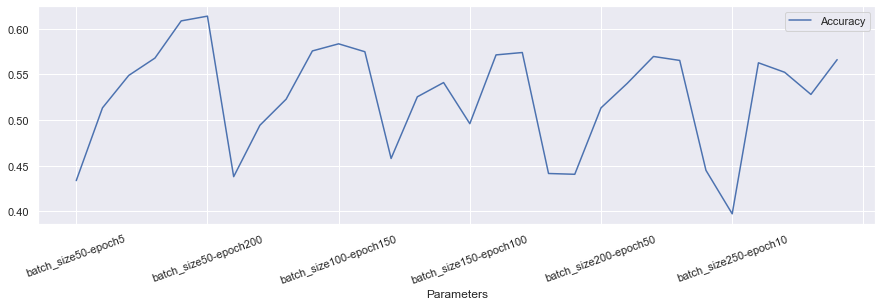

In [230]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [231]:
ResultsData[ResultsData['Accuracy']==ResultsData['Accuracy'].max()]

TrialNumber             Parameters  Accuracy
0           6  batch_size50-epoch200  0.613853

In [251]:
classifier = Sequential()
classifier.add(Dense(units=12, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=6, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='softmax'))
classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [252]:
classifier.summary()

Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1301 (Dense)           (None, 12)                132       
_________________________________________________________________
dense_1302 (Dense)           (None, 6)                 78        
_________________________________________________________________
dense_1303 (Dense)           (None, 6)                 42        
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


In [253]:
# compiling the neural network classifier, adam optimizer
history = classifier.fit(X_train, y_train,batch_size = 50, epochs = 200, verbose = 1)

Epoch 1/200
27/27 [==============================] - 0s 1ms/step - loss: 1.6764 - accuracy: 0.3792
Epoch 2/200
27/27 [==============================] - 0s 1ms/step - loss: 1.4983 - accuracy: 0.4818
Epoch 3/200
27/27 [==============================] - 0s 910us/step - loss: 1.4054 - accuracy: 0.4848
Epoch 4/200
27/27 [==============================] - 0s 1ms/step - loss: 1.3519 - accuracy: 0.5056
Epoch 5/200
27/27 [==============================] - 0s 970us/step - loss: 1.3166 - accuracy: 0.5093
Epoch 6/200
27/27 [==============================] - 0s 1ms/step - loss: 1.2911 - accuracy: 0.5138
Epoch 7/200
27/27 [==============================] - 0s 888us/step - loss: 1.2704 - accuracy: 0.5048
Epoch 8/200
27/27 [==============================] - 0s 1ms/step - loss: 1.2530 - accuracy: 0.5138
Epoch 9/200
27/27 [==============================] - 0s 978us/step - loss: 1.2373 - accuracy: 0.5167
Epoch 10/200
27/27 [==============================] - 0s 896us/step - loss: 1.2231 - accuracy: 0.5190

Epoch 82/200
27/27 [==============================] - 0s 924us/step - loss: 0.9711 - accuracy: 0.5941
Epoch 83/200
27/27 [==============================] - 0s 983us/step - loss: 0.9701 - accuracy: 0.5985
Epoch 84/200
27/27 [==============================] - 0s 879us/step - loss: 0.9696 - accuracy: 0.5955
Epoch 85/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9684 - accuracy: 0.5978
Epoch 86/200
27/27 [==============================] - 0s 936us/step - loss: 0.9680 - accuracy: 0.6052
Epoch 87/200
27/27 [==============================] - 0s 915us/step - loss: 0.9674 - accuracy: 0.5970
Epoch 88/200
27/27 [==============================] - 0s 916us/step - loss: 0.9665 - accuracy: 0.6045
Epoch 89/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9659 - accuracy: 0.6015
Epoch 90/200
27/27 [==============================] - 0s 929us/step - loss: 0.9654 - accuracy: 0.6052
Epoch 91/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9646 - acc

27/27 [==============================] - 0s 921us/step - loss: 0.9347 - accuracy: 0.6216
Epoch 163/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9350 - accuracy: 0.6097
Epoch 164/200
27/27 [==============================] - 0s 881us/step - loss: 0.9341 - accuracy: 0.6119
Epoch 165/200
27/27 [==============================] - 0s 895us/step - loss: 0.9340 - accuracy: 0.6082
Epoch 166/200
27/27 [==============================] - 0s 914us/step - loss: 0.9339 - accuracy: 0.6141
Epoch 167/200
27/27 [==============================] - 0s 960us/step - loss: 0.9340 - accuracy: 0.6104
Epoch 168/200
27/27 [==============================] - 0s 960us/step - loss: 0.9328 - accuracy: 0.6104
Epoch 169/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9335 - accuracy: 0.6119
Epoch 170/200
27/27 [==============================] - 0s 911us/step - loss: 0.9324 - accuracy: 0.6141
Epoch 171/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9330 - accurac

In [255]:
# Adding in the SGD optimizer
optimizer = optimizers.SGD(lr=0.001)
classifier.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])   

In [256]:
# compiling the neural network classifier, adam optimizer
history = classifier.fit(X_train, y_train,batch_size = 50, epochs = 200, verbose = 1)

Epoch 1/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9223 - accuracy: 0.6134
Epoch 2/200
27/27 [==============================] - 0s 948us/step - loss: 0.9223 - accuracy: 0.6156
Epoch 3/200
27/27 [==============================] - 0s 959us/step - loss: 0.9222 - accuracy: 0.6134
Epoch 4/200
27/27 [==============================] - 0s 942us/step - loss: 0.9222 - accuracy: 0.6141
Epoch 5/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9222 - accuracy: 0.6119
Epoch 6/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9222 - accuracy: 0.6126
Epoch 7/200
27/27 [==============================] - 0s 966us/step - loss: 0.9222 - accuracy: 0.6119
Epoch 8/200
27/27 [==============================] - 0s 966us/step - loss: 0.9221 - accuracy: 0.6134
Epoch 9/200
27/27 [==============================] - 0s 880us/step - loss: 0.9221 - accuracy: 0.6126
Epoch 10/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9221 - accuracy: 0.61

27/27 [==============================] - 0s 1ms/step - loss: 0.9201 - accuracy: 0.6097
Epoch 83/200
27/27 [==============================] - 0s 974us/step - loss: 0.9201 - accuracy: 0.6119
Epoch 84/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9201 - accuracy: 0.6126
Epoch 85/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9200 - accuracy: 0.6112
Epoch 86/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9200 - accuracy: 0.6112
Epoch 87/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9200 - accuracy: 0.6104
Epoch 88/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9199 - accuracy: 0.6126
Epoch 89/200
27/27 [==============================] - 0s 892us/step - loss: 0.9199 - accuracy: 0.6126
Epoch 90/200
27/27 [==============================] - 0s 969us/step - loss: 0.9199 - accuracy: 0.6141
Epoch 91/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9199 - accuracy: 0.6112
Epoch 9

27/27 [==============================] - 0s 866us/step - loss: 0.9181 - accuracy: 0.6119
Epoch 163/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9181 - accuracy: 0.6119
Epoch 164/200
27/27 [==============================] - 0s 912us/step - loss: 0.9180 - accuracy: 0.6112
Epoch 165/200
27/27 [==============================] - 0s 917us/step - loss: 0.9181 - accuracy: 0.6119
Epoch 166/200
27/27 [==============================] - 0s 922us/step - loss: 0.9180 - accuracy: 0.6119
Epoch 167/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9180 - accuracy: 0.6112
Epoch 168/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9179 - accuracy: 0.6119
Epoch 169/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9180 - accuracy: 0.6112
Epoch 170/200
27/27 [==============================] - 0s 953us/step - loss: 0.9179 - accuracy: 0.6119
Epoch 171/200
27/27 [==============================] - 0s 967us/step - loss: 0.9179 - accuracy:

In [258]:
# Adding the adam optimizer
optimizer = optimizers.Adam(lr=0.1)
classifier.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])   

In [259]:
# compiling the neural network classifier, adam optimizer
history = classifier.fit(X_train, y_train,batch_size = 50, epochs = 200, verbose = 1)

Epoch 1/200
27/27 [==============================] - 0s 1ms/step - loss: 1.0838 - accuracy: 0.5532
Epoch 2/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9954 - accuracy: 0.5710
Epoch 3/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9746 - accuracy: 0.5747
Epoch 4/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9805 - accuracy: 0.5792
Epoch 5/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9566 - accuracy: 0.5844
Epoch 6/200
27/27 [==============================] - 0s 994us/step - loss: 0.9717 - accuracy: 0.5777
Epoch 7/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9789 - accuracy: 0.5792
Epoch 8/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9590 - accuracy: 0.6015
Epoch 9/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9236 - accuracy: 0.6000
Epoch 10/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9228 - accuracy: 0.6000
Epoch 1

27/27 [==============================] - 0s 1ms/step - loss: 0.9408 - accuracy: 0.5807
Epoch 83/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9063 - accuracy: 0.6037
Epoch 84/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9050 - accuracy: 0.6104
Epoch 85/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9161 - accuracy: 0.6193
Epoch 86/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9076 - accuracy: 0.6052
Epoch 87/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9152 - accuracy: 0.6082
Epoch 88/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9193 - accuracy: 0.6082
Epoch 89/200
27/27 [==============================] - 0s 1ms/step - loss: 0.8987 - accuracy: 0.6037
Epoch 90/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9157 - accuracy: 0.6141
Epoch 91/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9666 - accuracy: 0.6007
Epoch 92/200


27/27 [==============================] - 0s 1ms/step - loss: 0.9614 - accuracy: 0.6141
Epoch 164/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9372 - accuracy: 0.6104
Epoch 165/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9341 - accuracy: 0.6112
Epoch 166/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9311 - accuracy: 0.5948
Epoch 167/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9414 - accuracy: 0.6030
Epoch 168/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9466 - accuracy: 0.5993
Epoch 169/200
27/27 [==============================] - 0s 2ms/step - loss: 0.9437 - accuracy: 0.6230
Epoch 170/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9204 - accuracy: 0.6149
Epoch 171/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9401 - accuracy: 0.6193
Epoch 172/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9284 - accuracy: 0.6245
Epoc

In [260]:
classifier.evaluate(X_test,y_test)

1/1 [==============================] - 0s 7ms/step - loss: 1.3388 - accuracy: 0.7857


[1.3388004302978516, 0.7857142686843872]

### Saving The Classifier Model

In [261]:
classifier.save('classifier_model.h5')

from keras.models import load_model
classifier_model = load_model('classifier_model.h5')

In [262]:
classifier_model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 0s/step - loss: 1.3388 - accuracy: 0.7857


[1.3388004302978516, 0.7857142686843872]

## Making the Predictions

In [263]:
Predictions_Made = []
for i in TargetVariable:
    j = ''
    j = 'Predicted_' + i
    Predictions_Made.append(j)

In [266]:
# Predictions on testing data
Predictions=classifier.predict(X_test)
p = classifier.predict_classes(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData = pd.DataFrame()
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData[TargetVariable[0]] = y_test[:,0]
TestingData[TargetVariable[1]] = y_test[:,1]
TestingData[TargetVariable[2]] = y_test[:,2]
TestingData[TargetVariable[3]] = y_test[:,3]
TestingData[TargetVariable[4]] = y_test[:,4]
TestingData[TargetVariable[5]] = y_test[:,5]

TestingData = TestingData.rename(columns={TargetVariable[0]:3,TargetVariable[1]:4,TargetVariable[2]:5,TargetVariable[3]:6,TargetVariable[4]:7,TargetVariable[5]:8 })

strength = []
for i in range(len(TestingData)):
    for col,val in TestingData.loc[i].iteritems():
        if val==1.0:
            strength.append(col)

strength = [ x for x in strength if "Parameter" not in str(x) ]
        
strength = np.array(strength)
TestingData['Actual_Signal_Strength'] = y_test_1
# print(TestingData.head())

TestingData.drop([3,4,5,6,7,8],axis=1,inplace=True)
        
TestingData[Predictions_Made[0]] = Predictions[:,0]
TestingData[Predictions_Made[1]] = Predictions[:,1]
TestingData[Predictions_Made[2]] = Predictions[:,2]
TestingData[Predictions_Made[3]] = Predictions[:,3]
TestingData[Predictions_Made[4]] = Predictions[:,4]
TestingData[Predictions_Made[5]] = Predictions[:,5]

### PROBABILITY METHOD ###

# def probThreshold(inpProb):
#     if inpProb>=0.3:
#         return(1)
#     else:
#         return(0)

# TestingData[Predictions_Made[0]]=TestingData[Predictions_Made[0]].apply(probThreshold)
# TestingData[Predictions_Made[1]]=TestingData[Predictions_Made[1]].apply(probThreshold)
# TestingData[Predictions_Made[2]]=TestingData[Predictions_Made[2]].apply(probThreshold)
# TestingData[Predictions_Made[3]]=TestingData[Predictions_Made[3]].apply(probThreshold)
# TestingData[Predictions_Made[4]]=TestingData[Predictions_Made[4]].apply(probThreshold)
# TestingData[Predictions_Made[5]]=TestingData[Predictions_Made[5]].apply(probThreshold)

# TestingData = TestingData.rename(columns={Predictions_Made[0]:3,Predictions_Made[1]:4,Predictions_Made[2]:5,Predictions_Made[3]:6,Predictions_Made[4]:7,Predictions_Made[5]:8 })

# predicted_strength = []
# for i in range(len(TestingData)):
#     for col,val in TestingData.loc[i].iteritems():
#         if val==1.0:
#             predicted_strength.append(col)

# predicted_strength = [ x for x in strength if "Parameter" not in str(x) ]
        
# predicted_strength = np.array(predicted_strength)

TestingData['Predicted_Signal_Strength'] = p
# print(TestingData.head())

TestingData['Predicted_Signal_Strength'] = TestingData['Predicted_Signal_Strength'].replace({0:3,1:4,2:5,3:6,4:7,5:8})

TestingData.drop(Predictions_Made,axis=1,inplace=True)

TestingData.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 5  Parameter 6  \
0          5.6         0.54         0.04        0.049          5.0   
1         12.4         0.35         0.49        0.079         27.0   
2          6.2         0.51         0.14        0.056         15.0   
3          8.8         0.64         0.17        0.084         25.0   
4          7.4         0.55         0.19        0.082         15.0   

   Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  \
0         13.0      0.99420         3.72          0.58          11.4   
1         69.0      0.99940         3.12          0.75          10.4   
2         34.0      0.99396         3.48          0.57          11.5   
3        130.0      0.99818         3.23          0.54           9.6   
4         34.0      0.99655         3.49          0.68          10.5   

   Actual_Signal_Strength  Predicted_Signal_Strength  
0                       5                          5  
1                       6                          6  
2                       6                          6  
3                       5                          5  
4                       5                          5

### Confusion Matrix and Classification Report

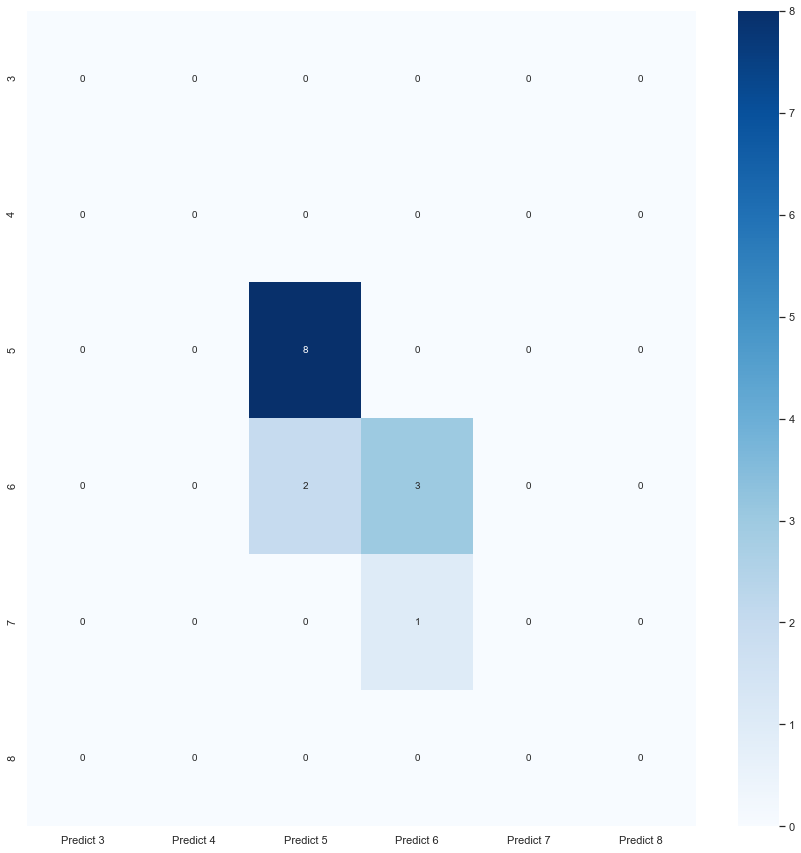

In [267]:
from sklearn import metrics

strength = TestingData['Actual_Signal_Strength'].values
p = TestingData['Predicted_Signal_Strength'].values

cm_classifier=metrics.confusion_matrix(strength, p, labels=[3, 4,5,6,7,8])

cm_classifier = pd.DataFrame(cm_classifier, index = [i for i in ["3","4","5","6","7","8"]],
                  columns = [i for i in ["Predict 3","Predict 4","Predict 5","Predict 6","Predict 7","Predict 8"]])
plt.figure(figsize = (15,15))
sns.heatmap(cm_classifier, annot=True,cmap="Blues",fmt='g')

In [268]:
print(metrics.classification_report(strength,p))

              precision    recall  f1-score   support

           5       0.80      1.00      0.89         8
           6       0.75      0.60      0.67         5
           7       0.00      0.00      0.00         1

    accuracy                           0.79        14
   macro avg       0.52      0.53      0.52        14
weighted avg       0.72      0.79      0.75        14



In [269]:
accuracy_classifier = metrics.classification_report(strength, p).split()[-2]
accuracy_percentage_classifier = float(accuracy_classifier)*100

In [270]:
print('The Accuracy of the Neural Network Classifier is :',accuracy_percentage_classifier,'%')

The Accuracy of the Neural Network Classifier is : 75.0 %


## Part III - Clickable GUI

In [148]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

    
win = tk.Tk()
win.title('Neural Networks GUI')

# df = pd.DataFrame()
def import_file():
    global df
    file_name = file.get()
    if '.csv' in file_name:
        df = pd.read_csv(file_name)
    else:
        if '.pickle' in file_name:
            df = pd.read_pickle(file_name)
        else:
            df = pd.read_excel(file_name)
    var = 'Imported !'
    box = tk.Entry(win,width=10,textvariable=var)
    box.grid(row=0,column=5)
    box.insert(1,var)
    return df

# df.head()
    
def import_target():
    global column_name,predictors,X,y
    column_name = column.get()
    if column_name in data.columns.to_list():
        var = 'Found !'
        box = tk.Entry(win,width=17,textvariable=var)
        box.grid(row=4,column=5)
        box.insert(1,var)
    else:
        var = 'Incorrect Column'
        box = tk.Entry(win,width=17,textvariable=var)
        box.grid(row=4,column=5)
        box.insert(1,var)
        
### Performing the usual steps for creating the model ###
        
    predictors = df.drop(column_name,axis=1).columns.to_list()
    target = [column_name]

    X = df[predictors].values
    y = df[target].values
    

# print(X)
# ----------------------------------------------- REGRESSION -------------------------------------------------- #
def train_model_reg():    
    print('Regression Training in Progress.........')
    global model_reg,X_train_reg, X_test_reg, y_train_reg, y_test_reg,TargetVarScalerFit
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler
    PredictorScaler=StandardScaler()
    TargetVarScaler=StandardScaler()

    # Storing the fit object for later reference
    PredictorScalerFit=PredictorScaler.fit(X)
    TargetVarScalerFit=TargetVarScaler.fit(y)
    
    # Generating the standardized values of X and y
    X_reg=PredictorScalerFit.transform(X)
    y_reg=TargetVarScalerFit.transform(y)

    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

    # create ANN model
    model_reg = Sequential()
    # Defining the first layer of the model
    model_reg.add(Dense(units=10, input_dim=10, kernel_initializer='normal', activation='relu'))

    # Defining the Second layer of the model
    model_reg.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

    # The output neuron is a single fully connected node 
    # Since we will be predicting a single number
    model_reg.add(Dense(1, kernel_initializer='normal'))

    # Compiling the model
    model_reg.compile(loss='mean_squared_error', optimizer='adam' )

    # Fitting the model
    model_reg.fit(X_train,y_train,batch_size=50,epochs=100,verbose=0)

    var1 = 'Trained Regressor!'
    box1 = tk.Entry(win,width=17,textvariable=var1)
    box1.grid(row=9,column=4)
    box1.insert(1,var1)
    
def save_reg_model(): 
    global model_reg_loaded
    model_reg.save('model_reg.h5')
    from keras.models import load_model
    model_reg_loaded = load_model('model_reg.h5')
    var_reg = 'Stored Regressor!'
    box = tk.Entry(win,width=17,textvariable=var_reg)
    box.grid(row=10,column=4)
    box.insert(1,var_reg)
    
def reg_model_accuracy(): 
    y_orig = TargetVarScalerFit.inverse_transform(y_test_reg)
    predictions = model_reg_loaded.predict(X_test_reg)
    predictions = TargetVarScalerFit.inverse_transform(predictions)
    result = 100 - np.mean(np.abs(((y_orig-predictions)/(y_orig))*100))
    result = round(result,2)
    print('The Accuracy of the regressor is: ',result,'%')
    print('########### END OF REGRESSION ###########')
    var = str(result) + '%'
    box = tk.Entry(win,width=10,textvariable=var)
    box.grid(row=11,column=4)
    box.insert(1,var)
    
# ------------------------------------------------ CLASSIFIER ------------------------------------------------- #
        
def train_model_cla():
    global classifier,y_test_1_cla,accuracy_cla,df2
    print('Classifier Training in Progress.........')
    # After Standardization of data
    # Separate Target Variable and Predictor Variables
    
    df2 = df[:]
    y = pd.get_dummies(df2,columns=[column_name])
    df2 = y[:]

    # TargetVariable=['Signal_Strength']
    TargetVariable=['Signal_Strength_3','Signal_Strength_4','Signal_Strength_5','Signal_Strength_6','Signal_Strength_7','Signal_Strength_8']
    Predictors=df2.drop(['Signal_Strength_3','Signal_Strength_4','Signal_Strength_5','Signal_Strength_6','Signal_Strength_7','Signal_Strength_8'],axis=1).columns.to_list()
    # Predictors = signal_data.drop(['Signal_Strength'],axis=1).columns.to_list()

    # TargetVariable=['Signal_Strength']
    # Predictors=signal_data.drop('Signal_Strength',axis=1).columns.to_list()

    X_cla=df2[Predictors].values
    y_cla=df2[TargetVariable].values

    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler
    PredictorScaler=StandardScaler()

    # Storing the fit object for later reference
    PredictorScalerFit=PredictorScaler.fit(X_cla)

    # Generating the standardized values of X and y
    X_cla=PredictorScalerFit.transform(X_cla)

    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train_cla, X_test_cla, y_train_cla, y_test_cla = train_test_split(X_cla, y_cla, test_size=0.01, random_state=6)
    
    classifier = Sequential()
    classifier.add(Dense(units=32, input_dim=10, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='sigmoid'))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='softmax'))
    classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    optimizer = optimizers.SGD(lr=0.01)
    classifier.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    optimizer = optimizers.SGD(lr=0.001)
    classifier.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    optimizer = optimizers.Adam(lr=0.01)
    classifier.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])   
    
    classifier.fit(X_train_cla,y_train_cla,batch_size=100,epochs=200,verbose=0)
    
    accuracy_cla = round(classifier.evaluate(X_test_cla,y_test_cla)[1]*100,2)
    print(accuracy_cla,'%')
    
    var1 = 'Trained Classifier!'
    box1 = tk.Entry(win,width=17,textvariable=var1)
    box1.grid(row=13,column=4)
    box1.insert(1,var1)

    
def save_cla_model(): 
    global model_cla_loaded
    model_reg.save('model_cla.h5')
    from keras.models import load_model
    model_reg_loaded = load_model('model_cla.h5')
    var_cla = 'Stored Classifier!'
    box_cla = tk.Entry(win,width=17,textvariable=var_cla)
    box_cla.grid(row=14,column=4)
    box_cla.insert(1,var_cla)
    
def cla_model_accuracy(): 
    print('The Accuracy of the classifier is: ',accuracy_cla,'%')
    print('########### END OF CLASSIFICATION ###########')
    var = str(accuracy_cla) + '%'
    box = tk.Entry(win,width=10,textvariable=var)
    box.grid(row=15,column=4)
    box.insert(1,var)

# ----------------------------------------------- Step 1 ------------------------------------------------------ #

name = tk.Label(win,text='Step 1: Input File     ')
name.grid(row=0,column=0,sticky=tk.W)

file = tk.StringVar()
box = tk.Entry(win,width=16,textvariable=file)
box.grid(row=0,column=1)
# print(file)

space = tk.Label(win,text='     ')
space.grid(row=0,column=2,sticky=tk.W)

button1 = tk.Button(win,text='Import Data',command=import_file)
button1.grid(row=0,column=3,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=0,column=4,sticky=tk.W)

# ----------------------------------------------- Step 2 ------------------------------------------------------ #

name = tk.Label(win,text='Step 2: Target Column     ')
name.grid(row=4,column=0,sticky=tk.W)

column = tk.StringVar()
box = tk.Entry(win,width=16,textvariable=column)
box.grid(row=4,column=1)
# print(file)

space = tk.Label(win,text='     ')
space.grid(row=4,column=2,sticky=tk.W)

button2 = tk.Button(win,text='Select Target',command=import_target)
button2.grid(row=4,column=3,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=4,column=4,sticky=tk.W)

dashes = '-'*35
name = tk.Label(win,text=dashes)
name.grid(row=5,column=0,sticky=tk.W)

# ----------------------------------------------- Step 3 ------------------------------------------------------ #

name = tk.Label(win,text='Step 3: Neural network Regressor     ')
name.grid(row=8,column=0,sticky=tk.W)

name = tk.Label(win,text='Regression ')
name.grid(row=9,column=1,sticky=tk.W)

button3 = tk.Button(win,text='Train Model',command=train_model_reg)
button3.grid(row=9,column=2,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=9,column=3,sticky=tk.W)

name = tk.Label(win,text='Save the Model ')
name.grid(row=10,column=1,sticky=tk.W)

button4 = tk.Button(win,text='Save',command=save_reg_model)
button4.grid(row=10,column=2,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=10,column=3,sticky=tk.W)

name = tk.Label(win,text='Model Accuracy ')
name.grid(row=11,column=1,sticky=tk.W)

button3 = tk.Button(win,text='Check Accuracy',command=reg_model_accuracy)
button3.grid(row=11,column=2,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=11,column=3,sticky=tk.W)

dashes = '-'*35
name = tk.Label(win,text=dashes)
name.grid(row=12,column=0,sticky=tk.W)

# ----------------------------------------------- Step 4 ------------------------------------------------------ #

name = tk.Label(win,text='Step 4: Neural Network Classifier     ')
name.grid(row=13,column=0,sticky=tk.W)

name = tk.Label(win,text='Classification ')
name.grid(row=13,column=1,sticky=tk.W)

button3 = tk.Button(win,text='Train Model',command=train_model_cla)
button3.grid(row=13,column=2,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=13,column=3,sticky=tk.W)

name = tk.Label(win,text='Save the Model ')
name.grid(row=14,column=1,sticky=tk.W)

button4 = tk.Button(win,text='Save',command=save_cla_model)
button4.grid(row=14,column=2,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=14,column=3,sticky=tk.W)

name = tk.Label(win,text='Model Accuracy ')
name.grid(row=15,column=1,sticky=tk.W)

button3 = tk.Button(win,text='Check Accuracy',command=cla_model_accuracy)
button3.grid(row=15,column=2,pady = 10, padx = 10)

space = tk.Label(win,text='     ')
space.grid(row=15,column=3,sticky=tk.W)


# -------------------------------------------------------------------------------------------------------------- #

win.mainloop()

Regression Training in Progress.........
The Accuracy of the regressor is:  87.01 %
########### END OF REGRESSION ###########
Classifier Training in Progress.........
1/1 [==============================] - 0s 1ms/step - loss: 1.1765 - accuracy: 0.4286
42.86 %
The Accuracy of the classifier is:  42.86 %
########### END OF CLASSIFICATION ###########


## Image of the GUI

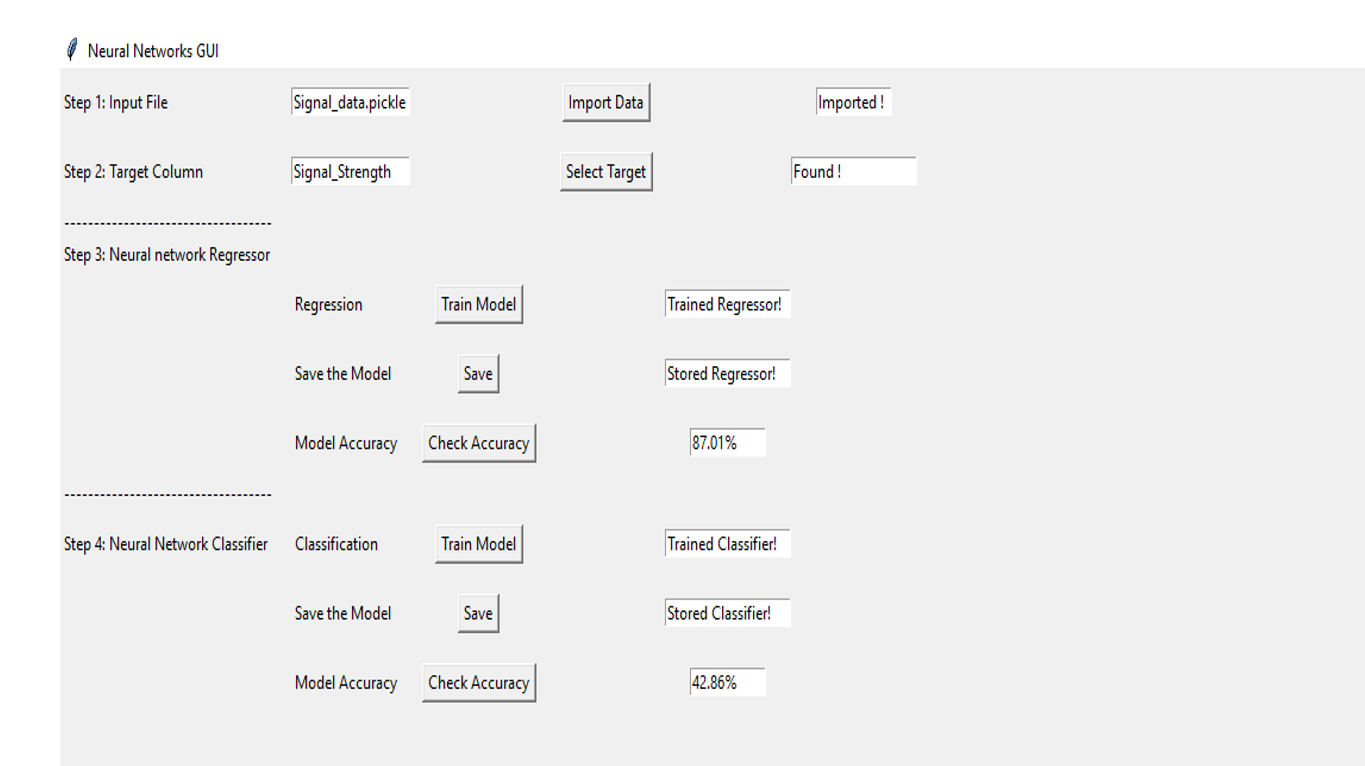

In [149]:
from IPython.display import Image
Image("GUI.png")

## PART IV - Image Classifier Using Neural Network Classifier

In [150]:
# Importing the necessary libraries
import h5py
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

In [151]:
# Accessing the Image File
image_data = h5py.File("Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r')

In [152]:
image_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [153]:
#Loading the training, testing, and validation data

X_train = image_data['X_train']
X_test = image_data['X_test']
X_val = image_data['X_val']
y_train = image_data['y_train']
y_test = image_data['y_test']
y_val = image_data['y_val']

In [154]:
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


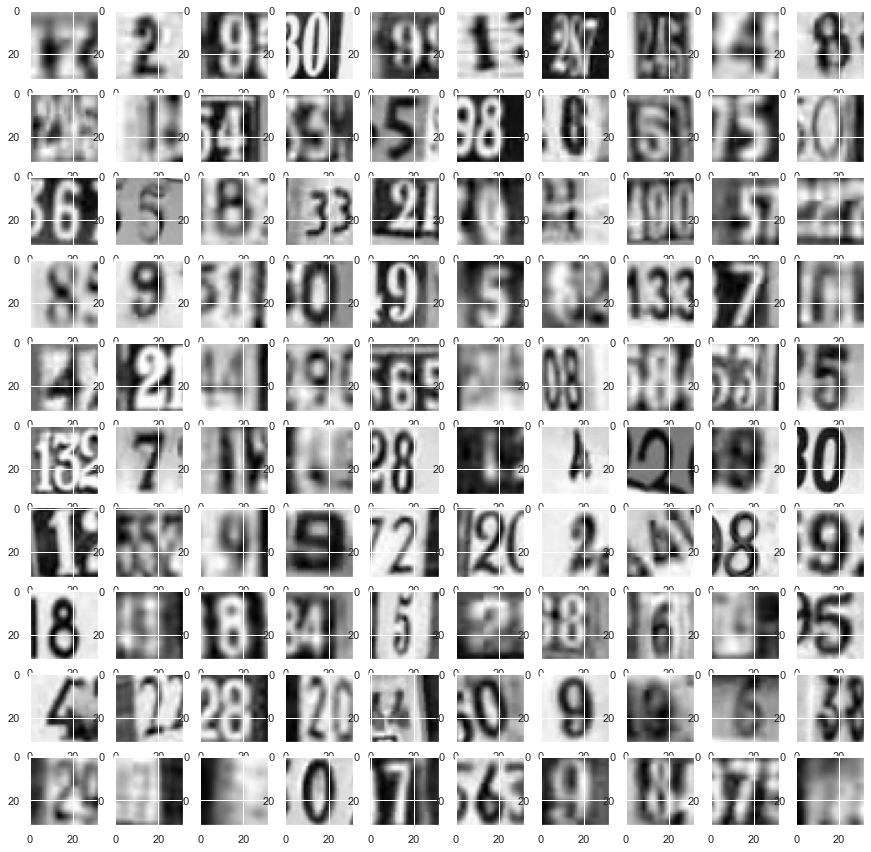

In [155]:
# Plotting the images

fig=plt.figure(figsize=(15,15))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

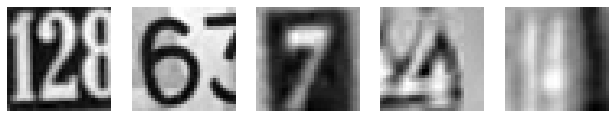

The Image Lables are: [2 6 7 4 4]


In [156]:
# visualizing the first 5 images in the dataset and their labels

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 3))
for i in range(5):
    plt.subplot(1, 6, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()

print('The Image Lables are: %s' % (y_train[0:5]))

In [157]:
# 2D to 1D Conversion
import numpy as np

X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [158]:
# One-Hot Encoding

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

In [159]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [160]:
from keras import Sequential
image_classifier = Sequential()

In [161]:
# Initialize the neural network classifier
image_classifier = Sequential()

# Input Layer - adding input layer and activation functions relu
image_classifier.add(Dense(256, input_shape = (1024, )))
# Adding activation function
image_classifier.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
image_classifier.add(Dense(128))
# Adding activation function
image_classifier.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
image_classifier.add(Dense(64))
# Adding activation function
image_classifier.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
image_classifier.add(Dense(10))
# Adding activation function - softmax for multiclass classification
image_classifier.add(Activation('softmax'))

In [162]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
image_classifier.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = image_classifier.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 10ms/step - loss: 14.9423 - accuracy: 0.1010 - val_loss: 3.9284 - val_accuracy: 0.1028
Epoch 2/100
210/210 [==============================] - 2s 9ms/step - loss: 3.7373 - accuracy: 0.1226 - val_loss: 3.0115 - val_accuracy: 0.1320
Epoch 3/100
210/210 [==============================] - 2s 9ms/step - loss: 2.6931 - accuracy: 0.1648 - val_loss: 2.3343 - val_accuracy: 0.2063
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 2.2419 - accuracy: 0.2528 - val_loss: 2.0375 - val_accuracy: 0.3186
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 2.0029 - accuracy: 0.3302 - val_loss: 1.9634 - val_accuracy: 0.3609
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 1.7900 - accuracy: 0.4040 - val_loss: 1.6549 - val_accuracy: 0.4430
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 1.6426 - accuracy: 0.4607 - val_loss: 1.5110 - val_accuracy: 0.51

Epoch 58/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6566 - accuracy: 0.8003 - val_loss: 0.7551 - val_accuracy: 0.7687
Epoch 59/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6526 - accuracy: 0.7995 - val_loss: 0.6592 - val_accuracy: 0.8007
Epoch 60/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6485 - accuracy: 0.7988 - val_loss: 0.6893 - val_accuracy: 0.7941
Epoch 61/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6326 - accuracy: 0.8051 - val_loss: 0.6307 - val_accuracy: 0.8100
Epoch 62/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6357 - accuracy: 0.8028 - val_loss: 0.6426 - val_accuracy: 0.8075
Epoch 63/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6286 - accuracy: 0.8058 - val_loss: 0.6870 - val_accuracy: 0.7940
Epoch 64/100
210/210 [==============================] - 2s 9ms/step - loss: 0.6204 - accuracy: 0.8085 - val_loss: 0.6603 - val_accuracy:

### Trying to further increase the accuracy of the predictions by playing with optimizers and learning rates

In [163]:
# compiling the neural network classifier, SGD optimizer
sgd = optimizers.SGD(lr = 0.001)
image_classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = image_classifier.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 10ms/step - loss: 0.3986 - accuracy: 0.8772 - val_loss: 0.4659 - val_accuracy: 0.8659
Epoch 2/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3775 - accuracy: 0.8840 - val_loss: 0.4599 - val_accuracy: 0.8690
Epoch 3/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3718 - accuracy: 0.8856 - val_loss: 0.4571 - val_accuracy: 0.8699
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3684 - accuracy: 0.8876 - val_loss: 0.4565 - val_accuracy: 0.8701
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3662 - accuracy: 0.8891 - val_loss: 0.4561 - val_accuracy: 0.8712
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3639 - accuracy: 0.8894 - val_loss: 0.4575 - val_accuracy: 0.8700
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 0.3627 - accuracy: 0.8890 - val_loss: 0.4540 - val_accuracy: 0.872

Epoch 58/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3329 - accuracy: 0.8985 - val_loss: 0.4459 - val_accuracy: 0.8781
Epoch 59/100
210/210 [==============================] - 2s 11ms/step - loss: 0.3329 - accuracy: 0.8985 - val_loss: 0.4457 - val_accuracy: 0.8777
Epoch 60/100
210/210 [==============================] - 2s 12ms/step - loss: 0.3325 - accuracy: 0.8987 - val_loss: 0.4452 - val_accuracy: 0.8777
Epoch 61/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3322 - accuracy: 0.8993 - val_loss: 0.4455 - val_accuracy: 0.8778
Epoch 62/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3320 - accuracy: 0.8986 - val_loss: 0.4451 - val_accuracy: 0.8782
Epoch 63/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3319 - accuracy: 0.8988 - val_loss: 0.4461 - val_accuracy: 0.8779
Epoch 64/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3315 - accuracy: 0.8984 - val_loss: 0.4445 - val_ac

In [164]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
image_classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = image_classifier.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 14ms/step - loss: 0.3217 - accuracy: 0.9019 - val_loss: 0.4447 - val_accuracy: 0.8794
Epoch 2/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3215 - accuracy: 0.9021 - val_loss: 0.4434 - val_accuracy: 0.8808
Epoch 3/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3214 - accuracy: 0.9024 - val_loss: 0.4461 - val_accuracy: 0.8791
Epoch 4/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3212 - accuracy: 0.9023 - val_loss: 0.4443 - val_accuracy: 0.8798
Epoch 5/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3207 - accuracy: 0.9013 - val_loss: 0.4446 - val_accuracy: 0.8800
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3207 - accuracy: 0.9030 - val_loss: 0.4438 - val_accuracy: 0.8795
Epoch 7/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3205 - accuracy: 0.9024 - val_loss: 0.4457 - val_accuracy:

210/210 [==============================] - 3s 13ms/step - loss: 0.3103 - accuracy: 0.9049 - val_loss: 0.4463 - val_accuracy: 0.8809
Epoch 58/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3104 - accuracy: 0.9048 - val_loss: 0.4443 - val_accuracy: 0.8816
Epoch 59/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3098 - accuracy: 0.9055 - val_loss: 0.4464 - val_accuracy: 0.8814
Epoch 60/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3097 - accuracy: 0.9055 - val_loss: 0.4474 - val_accuracy: 0.8804
Epoch 61/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3099 - accuracy: 0.9059 - val_loss: 0.4475 - val_accuracy: 0.8806
Epoch 62/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3094 - accuracy: 0.9054 - val_loss: 0.4467 - val_accuracy: 0.8806
Epoch 63/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3090 - accuracy: 0.9063 - val_loss: 0.4432 - val_accuracy: 0.882

In [165]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
image_classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = image_classifier.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 14ms/step - loss: 0.3027 - accuracy: 0.9086 - val_loss: 0.4476 - val_accuracy: 0.8835
Epoch 2/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3024 - accuracy: 0.9085 - val_loss: 0.4467 - val_accuracy: 0.8824
Epoch 3/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3024 - accuracy: 0.9075 - val_loss: 0.4457 - val_accuracy: 0.8826
Epoch 4/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3023 - accuracy: 0.9079 - val_loss: 0.4480 - val_accuracy: 0.8824
Epoch 5/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3022 - accuracy: 0.9084 - val_loss: 0.4464 - val_accuracy: 0.8826
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3023 - accuracy: 0.9076 - val_loss: 0.4490 - val_accuracy: 0.8823
Epoch 7/100
210/210 [==============================] - 3s 13ms/step - loss: 0.3021 - accuracy: 0.9076 - val_loss: 0.4455 - val_accuracy:

210/210 [==============================] - 3s 13ms/step - loss: 0.2942 - accuracy: 0.9102 - val_loss: 0.4474 - val_accuracy: 0.8849
Epoch 58/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2941 - accuracy: 0.9107 - val_loss: 0.4515 - val_accuracy: 0.8829
Epoch 59/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2946 - accuracy: 0.9101 - val_loss: 0.4474 - val_accuracy: 0.8844
Epoch 60/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2940 - accuracy: 0.9106 - val_loss: 0.4478 - val_accuracy: 0.8849
Epoch 61/100
210/210 [==============================] - 3s 14ms/step - loss: 0.2942 - accuracy: 0.9104 - val_loss: 0.4472 - val_accuracy: 0.8842
Epoch 62/100
210/210 [==============================] - 3s 14ms/step - loss: 0.2942 - accuracy: 0.9107 - val_loss: 0.4483 - val_accuracy: 0.8840
Epoch 63/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2934 - accuracy: 0.9102 - val_loss: 0.4493 - val_accuracy: 0.883

In [166]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
image_classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = image_classifier.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 14ms/step - loss: 0.2885 - accuracy: 0.9122 - val_loss: 0.4495 - val_accuracy: 0.8852
Epoch 2/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2887 - accuracy: 0.9124 - val_loss: 0.4498 - val_accuracy: 0.8854
Epoch 3/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2886 - accuracy: 0.9117 - val_loss: 0.4497 - val_accuracy: 0.8852
Epoch 4/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2884 - accuracy: 0.9117 - val_loss: 0.4492 - val_accuracy: 0.8848
Epoch 5/100
210/210 [==============================] - 3s 14ms/step - loss: 0.2886 - accuracy: 0.9120 - val_loss: 0.4488 - val_accuracy: 0.8844
Epoch 6/100
210/210 [==============================] - 3s 14ms/step - loss: 0.2881 - accuracy: 0.9124 - val_loss: 0.4485 - val_accuracy: 0.8850
Epoch 7/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2881 - accuracy: 0.9128 - val_loss: 0.4486 - val_accuracy:

210/210 [==============================] - 3s 13ms/step - loss: 0.2824 - accuracy: 0.9137 - val_loss: 0.4512 - val_accuracy: 0.8852
Epoch 58/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2821 - accuracy: 0.9145 - val_loss: 0.4511 - val_accuracy: 0.8859
Epoch 59/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2820 - accuracy: 0.9144 - val_loss: 0.4508 - val_accuracy: 0.8860
Epoch 60/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2819 - accuracy: 0.9143 - val_loss: 0.4519 - val_accuracy: 0.8860
Epoch 61/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2815 - accuracy: 0.9148 - val_loss: 0.4517 - val_accuracy: 0.8859
Epoch 62/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2815 - accuracy: 0.9151 - val_loss: 0.4502 - val_accuracy: 0.8870
Epoch 63/100
210/210 [==============================] - 3s 13ms/step - loss: 0.2814 - accuracy: 0.9140 - val_loss: 0.4516 - val_accuracy: 0.886

In [167]:
predictions = image_classifier.predict_classes(X_test)
score = image_classifier.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.8765 - accuracy: 0.8162


### Confusion Matrix and Classification Report

In [168]:
y_test = image_data['y_test'][:]

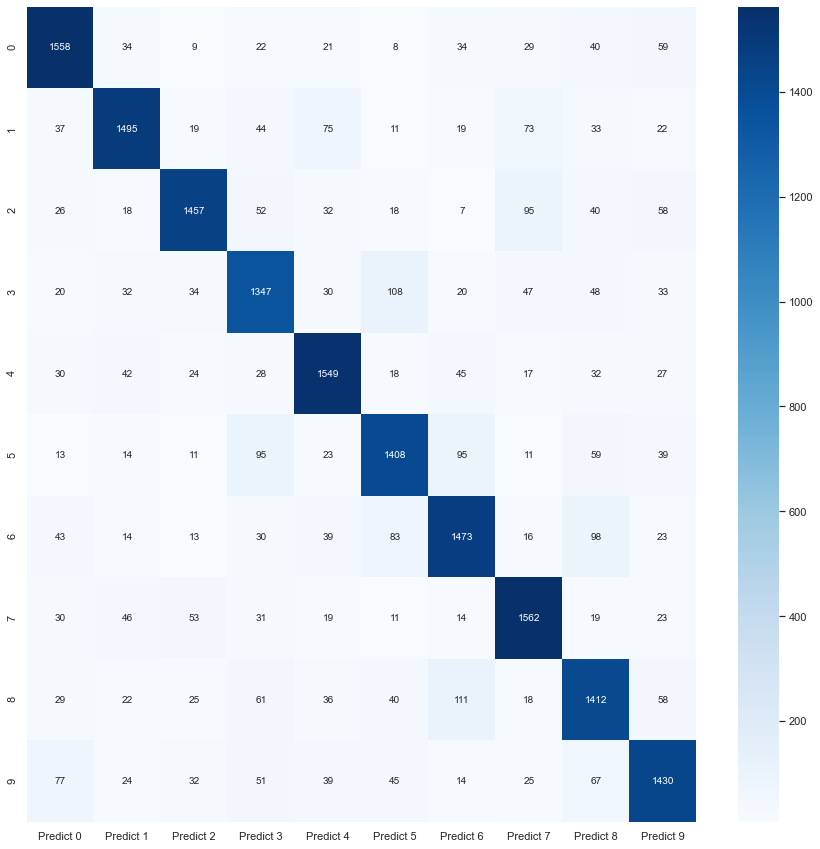

In [169]:
from sklearn import metrics

classifier_matrix = metrics.confusion_matrix(y_test, predictions, labels=[0,1,2,3,4,5,6,7,8,9])

cm_classifier = pd.DataFrame(classifier_matrix, index = [i for i in ["0","1","2","3","4","5","6","7","8","9"]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2","Predict 3","Predict 4","Predict 5","Predict 6","Predict 7","Predict 8","Predict 9"]])
plt.figure(figsize = (15,15))
sns.heatmap(cm_classifier, annot=True,cmap="Blues",fmt='g')

In [170]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1814
           1       0.86      0.82      0.84      1828
           2       0.87      0.81      0.84      1803
           3       0.76      0.78      0.77      1719
           4       0.83      0.85      0.84      1812
           5       0.80      0.80      0.80      1768
           6       0.80      0.80      0.80      1832
           7       0.83      0.86      0.84      1808
           8       0.76      0.78      0.77      1812
           9       0.81      0.79      0.80      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



In [171]:
accuracy_classifier = metrics.classification_report(y_test, predictions).split()[-2]
accuracy_percentage_classifier = float(accuracy_classifier)*100

In [172]:
print('The Accuracy of the Image Classifier is :',accuracy_percentage_classifier,'%')

The Accuracy of the Image Classifier is : 82.0 %


## Saving the model

In [173]:
image_classifier.save('image_classifier.h5')

from keras.models import load_model
image_classifier_loaded = load_model('image_classifier.h5')

# THE END

# --------------------------------------------------------------------------------------------------------------